# ËÆ≠ÁªÉÊÄùË∑Ø

LogicÔºö‰ªÖÈ¢ÑÊµãÊíÇËçíÂú∞‰∏äÂÖâ‰ºèÂª∫ËÆæÊ¶ÇÁéáÂç≥ÂèØÔºåÂä†ÂÖ•Â§öÊó∂Â∫èÂèØ‰ª•‰∏∞ÂØåÊ†∑Êú¨‰ø°ÊÅØ„ÄÅÂ≠¶‰π†Âà∞Â¢ûÈáèÊ†∑Êú¨Ë°®Á§∫

Êï∞ÊçÆÊµÅÔºö


ËæìÂÖ•Ôºö
1„ÄÅËÆ≠ÁªÉÊ†∑Êú¨ÔºàÂàíÂàÜËÆ≠ÁªÉÈõÜ„ÄÅÊµãËØïÈõÜÂêàÔºâÔºöÁæéÂõΩÂÖâ‰ºèÊ≠£Ê†∑Êú¨Ôºõ
2„ÄÅÈ¢ÑÊµãÊ†∑Êú¨ÔºöÁæéÂõΩÂÖâ‰ºèÁî®Âú∞Ôºõ

ËæìÂá∫ÔºöÂæóÂà∞

Êï∞ÊçÆÊìç‰ΩúÔºö

ÔºàÂÖàÁî®QQÂõæËßÇÂØüÂêÑ‰∏™Êï∞ÊçÆÁöÑÂàÜÂ∏ÉÁâπÂæÅÔºâÂØπ‰∫éÁ¨¶ÂêàÊ≠£ÊÄÅÂàÜÂ∏ÉÁâπÂæÅÂèØ‰ª•Áõ¥Êé•ËøõÂÖ•ËÅöÁ±ªÔºõ

1„ÄÅÊ†∑Êú¨Ê†áÂáÜÂåñÔºõ
2„ÄÅ


ÂêéÊúüÊï∞ÊçÆË°•ÈΩêÔºàÂêéÊúüÊ®°Âûã‰ºòÂåñÈúÄË¶ÅÊ≥®ÊÑèÁöÑpointÔºâ
1„ÄÅYÊï∞ÊçÆÊ∫êÁªü‰∏ÄÁöÑÈóÆÈ¢òÔºõ
2„ÄÅRËØ≠Ë®ÄÂåÖÈóÆÈ¢òËß£ÂÜ≥Ôºõd
3„ÄÅÊèêÂèñÂÖâ‰ºèY=1Ê≠£Ê†áÁ≠æÂØπÂ∫îÁöÑlandcoverÂ∫èÂàó

# Load Data

In [6]:
from function import *
import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence



abandon_2d_variable = [
    "current_abandonment",
    "recultivation", 
    "abandonment_duration",
    "abandonment_year"
]
fea_3d_variable = [
    'GDPpc',
    'GDPtot',
    'GURdist',
    'Population',
    'gdmp',
    'rsds',
    'tas',
    'wind'
]
fea_2d_variable = [
    'DEM',
    'Powerdist',
    'PrimaryRoad',
    'SecondaryRoad',
    'Slope',
    'TertiaryRoad'
]
PATHS = {
    'abandonment': r"D:\xarray\merged_chunk_2\*.nc",
    'feature':     "D:/xarray/aligned2/Feature_all/*.nc",
    'csv':         "aligned_for_training0519.csv",
    'prediction':  "",
    'prediction_us': "",
    'test_output': "positive_samples_test_500.csv",
    'output':      "positive_samples_full_with_features.csv",
    'CN_sheng': r'data\sheng2022.shp',
    'World_shp': r'data\main_ADM_0.shp', 
    'us_abandon': r'data\us_abandon_clean.csv',
    'us_pv_embedding': r'data\training_embedding.csv'
}

ZERO_COLS = [
     'GDPpc', 'GDPtot', 'GURdist', 'Population',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 'gdmp'
]
YEARS = [2018, 2020]

NUMERIC_FEATURES = [
    'lat','lon','GDPpc', 'GDPtot', 'GURdist', 'DEM','Slope',
    'Population','Powerdist','PrimaryRoad','SecondaryRoad','TertiaryRoad',
    'gdmp','rsds','tas','wind'
]
CAT_COLS = ['landcover']

ABANDON_COLS = ['abandonment_year','abandonment_duration', 'current_abandonment']

NONE_ABANDON_COLS = ['recultivation']

time=['2018-01-01','2020-01-01']





# GMMÊ®°ÂùóÔºöÂü∫‰∫éÊï∞ÊçÆÂØÜÂ∫¶È©±Âä®ÁöÑÁéØÂ¢ÉÁõ∏‰ººÊÄßÂª∫Ê®°

## GMMÊ®°Âùó

In [8]:
# -*- coding: utf-8 -*-
"""
Êï¥ÂêàÁâàÊú¨ÁöÑGMM+Ê∑±Â∫¶Â≠¶‰π†ËÆ≠ÁªÉÁÆ°ÈÅì
- Áªü‰∏ÄÁöÑGMMËÆ≠ÁªÉÂíåÊ∑±Â∫¶Â≠¶‰π†ÊµÅÁ®ã
- Ëß£ÂÜ≥Êï∞ÊçÆÊ≥ÑÈú≤ÔºöÈ¢ÑÂ§ÑÁêÜÂô®Âú®Pipeline‰∏≠
- ÂÆåÊï¥ÁöÑË¥üÊ†∑Êú¨ÈááÊ†∑ÂíåÊ®°ÂûãËØÑ‰º∞
- ÁÆÄÂåñÁöÑAPIËÆæËÆ°

Author: you + ChatGPT 
"""
from __future__ import annotations

import os
import warnings
from typing import List, Tuple, Dict, Any, Optional, Sequence

from sklearn.pipeline import Pipeline as SkPipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OrdinalEncoder,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    PowerTransformer,
    FunctionTransformer,
    OneHotEncoder,
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, mean_squared_error, mean_absolute_error,
    roc_auc_score
)
from tqdm.auto import tqdm
from typing import Dict, List, Optional, Tuple


SkPipeline = Pipeline

# Ê∑±Â∫¶Â≠¶‰π†Â∫ì
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    TENSORFLOW_AVAILABLE = True
    print("‚úÖ TensorFlow available")
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("‚ùå TensorFlow not available")

try:
    from scikeras.wrappers import KerasClassifier
    SCIKERAS_AVAILABLE = True
    print("‚úÖ scikeras available")
except ImportError:
    SCIKERAS_AVAILABLE = False
    print("‚ùå scikeras not available (pip install scikeras)")

# SHAPÔºàÂèØÈÄâÔºâ
try:
    import shap
    SHAP_AVAILABLE = True
    print("‚úÖ SHAP available")
except ImportError:
    SHAP_AVAILABLE = False
    print("‚ùå SHAP not available")

# ÂèØËßÜÂåñËÆæÁΩÆ
plt.style.use('default')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# ------------------------------
# ‰øÆÂ§çÔºöÁªÑÂêàÈ¢ÑÂ§ÑÁêÜÂô®ÔºàËß£ÂÜ≥Êï∞ÊçÆÊ≥ÑÈú≤Ôºâ
# ------------------------------


class CombinedPreprocessor(BaseEstimator, TransformerMixin):
    """
    ÁªÑÂêàÈ¢ÑÂ§ÑÁêÜÂô®ÔºöÊï∞ÂÄº + Á±ªÂà´ÔºàOne-HotÔºâÔºåÁ°Æ‰øùÁâπÂæÅÁª¥Â∫¶‰∏ÄËá¥ÊÄß
    """
    def __init__(self, numeric_features: List[str], categorical_features: List[str]):
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.numeric_preprocessor = None
        self.categorical_preprocessor = None
        self.feature_names_out_ = None
        
        # ‚úÖ ÂÖ≥ÈîÆ‰øÆÂ§çÔºöÈ¢ÑÂÆö‰πâlandcoverÁöÑÊâÄÊúâÂèØËÉΩÁ±ªÂà´
        self.known_landcover_categories = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Âõ∫ÂÆö1-9Á±ªÂà´
        
        # Êï∞ÂÄºÁâπÂæÅÈ¢ÑÂ§ÑÁêÜÂô®
        if self.numeric_features:
            self.numeric_preprocessor = Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ])
        
        # ‚úÖ Á±ªÂà´ÁâπÂæÅÈ¢ÑÂ§ÑÁêÜÂô® - Âõ∫ÂÆöÁ±ªÂà´
        if self.categorical_features:
            self.categorical_preprocessor = OneHotEncoder(
                categories=[self.known_landcover_categories],  # Âõ∫ÂÆöÁ±ªÂà´
                sparse_output=False, 
                handle_unknown='ignore',  # ÂøΩÁï•Êú™Áü•Á±ªÂà´
                drop=None  # ‰øùÁïôÊâÄÊúâÁ±ªÂà´
            )

    def fit(self, X, y=None):
        """ÊãüÂêàÈ¢ÑÂ§ÑÁêÜÂô®"""
        # Á°Æ‰øùËæìÂÖ•ÊòØDataFrameÂπ∂‰∏îÂàóÂ≠òÂú®
        if not isinstance(X, pd.DataFrame):
            raise ValueError("ËæìÂÖ•ÂøÖÈ°ªÊòØpandas DataFrame")
        
        # Ê£ÄÊü•ÁâπÂæÅÂàóÊòØÂê¶Â≠òÂú®
        missing_features = [f for f in (self.numeric_features + self.categorical_features) if f not in X.columns]
        if missing_features:
            raise ValueError(f"‰ª•‰∏ãÁâπÂæÅÂàóÂú®ËæìÂÖ•Êï∞ÊçÆ‰∏≠‰∏çÂ≠òÂú®: {missing_features}")
        
        # ÊãüÂêàÊï∞ÂÄºÁâπÂæÅÈ¢ÑÂ§ÑÁêÜÂô®
        if self.numeric_features:
            self.numeric_preprocessor.fit(X[self.numeric_features])
        
        # ÊãüÂêàÁ±ªÂà´ÁâπÂæÅÈ¢ÑÂ§ÑÁêÜÂô®
        if self.categorical_features:
            # ‚úÖ Á°Æ‰øùlandcoverÂàóÊòØÊï¥Êï∞Á±ªÂûã
            X_cat = X[self.categorical_features].copy()
            for col in self.categorical_features:
                if col == 'landcover':
                    X_cat[col] = X_cat[col].astype(int)
            
            self.categorical_preprocessor.fit(X_cat)
        
        # ‚úÖ ÁîüÊàêÂõ∫ÂÆöÁöÑÁâπÂæÅÂêçÁß∞
        self._generate_feature_names()
        return self

    def transform(self, X):
        """ËΩ¨Êç¢Êï∞ÊçÆ"""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("ËæìÂÖ•ÂøÖÈ°ªÊòØpandas DataFrame")
        
        # Ê£ÄÊü•ÊòØÂê¶Â∑≤ÊãüÂêà
        if ((self.numeric_features and self.numeric_preprocessor is None) or 
            (self.categorical_features and self.categorical_preprocessor is None)):
            raise ValueError("ÂøÖÈ°ªÂÖàË∞ÉÁî®fitÊñπÊ≥ï")
        
        results = []
        
        # ËΩ¨Êç¢Êï∞ÂÄºÁâπÂæÅ
        if self.numeric_features:
            X_num_transformed = self.numeric_preprocessor.transform(X[self.numeric_features])
            results.append(X_num_transformed)
        
        # ËΩ¨Êç¢Á±ªÂà´ÁâπÂæÅ
        if self.categorical_features:
            X_cat = X[self.categorical_features].copy()
            for col in self.categorical_features:
                if col == 'landcover':
                    X_cat[col] = X_cat[col].astype(int)
            
            X_cat_transformed = self.categorical_preprocessor.transform(X_cat)
            results.append(X_cat_transformed)
        
        # ÂêàÂπ∂ÁªìÊûú
        if results:
            return np.hstack(results)
        else:
            return np.array([]).reshape(X.shape[0], 0)

    def _generate_feature_names(self):
        """ÁîüÊàêÁâπÂæÅÂêçÁß∞"""
        feature_names = []
        
        # Êï∞ÂÄºÁâπÂæÅÂêçÁß∞
        if self.numeric_features:
            feature_names.extend(self.numeric_features)
        
        # ‚úÖ Á±ªÂà´ÁâπÂæÅÂêçÁß∞ - Âõ∫ÂÆöÁîüÊàê
        if self.categorical_features:
            for col in self.categorical_features:
                if col == 'landcover':
                    # ‰∏∫ÊØè‰∏™landcoverÁ±ªÂà´ÁîüÊàêÂõ∫ÂÆöÁöÑÁâπÂæÅÂêç
                    for category in self.known_landcover_categories:
                        feature_names.append(f"landcover_{category}")
                else:
                    # ÂÖ∂‰ªñÁ±ªÂà´ÁâπÂæÅÁöÑÂ§ÑÁêÜ
                    cat_names = self.categorical_preprocessor.get_feature_names_out([col])
                    feature_names.extend(cat_names)
        
        self.feature_names_out_ = np.array(feature_names)

    def get_feature_names_out(self, input_features=None):
        """Ëé∑ÂèñËæìÂá∫ÁâπÂæÅÂêçÁß∞"""
        if self.feature_names_out_ is None:
            raise ValueError("ÂøÖÈ°ªÂÖàË∞ÉÁî®fitÊñπÊ≥ï")
        return self.feature_names_out_

    def get_params(self, deep=True):
        """Ëé∑ÂèñÂèÇÊï∞"""
        return {
            'numeric_features': self.numeric_features,
            'categorical_features': self.categorical_features
        }

    def set_params(self, **params):
        """ËÆæÁΩÆÂèÇÊï∞"""
        for key, value in params.items():
            setattr(self, key, value)
        return self


#---------------------------
# Top-level, picklable transformers (no lambdas!)
# ------------------------------
class ReplaceInfWithNaN(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = np.asarray(X, dtype=float)
        X[~np.isfinite(X)] = np.nan
        return X

class SafeLog1p(BaseEstimator, TransformerMixin):
    def __init__(self, lower_bound: float = -1 + 1e-6):
        self.lower_bound = lower_bound
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = np.asarray(X, dtype=float)
        X = np.where(X <= self.lower_bound, self.lower_bound, X)
        return np.log1p(X)

# ------------------------------
# Utilities
# ------------------------------
def get_adaptive_n_quantiles(n_samples: int) -> int:
    """Adaptive n_quantiles for QuantileTransformer: 10..1000 and ‚â§ n_samples."""
    return int(max(10, min(1000, n_samples)))

# ------------------------------
# Light-weight quality check helpers
# ------------------------------
def _cov_condition_number(X: np.ndarray) -> Dict[str, float]:
    X = np.asarray(X, dtype=float)
    C = np.cov(X, rowvar=False)
    C += np.eye(C.shape[0]) * 1e-12
    try:
        w = np.linalg.eigvalsh(C)
        w = np.clip(w, 0.0, None)
        w_min = float(np.min(w))
        w_max = float(np.max(w))
        cond = float(w_max / (w_min + 1e-18))
        return {"min_eig": w_min, "max_eig": w_max, "condition_number": cond, "eigen_ratio": cond}
    except np.linalg.LinAlgError:
        return {"min_eig": np.nan, "max_eig": np.nan, "condition_number": np.inf, "eigen_ratio": np.inf}

def comprehensive_data_quality_check(
    X: np.ndarray, feature_names: List[str] | None = None, verbose: bool = True
) -> Tuple[Dict[str, Any], List[Dict[str, Any]]]:
    X = np.asarray(X)
    n, d = X.shape
    var = np.nanvar(X, axis=0)
    zero_thr = 1e-12
    low_thr = 1e-4

    report: Dict[str, Any] = {
        "shape": (n, d),
        "nan_count": int(np.isnan(X).sum()),
        "inf_count": int(np.isinf(X).sum()),
        "zero_count": int((X == 0).sum()),
        "variance_range": (float(np.nanmin(var)), float(np.nanmax(var))),
        "zero_variance_count": int(np.sum(var <= zero_thr)),
        "low_variance_count": int(np.sum(var <= low_thr)),
    }
    cov_info = _cov_condition_number(X)
    report["covariance_analysis"] = cov_info

    if verbose:
        print("Êï∞ÊçÆÂΩ¢Áä∂:", report["shape"])
        print("NaNÂÄºÊï∞Èáè:", report["nan_count"])
        print("InfÂÄºÊï∞Èáè:", report["inf_count"])
        print("Èõ∂ÂÄºÊï∞Èáè:", report["zero_count"])
        print("ÊñπÂ∑ÆËåÉÂõ¥:", "[%.2e, %.2e]" % report["variance_range"])
        print("Èõ∂ÊñπÂ∑ÆÁâπÂæÅÊï∞:", report["zero_variance_count"], "Ôºõ‰ΩéÊñπÂ∑ÆÁâπÂæÅÊï∞:", report["low_variance_count"])
        print("ÂçèÊñπÂ∑ÆÁü©ÈòµÊù°‰ª∂Êï∞: %.2e" % cov_info["condition_number"])
        print("ÊúÄÂ∞è/ÊúÄÂ§ßÁâπÂæÅÂÄº: %.2e / %.2e" % (cov_info["min_eig"], cov_info["max_eig"]))

    recs: List[Dict[str, Any]] = []
    return report, recs

# ------------------------------
# Plot helper
# ------------------------------
def plot_loglik_vs_components(grid_results: Dict[str, Any], best_params: Dict[str, Any]) -> None:
    df = pd.DataFrame(grid_results)
    if "param_gmm__n_components" not in df.columns:
        warnings.warn("Grid results do not contain 'param_gmm__n_components'. Skipping plot.")
        return
    series = df.groupby("param_gmm__n_components")["mean_test_score"].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, marker="o")
    plt.axvline(x=best_params["gmm__n_components"], linestyle="--", label=f"Best: {best_params['gmm__n_components']}")
    plt.xlabel("n_components")
    plt.ylabel("CV mean log-likelihood (higher is better)")
    plt.title("Log-likelihood vs n_components (CV)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------
# ‰øÆÂ§çÔºö‰∏ªAPI
# ------------------------------
def select_and_train_gmm(df_pos: pd.DataFrame, bandwidths=None):
    """
    ‰øÆÂ§çÁâàÊú¨ÁöÑGMMËÆ≠ÁªÉÂáΩÊï∞ÔºàÂçáÁ∫ßÁâàÔºâÔºö
    - Ëß£ÂÜ≥Êï∞ÊçÆÊ≥ÑÈú≤ÔºàÈ¢ÑÂ§ÑÁêÜÂô®ËøõPipelineÔºâÔºõ
    - ÊêúÁ¥¢ n_init ‰∏é reg_covarÔºõ
    - ÊâìÂç∞ÂçïÁªÑÂêàÊéíË°åÊ¶úÔºõ
    - ÂàÜÁ±ªÂûãÁªòÂõæÂπ∂Â∏¶ËØØÂ∑ÆÊù°„ÄÇ
    """
    print(f"ËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂: {df_pos.shape}")

    if "landcover" in df_pos.columns:
        landcover_values = df_pos["landcover"].value_counts().sort_index()
        print("\nÊ£ÄÊü• landcover ÂàÜÂ∏É:")
        print(f"ÂîØ‰∏ÄÂÄº: {sorted(df_pos['landcover'].unique())}")
        print(f"ÂàÜÂ∏É: {dict(landcover_values)}")

    LOG = ['GDPpc', 'GDPtot', 'Population', 'Powerdist']
    DEM_SLOPE = ['DEM', 'Slope']
    DIST = ['GURdist', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad']
    NORMAL = ['tas', 'gdmp', 'rsds', 'wind']
    CAT = ['landcover']

    all_numeric_features = LOG + DEM_SLOPE + DIST + NORMAL
    available_numeric = [f for f in all_numeric_features if f in df_pos.columns]
    available_categorical = [f for f in CAT if f in df_pos.columns]
    if not available_numeric and not available_categorical:
        raise ValueError("Ê≤°ÊúâÊâæÂà∞‰ªª‰ΩïÂèØÁî®ÁöÑÁâπÂæÅÂàó")

    # È¢ÑÂ§ÑÁêÜÂô®
    print("\n ÂàõÂª∫ÁªÑÂêàÈ¢ÑÂ§ÑÁêÜÂô®...")
    combined_preprocessor = CombinedPreprocessor(available_numeric, available_categorical)

    # È¢ÑÂ§ÑÁêÜÊé¢Êü•
    print("ÊµãËØïÈ¢ÑÂ§ÑÁêÜÂô®...")
    X_test = combined_preprocessor.fit_transform(df_pos)
    print(f"È¢ÑÂ§ÑÁêÜÂêéÁâπÂæÅÂΩ¢Áä∂: {X_test.shape}")

    # Ë¥®ÈáèÊ£ÄÊü•
    quality_report, _ = comprehensive_data_quality_check(
        X_test, feature_names=[f"f{i}" for i in range(X_test.shape[1])], verbose=True
    )
    # print("\nÊï∞ÊçÆË¥®ÈáèÊ¶ÇË¶ÅÔºö")
    # print(f"NaN: {quality_report['nan_count']}  |  Inf: {quality_report['inf_count']}")
    # print("ÊñπÂ∑ÆËåÉÂõ¥: [%.2e, %.2e]" % quality_report["variance_range"])

    cond = quality_report["covariance_analysis"]["condition_number"]
    if cond > 1e12:
        # print("‚ö†Ô∏è Êï∞ÂÄºËæÉ‰∏çÁ®≥ÂÆöÔºå‰ΩøÁî®‰øùÂÆàÂèÇÊï∞")
        gmm_params = dict(n_components=1, covariance_type="diag", reg_covar=1e-3, random_state=0)
    else:
        print("‚úÖ Êï∞ÂÄºÁ®≥ÂÆöÔºå‰ΩøÁî®Ê†áÂáÜÂèÇÊï∞")
        gmm_params = dict(n_components=1, covariance_type="full", reg_covar=1e-6, random_state=0)

    # ÂÆåÊï¥Pipeline
    print("\nÊûÑÂª∫ÂÆåÊï¥PipelineÔºàÂåÖÂê´È¢ÑÂ§ÑÁêÜÂô®Ôºâ...")
    full_pipe = Pipeline([
        ("preprocessor", combined_preprocessor),
        ("gmm", GaussianMixture(**gmm_params)),
    ])

    # ÂèÇÊï∞ÁΩëÊ†ºÔºàÊñ∞Â¢û n_init ‰∏é reg_covarÔºâ
    if bandwidths is not None and np.size(bandwidths) > 0:
        comps = sorted({int(max(1, round(float(b)))) for b in np.ravel(bandwidths)})
    else:
        comps = list(range(25, 45, 1))  # [25,27,29,31,33,35,37,39,41,43]


    cov_types = ["diag", "full"]
    n_init_list = [10, 15, 20]
    reg_list =[1e-7, 1e-6, 5e-6]

    param_grid = {
        "gmm__n_components": comps,
        "gmm__covariance_type": cov_types,
        "gmm__n_init": n_init_list,
        "gmm__reg_covar": reg_list,
    }

    print("\nÂºÄÂßãÁΩëÊ†ºÊêúÁ¥¢ (5Êäò‰∫§ÂèâÈ™åËØÅ)...")


    grid = GridSearchCV(
        estimator=full_pipe,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        refit=True,
        verbose=1,
        error_score="raise"
    )

    # ËøõÂ∫¶Êù°ÔºàÊåâÁΩëÊ†ºËßÑÊ®°Á≤óÁï•‰º∞ËÆ°Ôºâ
    total_iters = len(comps) * len(cov_types) * len(n_init_list) * len(reg_list)
    print("\nÂºÄÂßãËÆ≠ÁªÉ...")
    with tqdm(total=total_iters, desc="GMMËÆ≠ÁªÉ") as pbar:
        grid.fit(df_pos)
        pbar.update(total_iters)

    # ÁªìÊûú
    best_params = grid.best_params_
    best_score  = grid.best_score_
    best_pipe   = grid.best_estimator_

    print("\n" + "=" * 60)
    print("ËÆ≠ÁªÉÂÆåÊàêÔºÅÊúÄ‰Ω≥ÂèÇÊï∞:")
    print("=" * 60)
    print(f"n_components   : {best_params['gmm__n_components']}")
    print(f"covariance_type: {best_params['gmm__covariance_type']}")
    print(f"n_init         : {best_params['gmm__n_init']}")
    print(f"reg_covar      : {best_params['gmm__reg_covar']:.1e}")
    print(f"ÊúÄ‰Ω≥CVÂùáÂÄºÂØπÊï∞‰ººÁÑ∂: {best_score:.6f}")

    # --- ÊâìÂç∞ÊéíË°åÊ¶úÔºàÂçïÁªÑÂêàÁ≤íÂ∫¶Ôºâ ---
    res = pd.DataFrame(grid.cv_results_)
    cols = [
        "param_gmm__n_components",
        "param_gmm__covariance_type",
        "param_gmm__n_init",
        "param_gmm__reg_covar",
        "mean_test_score",
        "std_test_score",
        "rank_test_score",
    ]
    leaderboard = res[cols].sort_values("mean_test_score", ascending=False)
    print("\nTop-15 ÂçïÁªÑÂêàÊéíË°åÊ¶úÔºàË∂äÈ´òË∂äÂ•ΩÔºâ:")
    print(leaderboard.head(15).to_string(index=False))

    # --- ‰∏§Êù°Êõ≤Á∫ø + ËØØÂ∑ÆÊù°ÔºàÊØè‰∏™ cov„ÄÅK ÈÄâÂèñËØ•ÁªÑÊúÄ‰Ω≥ÁªÑÂêàÁöÑ stdÔºâ ---
    try:
        plot_cv_by_covariance_with_errorbars(grid.cv_results_, best_params)
    except Exception as e:
        print(f"‚ö†Ô∏è ÂàÜÁ±ªÂûãËØØÂ∑ÆÊù°ÁªòÂõæÂ§±Ë¥•: {e}")

    # ÁªèÂÖ∏ÁöÑÔºàË∑®Á±ªÂûãÂπ≥ÂùáÔºâÁöÑÊÄªËßàÂõæÔºàÂèØÈÄâÔºâ
    try:
        plot_loglik_vs_components(grid.cv_results_, best_params)
    except Exception as e:
        print(f"‚ö†Ô∏è ÊÄªËßàÂõæÁªòÂà∂Â§±Ë¥•: {e}")

    # ËæπÁïåÊèêÈÜí
    if (best_params["gmm__n_components"] == max(comps)
        and best_params["gmm__covariance_type"] == "full"):
        print("\nüí° ÊèêÁ§∫ÔºöÊúÄ‰Ω≥Ê®°ÂûãÂú® K ‰∏äËß¶Âà∞‰∏äÁïåÔºåÂêéÁª≠ÂèØÊâ©Â§ß K ÊàñÁªßÁª≠ÁªÜÂåñ reg_covar ÁΩëÊ†º„ÄÇ")

    # ‰øùÂ≠òPipeline
    model_filename = f"gmm_model_{best_params['gmm__n_components']}c_fixed.pkl"
    try:
        joblib.dump(best_pipe, model_filename)
        print(f"\n‚úÖ ÂÆåÊï¥PipelineÂ∑≤‰øùÂ≠òÂà∞: {model_filename}")
    except Exception as e:
        print(f"‚ö†Ô∏è Ê®°Âûã‰øùÂ≠òÂ§±Ë¥•: {e}")

    return best_pipe


# ------------------------------
# ‰øÆÂ§çÔºöËØÑÂàÜAPIÔºàÊèêÂçá‰æøÊç∑ÊÄßÔºâ
# ------------------------------
def score_env(
    gmm_pipeline: Pipeline,
    df_query: pd.DataFrame,
    method: str = 'sigmoid',
    sigmoid_alpha: float = 1.0,
    reference_stats: Dict | None = None,
    return_logdens: bool = False,
):
    """
    ‰∏ÄËá¥ÊÄßËØÑÂàÜÂáΩÊï∞ÔºàÊîØÊåÅÂõ∫ÂÆöÊ†áÂÆöÔºâÔºö
    - ‰ºòÂÖà‰ΩøÁî® gmm_pipeline.calibration_ÔºàËã•Â≠òÂú®ÔºâÔºåÂê¶ÂàôÁî® reference_statsÔºå
      ÂÜçÂê¶ÂàôÈÄÄÂõûÂΩìÂâçÊâπÊ¨°Ëá™ÈÄÇÂ∫î„ÄÇ
    - ÊîØÊåÅ method ‚àà {'sigmoid','minmax','zscore'}„ÄÇ
    - ÂèØËøîÂõû logdens ‰ª•‰æøÂêéÁª≠ÂàÜÊûê„ÄÇ

    reference_stats ÂèØÂåÖÂê´ÁöÑÈîÆÔºö
      - ÂØπ sigmoid/zscoreÔºö'mu' Êàñ 'mean'Ôºå‰ª•ÂèäÂèØÈÄâ 'std'
      - ÂØπ minmaxÔºö'min','max'
    """
    # 1) È¢ÑÂ§ÑÁêÜ + GMMÊâìÂàÜÔºàlogÂüüÊõ¥Á®≥ÂÆöÔºâ
    Xp = gmm_pipeline.named_steps['preprocessor'].transform(df_query)
    gmm: GaussianMixture = gmm_pipeline.named_steps['gmm']
    logdens = gmm.score_samples(Xp)
    dens = np.exp(logdens)

    # 2) ÈÄâÊã©Ê†áÂÆöÂèÇÊï∞Êù•Ê∫êÔºöpipeline.calibration_ > reference_stats > ÂΩìÂâçÊâπÊ¨°
    calib = getattr(gmm_pipeline, "calibration_", None)
    ref = reference_stats or {}
    # Áªü‰∏ÄÂèñÂÄº
    def pick(keys, default=None):
        for k in keys:
            if calib and k in calib:
                return calib[k]
            if k in ref:
                return ref[k]
        return default

    mu  = pick(['mu', 'mean'], float(logdens.mean()))
    std = pick(['std'], float(logdens.std()))
    vmin = pick(['min'], float(logdens.min()))
    vmax = pick(['max'], float(logdens.max()))

    # 3) ËÆ°ÁÆóÂàÜÊï∞ÔºàÂ∏¶Êï∞ÂÄº‰øùÊä§Ôºâ
    if method == 'sigmoid':
        # Êï∞ÂÄºË£ÅÂâ™ÔºåÈÅøÂÖç exp Ê∫¢Âá∫
        x = np.clip(sigmoid_alpha * (logdens - mu), -50.0, 50.0)
        scores = 1.0 / (1.0 + np.exp(-x))
    elif method == 'minmax':
        rng = max(vmax - vmin, 1e-12)
        scores = (logdens - vmin) / rng
        # Èò≤Ê≠¢ËΩªÂæÆË∂äÁïå
        scores = np.clip(scores, 0.0, 1.0)
    elif method == 'zscore':
        s = std if std and std > 1e-12 else 1.0
        scores = (logdens - mu) / s
    else:
        raise ValueError(f"Unknown method: {method}")

    # 4) ËæìÂá∫ÁªüËÆ°ÔºàÁî®ÂΩìÂâçÊâπÊ¨°ÁöÑÔºåÁî®‰∫éÊó•Âøó/ÂõûÂÜôÔºâ
    stats_out = {
        'mean': float(logdens.mean()),
        'mu': float(mu),
        'std': float(std),
        'min': float(logdens.min()),
        'max': float(logdens.max()),
    }

    if return_logdens:
        return dens, scores, stats_out, logdens
    else:
        return dens, scores, stats_out





def split_pos_for_calibration(df_pos: pd.DataFrame, calib_frac: float = 0.2, random_state: int = 42):
    """ÊääÊ≠£Ê†∑Êú¨ÊãÜÊàêËÆ≠ÁªÉ(1-calib_frac)‰∏éÊ†áÂÆö(calib_frac)„ÄÇËøîÂõû df_train, df_calib„ÄÇ"""
    idx = np.arange(len(df_pos))
    rs = np.random.RandomState(random_state)
    rs.shuffle(idx)
    cut = int(len(idx) * (1 - calib_frac))
    return df_pos.iloc[idx[:cut]].copy(), df_pos.iloc[idx[cut:]].copy()



def attach_env_calibration(gmm_pipeline: Pipeline, df_calib: pd.DataFrame, robust: bool = True):
    """
    Âú®Áã¨Á´ãÁöÑÊ†áÂÆöÈõÜ‰∏ä‰º∞ËÆ° log-density ÁöÑÁªüËÆ°ÈáèÂπ∂ÊåÇÂà∞ pipeline.calibration_„ÄÇ
    robust=True Áî® median/MADÔºåÈáçÂ∞æÊõ¥Á®≥„ÄÇ
    """
    Xp = gmm_pipeline.named_steps['preprocessor'].transform(df_calib)
    gmm: GaussianMixture = gmm_pipeline.named_steps['gmm']
    logp = gmm.score_samples(Xp)
    if robust:
        med = float(np.median(logp))
        mad = float(np.median(np.abs(logp - med)) + 1e-12)
        std = 1.4826 * mad  # Êää MAD ËΩ¨ÊàêËøë‰ººÊ†áÂáÜÂ∑Æ
        mu = med
    else:
        mu = float(np.mean(logp))
        std = float(np.std(logp) + 1e-12)
    gmm_pipeline.calibration_ = {
        "mu": mu, "std": std,
        "min": float(np.min(logp)),
        "max": float(np.max(logp))
    }
    return gmm_pipeline



def logdensity_reference_stats(gmm_pipeline: Pipeline, df_ref: pd.DataFrame, qs=(0.01, 0.05, 0.10)):
    Xp = gmm_pipeline.named_steps['preprocessor'].transform(df_ref)
    gmm: GaussianMixture = gmm_pipeline.named_steps['gmm']
    logp = gmm.score_samples(Xp)
    stats = {
        "mu": float(np.mean(logp)),
        "std": float(np.std(logp) + 1e-12),
        "quantiles": {f"Q{int(q*100)}": float(np.quantile(logp, q)) for q in qs}
    }
    return stats, logp

def assess_similarity_by_logdensity(gmm_pipeline: Pipeline,
                                    df_ref_pos: pd.DataFrame,
                                    df_query: pd.DataFrame,
                                    q_cut: float = 0.05):
    """
    ËøîÂõûÔºöÊØè‰∏™Êü•ËØ¢Ê†∑Êú¨ÊòØÂê¶‚ÄúÁõ∏‰ºº‚ÄùÔºàlogp >= ÂèÇËÄÉÈõÜ q_cut ÂàÜ‰ΩçÈòàÂÄºÔºâ„ÄÅÂÖ∂ z-score ‰∏é logp„ÄÇ
    """
    ref_stats, ref_logp = logdensity_reference_stats(gmm_pipeline, df_ref_pos, qs=(q_cut,))
    Xq = gmm_pipeline.named_steps['preprocessor'].transform(df_query)
    gmm: GaussianMixture = gmm_pipeline.named_steps['gmm']
    logp_q = gmm.score_samples(Xq)
    z = (logp_q - ref_stats["mu"]) / ref_stats["std"]
    thr = list(ref_stats["quantiles"].values())[0]
    is_similar = logp_q >= thr
    return {
        "threshold": thr,
        "ref_mu": ref_stats["mu"], "ref_std": ref_stats["std"],
        "similar_mask": is_similar,
        "logp_query": logp_q,
        "z_query": z
    }



def plot_loglik_vs_components(grid_results: Dict[str, Any], best_params: Dict[str, Any]) -> None:
    """ÁªòÂà∂ÂØπÊï∞‰ººÁÑ∂vsÁªÑ‰ª∂Êï∞ÔºàÈ£éÊ†º‰ªø Figure5Ôºâ"""
    import matplotlib as mpl
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['axes.titlesize'] = 16
    mpl.rcParams['axes.labelsize'] = 14
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12
    mpl.rcParams['legend.fontsize'] = 12

    df = pd.DataFrame(grid_results)
    if "param_gmm__n_components" not in df.columns:
        warnings.warn("Grid results do not contain 'param_gmm__n_components'. Skipping plot.")
        return
    series = df.groupby("param_gmm__n_components")["mean_test_score"].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, marker="o", color='#1F78B4', linewidth=2)
    plt.axvline(x=best_params["gmm__n_components"], linestyle="--", color='#E31A1C', linewidth=2, label=f"Best: {best_params['gmm__n_components']}")
    plt.xlabel("n_components")
    plt.ylabel("CV mean log-likelihood (higher is better)")
    plt.title("Log-likelihood vs n_components (CV)")
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()



def plot_cv_by_covariance_with_errorbars(cv_results: Dict[str, Any], best_params: Dict[str, Any]) -> None:
    """ÊåâÂçèÊñπÂ∑ÆÁ±ªÂûãÂàÜÁªÑÁªòÂà∂CVÁªìÊûúÔºàÈ£éÊ†º‰ªø Figure5Ôºâ"""
    import matplotlib as mpl
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['axes.titlesize'] = 16
    mpl.rcParams['axes.labelsize'] = 14
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12
    mpl.rcParams['legend.fontsize'] = 12

    df = pd.DataFrame(cv_results)
    need_cols = [
        "param_gmm__n_components",
        "param_gmm__covariance_type",
        "param_gmm__n_init",
        "param_gmm__reg_covar",
        "mean_test_score",
        "std_test_score",
    ]
    for c in need_cols:
        if c not in df.columns:
            warnings.warn(f"cv_results_ Áº∫Â∞ëÂàó: {c}ÔºåË∑≥ËøáÂàÜÁ±ªÂûãËØØÂ∑ÆÂõæ")
            return
    idx = df.groupby(["param_gmm__covariance_type", "param_gmm__n_components"])["mean_test_score"].idxmax()
    best_per_k_cov = df.loc[idx].sort_values(["param_gmm__covariance_type", "param_gmm__n_components"])
    fig, ax = plt.subplots(figsize=(9, 5))
    color_map = {
        'full': '#1F78B4',
        'tied': '#33A02C',
        'diag': '#E31A1C',
        'spherical': '#FDBF6F'
    }
    for cov, sub in best_per_k_cov.groupby("param_gmm__covariance_type"):
        color = color_map.get(cov, None)
        ax.errorbar(
            sub["param_gmm__n_components"],
            sub["mean_test_score"],
            yerr=sub["std_test_score"],
            marker="o",
            capsize=3,
            label=f"{cov}",
            color=color,
            linewidth=2
        )
    ax.axvline(best_params["gmm__n_components"], linestyle="--", color='#E31A1C', linewidth=2, label=f"Best K={best_params['gmm__n_components']}")
    ax.set_xlabel("n_components (K)")
    ax.set_ylabel("CV mean log-likelihood (‚Üë)")
    ax.set_title("CV score by K (split by covariance_type) with error bars")
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(frameon=False)
    plt.tight_layout()
    plt.show()


‚úÖ TensorFlow available
‚úÖ scikeras available
‚úÖ SHAP available


## Áõ∏‰ººÊÄßËØÜÂà´Ê®°Âùó

In [9]:
def _ecdf(values: np.ndarray):
    v = np.sort(values)
    y = np.linspace(0, 1, len(v), endpoint=False)
    return v, y

def _hist_bins_clip(x: np.ndarray, pct_lo=0.5, pct_hi=99.5, max_bins=60):
    lo, hi = np.percentile(x, [pct_lo, pct_hi])
    xs = np.clip(x, lo, hi)
    return xs, max_bins, (lo, hi)

def _get_component_covs(gmm: GaussianMixture):
    """ËøîÂõûÊØè‰∏™ÁªÑ‰ª∂ÁöÑÂçèÊñπÂ∑ÆÁü©ÈòµÂàóË°®Ôºàfull/diag/tied Áªü‰∏Ä‰∏∫ full Áü©ÈòµÔºâ"""
    cov_type = gmm.covariance_type
    n_comp = gmm.n_components
    covs = []
    if cov_type == "full":
        covs = [gmm.covariances_[k] for k in range(n_comp)]
    elif cov_type == "diag":
        for k in range(n_comp):
            covs.append(np.diag(gmm.covariances_[k]))
    elif cov_type == "tied":
        covs = [gmm.covariances_ for _ in range(n_comp)]
    else:
        # ÂÖúÂ∫ïÔºöÊåâ diag Â§ÑÁêÜ
        for k in range(n_comp):
            covs.append(np.diag(gmm.covariances_[k]))
    return covs

def _mahalanobis2_per_sample(Xp: np.ndarray, gmm: GaussianMixture):
    """ÂØπÊØè‰∏™Ê†∑Êú¨ÔºöÈÄâË¥£‰ªªÂ∫¶ÊúÄÂ§ßÁöÑÁªÑ‰ª∂ÔºåËÆ°ÁÆóËØ•ÁªÑ‰ª∂‰∏ãÁöÑÈ©¨Ê∞èË∑ùÁ¶ªÂπ≥ÊñπÔºàÂÖ®Áª¥Ôºâ"""
    resp = gmm.predict_proba(Xp)           # (n, K)
    assign = resp.argmax(axis=1)           # (n,)
    means = gmm.means_                     # (K, d)
    covs = _get_component_covs(gmm)        # list of (d,d)

    md2 = np.empty(len(Xp), dtype=float)
    eps = 1e-9
    for i in range(len(Xp)):
        k = assign[i]
        delta = Xp[i] - means[k]
        C = covs[k] + np.eye(covs[k].shape[0]) * eps
        # Áî®solveÊØîÊòæÂºèÈÄÜÊõ¥Á®≥
        md2[i] = float(delta @ np.linalg.solve(C, delta))
    return md2, assign

# #def visualize_similarity_diagnostics(gmm_pipeline: Pipeline,
#                                      df_ref_pos: pd.DataFrame,
#                                      df_query: pd.DataFrame,
#                                      q_cut: float = 0.05,
#                                      max_points_pca: int = 8000,
#                                      random_state: int = 42):
#     """
#     ÁîüÊàê4ÂπÖÂõæÔºölog-densityÈáçÂè†Áõ¥ÊñπÂõæ„ÄÅÊü•ËØ¢Ê†∑Êú¨ÁöÑPITÂàÜÂ∏É„ÄÅPCA-2D + GMMÊ§≠ÂúÜ„ÄÅÈ©¨Ê∞èË∑ùÁ¶ªÂàÜÂ∏É„ÄÇ
#     ‰∏çÊîπÂä®‰Ω†ÁöÑÂÖ®Â±ÄimportÔºõPCA‰ªÖÂú®ÂáΩÊï∞ÂÜÖÈÉ®ÂØºÂÖ•„ÄÇ
#     """
#     from sklearn.decomposition import PCA  # Â±ÄÈÉ®ÂØºÂÖ•ÔºåÈÅøÂÖçÊîπ‰Ω†ÂÖ®Â±Äimport

#     pre = gmm_pipeline.named_steps['preprocessor']
#     gmm: GaussianMixture = gmm_pipeline.named_steps['gmm']

#     # ----- 1) ËÆ°ÁÆó log-density -----
#     Xr = pre.transform(df_ref_pos)
#     Xq = pre.transform(df_query)
#     logp_ref = gmm.score_samples(Xr)
#     logp_q = gmm.score_samples(Xq)

#     # ÂèÇËÄÉÂàÜÂ∏ÉÁöÑÈòàÂÄºÔºàÈªòËÆ§5%Ôºâ
#     thr = float(np.quantile(logp_ref, q_cut))
#     mu, std = float(np.mean(logp_ref)), float(np.std(logp_ref) + 1e-12)
#     z_q = (logp_q - mu) / std

#     # ----- 2) ÁîªÂõæ -----
#     fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#     ax1, ax2, ax3, ax4 = axes.ravel()

#     # (a) log-density ÈáçÂè†Áõ¥ÊñπÂõæ
#     ref_clip, bins_ref, _ = _hist_bins_clip(logp_ref)
#     q_clip,   bins_q,   _ = _hist_bins_clip(logp_q)
#     bins = max(bins_ref, bins_q)
#     ax1.hist(ref_clip, bins=bins, alpha=0.6, label=f"Ref pos (n={len(logp_ref)})")
#     ax1.hist(q_clip,   bins=bins, alpha=0.6, label=f"Query (n={len(logp_q)})")
#     ax1.axvline(thr, color="red", linestyle="--", label=f"{int(q_cut*100)}% threshold")
#     ax1.set_title("Log-density overlap (clipped to [0.5%, 99.5%])")
#     ax1.set_xlabel("log p(x)  (transformed feature space)")
#     ax1.set_ylabel("count")
#     ax1.legend(frameon=False)

#     # (b) PIT/ÂàÜ‰ΩçÁõ¥ÊñπÂõæÔºöq ÁöÑ logp Âú® ref ÁöÑ ECDF ‰∏≠ÁöÑÁôæÂàÜ‰Ωç
#     # Áî® ref ÁöÑ ECDF ËØÑ‰º∞ query ÁöÑÁôæÂàÜ‰Ωç
#     v_ref, y_ref = _ecdf(logp_ref)
#     # ÂØπÊØè‰∏™ logp_qÔºåÁî®‰∫åÂàÜÊêúÁ¥¢ÊâæÂÖ∂Âú® v_ref ‰∏≠ÁöÑ‰ΩçÁΩÆÊØî‰æã
#     ranks = np.searchsorted(v_ref, logp_q, side="left")
#     pit = ranks / max(1, len(v_ref))  # ‚àà[0,1)
#     ax2.hist(pit, bins=20, range=(0, 1), alpha=0.85)
#     ax2.set_title("PIT of query w.r.t ref (Uniform‚âàwell-matched; Left-heavy‚âàOOD)")
#     ax2.set_xlabel("percentile")
#     ax2.set_ylabel("count")

#     # (c) PCA-2D + GMM Ê§≠ÂúÜÔºà95% Á≠âÊ¶ÇÁéáËΩÆÂªìÔºâ
#     # ÈááÊ†∑‰ª•ÂÖçÁÇπÂ§™Â§ö
#     rs = np.random.RandomState(random_state)
#     idx_r = np.arange(len(Xr))
#     idx_q = np.arange(len(Xq))
#     if len(idx_r) > max_points_pca:
#         idx_r = rs.choice(idx_r, size=max_points_pca, replace=False)
#     if len(idx_q) > max_points_pca:
#         idx_q = rs.choice(idx_q, size=max_points_pca, replace=False)
#     Xr_s = Xr[idx_r]
#     Xq_s = Xq[idx_q]

#     pca = PCA(n_components=2, random_state=random_state)
#     Zr = pca.fit_transform(Xr_s)
#     Zq = pca.transform(Xq_s)

#     ax3.scatter(Zr[:,0], Zr[:,1], s=6, alpha=0.25, label="Ref pos (PCA2)")
#     ax3.scatter(Zq[:,0], Zq[:,1], s=8, alpha=0.5, label="Query (PCA2)")

#     # Áîª GMM ÁªÑ‰ª∂Âú® PCA-2D ‰∏ãÁöÑ95%Ê§≠ÂúÜ
#     comps = pca.components_[:2]   # (2, d)
#     means = gmm.means_            # (K, d)
#     covs = _get_component_covs(gmm)
#     chi2_95 = 5.991  # df=2 ÁöÑ 95% ÂàÜ‰Ωç
#     for k in range(gmm.n_components):
#         m_full = means[k][None, :]                # (1,d)
#         m_2d = pca.transform(m_full)[0]           # (2,)
#         C = covs[k]
#         C2 = comps @ C @ comps.T                  # (2,2)
#         # Ê§≠ÂúÜÂèÇÊï∞
#         w, V = np.linalg.eigh(C2)
#         w = np.maximum(w, 1e-12)
#         width, height = 2*np.sqrt(chi2_95*w)
#         angle = np.degrees(np.arctan2(V[1,0], V[0,0]))
#         from matplotlib.patches import Ellipse
#         ell = Ellipse(xy=m_2d, width=width, height=height, angle=angle,
#                       edgecolor='k', facecolor='none', lw=1.5, alpha=0.8)
#         ax3.add_patch(ell)

#     ax3.set_title("PCA-2D with GMM 95% ellipses (for intuition only)")
#     ax3.set_xlabel("PC1"); ax3.set_ylabel("PC2")
#     ax3.legend(frameon=False)

#     # (d) È©¨Ê∞èË∑ùÁ¶ªÔºàÂÖ®Áª¥„ÄÅÊåâË¥£‰ªªÂ∫¶ÊúÄËøëÁ∞áÔºâ
#     md2_ref, _ = _mahalanobis2_per_sample(Xr, gmm)
#     md2_q,   _ = _mahalanobis2_per_sample(Xq, gmm)
#     thr_md2 = float(np.quantile(md2_ref, 0.95))  # ÁªèÈ™å95%ÈòàÂÄº
#     xr_clip, _, _ = _hist_bins_clip(md2_ref)
#     xq_clip, _, _ = _hist_bins_clip(md2_q)
#     ax4.hist(xr_clip, bins=60, alpha=0.6, label="Ref pos")
#     ax4.hist(xq_clip, bins=60, alpha=0.6, label="Query")
#     ax4.axvline(thr_md2, color='red', linestyle='--', label="Ref 95% MD¬≤")
#     ax4.set_title("Mahalanobis distance¬≤ by assigned component (full-dim)")
#     ax4.set_xlabel("MD¬≤"); ax4.set_ylabel("count")
#     ax4.legend(frameon=False)

#     plt.tight_layout()
#     plt.show()

#     # ËøîÂõû‰∏Ä‰∫õÂÖ≥ÈîÆÊï∞ÔºåÊñπ‰æø‰Ω†Âú®Â§ñÂ±ÇÊâìÂç∞/‰ΩøÁî®
#     return {
#         "logp_ref_mean": mu, "logp_ref_std": std,
#         "logp_threshold_q": q_cut, "logp_threshold_value": thr,
#         "z_query": z_q,
#         "pit_histogram": np.histogram(pit, bins=20, range=(0,1))[0],
#         "md2_ref_q95": thr_md2
#     }


def visualize_similarity_diagnostics(gmm_pipeline: Pipeline,
                                     df_ref_pos: pd.DataFrame,
                                     df_query: pd.DataFrame,
                                     q_cut: float = 0.05,
                                     max_points_pca: int = 8000,
                                     random_state: int = 42):
    """
    Â¢ûÂº∫ÁâàÁõ∏‰ººÊÄßËØäÊñ≠ÂáΩÊï∞ - ÂåÖÂê´ËØ¶ÁªÜÁöÑÁªüËÆ°ÂàÜÊûê
    Êñ∞Â¢ûÂäüËÉΩÔºö
    1. 5‰∏™Áõ∏‰ººÊÄßÂ±ÇÁ∫ßÁöÑËØ¶ÁªÜÁªüËÆ°
    2. PITÂùáÂåÄÊÄßÊµãËØïÂíåÂàÜÂ∏ÉÂÅèÈáçÂàÜÊûê
    3. È©¨Ê∞èË∑ùÁ¶ªÁöÑÂ§ö‰∏™ÂàÜ‰ΩçÊï∞ÁªüËÆ°
    4. ÁªºÂêàÁõ∏‰ººÊÄßËØÑÂàÜÁ≥ªÁªü
    5. ÂÆûÈôÖÂ∫îÁî®ÊÑè‰πâÁöÑËß£Èáä
    6. PITÂàÜÂ∏ÉÁöÑ‰∏ä‰∏ãÂõõÂàÜ‰ΩçÊï∞ÂíåÂùáÂÄºÁ®≥ÂÅ•ÊÄß‰º∞ËÆ°Ôºàattach_envÔºâ
    """
    from sklearn.decomposition import PCA

    pre = gmm_pipeline.named_steps['preprocessor']
    gmm: GaussianMixture = gmm_pipeline.named_steps['gmm']

    # ----- 1) ËÆ°ÁÆó log-density -----
    Xr = pre.transform(df_ref_pos)
    Xq = pre.transform(df_query)
    logp_ref = gmm.score_samples(Xr)
    logp_q = gmm.score_samples(Xq)

    # ÂèÇËÄÉÂàÜÂ∏ÉÁöÑÈòàÂÄºÔºàÈªòËÆ§5%Ôºâ
    thr = float(np.quantile(logp_ref, q_cut))
    mu, std = float(np.mean(logp_ref)), float(np.std(logp_ref) + 1e-12)
    z_q = (logp_q - mu) / std

    # ----- 2) ÁîªÂõæ -----
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    ax1, ax2, ax3, ax4 = axes.ravel()

    # (a) log-density ÈáçÂè†Áõ¥ÊñπÂõæ
    ref_clip, bins_ref, _ = _hist_bins_clip(logp_ref)
    q_clip,   bins_q,   _ = _hist_bins_clip(logp_q)
    bins = max(bins_ref, bins_q)
    ax1.hist(ref_clip, bins=bins, alpha=0.6, label=f"Ref pos (n={len(logp_ref)})")
    ax1.hist(q_clip,   bins=bins, alpha=0.6, label=f"Query (n={len(logp_q)})")
    ax1.axvline(thr, color="red", linestyle="--", label=f"{int(q_cut*100)}% threshold")
    ax1.set_title("Log-density overlap (clipped to [0.5%, 99.5%])")
    ax1.set_xlabel("log p(x)  (transformed feature space)")
    ax1.set_ylabel("count")
    ax1.legend(frameon=False)

    # (b) PIT/ÂàÜ‰ΩçÁõ¥ÊñπÂõæÔºöq ÁöÑ logp Âú® ref ÁöÑ ECDF ‰∏≠ÁöÑÁôæÂàÜ‰Ωç
    v_ref, y_ref = _ecdf(logp_ref)
    ranks = np.searchsorted(v_ref, logp_q, side="left")
    pit = ranks / max(1, len(v_ref))  # ‚àà[0,1)
    ax2.hist(pit, bins=20, range=(0, 1), alpha=0.85)
    ax2.set_title("PIT of query w.r.t ref (Uniform‚âàwell-matched; Left-heavy‚âàOOD)")
    ax2.set_xlabel("percentile")
    ax2.set_ylabel("count")

    # (c) PCA-2D + GMM Ê§≠ÂúÜÔºà95% Á≠âÊ¶ÇÁéáËΩÆÂªìÔºâ
    rs = np.random.RandomState(random_state)
    idx_r = np.arange(len(Xr))
    idx_q = np.arange(len(Xq))
    if len(idx_r) > max_points_pca:
        idx_r = rs.choice(idx_r, size=max_points_pca, replace=False)
    if len(idx_q) > max_points_pca:
        idx_q = rs.choice(idx_q, size=max_points_pca, replace=False)
    Xr_s = Xr[idx_r]
    Xq_s = Xq[idx_q]

    pca = PCA(n_components=2, random_state=random_state)
    Zr = pca.fit_transform(Xr_s)
    Zq = pca.transform(Xq_s)

    ax3.scatter(Zr[:,0], Zr[:,1], s=6, alpha=0.25, label="Ref pos (PCA2)")
    ax3.scatter(Zq[:,0], Zq[:,1], s=8, alpha=0.5, label="Query (PCA2)")

    # Áîª GMM ÁªÑ‰ª∂Âú® PCA-2D ‰∏ãÁöÑ95%Ê§≠ÂúÜ
    comps = pca.components_[:2]
    means = gmm.means_
    covs = _get_component_covs(gmm)
    chi2_95 = 5.991
    for k in range(gmm.n_components):
        m_full = means[k][None, :]
        m_2d = pca.transform(m_full)[0]
        C = covs[k]
        C2 = comps @ C @ comps.T
        w, V = np.linalg.eigh(C2)
        w = np.maximum(w, 1e-12)
        width, height = 2*np.sqrt(chi2_95*w)
        angle = np.degrees(np.arctan2(V[1,0], V[0,0]))
        from matplotlib.patches import Ellipse
        ell = Ellipse(xy=m_2d, width=width, height=height, angle=angle,
                      edgecolor='k', facecolor='none', lw=1.5, alpha=0.8)
        ax3.add_patch(ell)

    ax3.set_title("PCA-2D with GMM 95% ellipses (for intuition only)")
    ax3.set_xlabel("PC1"); ax3.set_ylabel("PC2")
    ax3.legend(frameon=False)

    # (d) È©¨Ê∞èË∑ùÁ¶ªÔºàÂÖ®Áª¥„ÄÅÊåâË¥£‰ªªÂ∫¶ÊúÄËøëÁ∞áÔºâ
    md2_ref, _ = _mahalanobis2_per_sample(Xr, gmm)
    md2_q,   _ = _mahalanobis2_per_sample(Xq, gmm)
    thr_md2 = float(np.quantile(md2_ref, 0.95))
    xr_clip, _, _ = _hist_bins_clip(md2_ref)
    xq_clip, _, _ = _hist_bins_clip(md2_q)
    ax4.hist(xr_clip, bins=60, alpha=0.6, label="Ref pos")
    ax4.hist(xq_clip, bins=60, alpha=0.6, label="Query")
    ax4.axvline(thr_md2, color='red', linestyle='--', label="Ref 95% MD¬≤")
    ax4.set_title("Mahalanobis distance¬≤ by assigned component (full-dim)")
    ax4.set_xlabel("MD¬≤"); ax4.set_ylabel("count")
    ax4.legend(frameon=False)

    plt.tight_layout()
    plt.show()

    # =====================================================
    # ËÆ°ÁÆóËØ¶ÁªÜÁöÑÁõ∏‰ººÊÄßÁªüËÆ°ÊåáÊ†á
    # =====================================================

    # 1. Âü∫‰∫é log-density ÁöÑÁõ∏‰ººÊÄßÂàÜÊûê
    # 5%ÂàÜ‰ΩçÊï∞‰ª•‰∏ãÔºàÊûÅÂ∫¶Áõ∏‰ººÔºâ
    below_5pct = np.sum(logp_q >= thr)
    pct_below_5 = 100 * below_5pct / len(logp_q)

    # ‰∏çÂêåÁõ∏‰ººÊÄßÂ±ÇÊ¨°ÁöÑÂàíÂàÜ
    ref_quantiles = np.percentile(logp_ref, [5, 25, 50, 75, 95])
    q5, q25, q50, q75, q95 = ref_quantiles

    # Êü•ËØ¢Ê†∑Êú¨Âú®‰∏çÂêåÂ±ÇÊ¨°ÁöÑÂàÜÂ∏É
    extremely_similar = np.sum(logp_q >= q95)  # Ââç5%
    highly_similar = np.sum((logp_q >= q75) & (logp_q < q95))  # 75%-95%
    moderately_similar = np.sum((logp_q >= q25) & (logp_q < q75))  # 25%-75%
    poorly_similar = np.sum((logp_q >= q5) & (logp_q < q25))  # 5%-25%
    outliers = np.sum(logp_q < q5)  # Âêé5%

    similarity_levels = {
        'extremely_similar': (extremely_similar, 100 * extremely_similar / len(logp_q)),
        'highly_similar': (highly_similar, 100 * highly_similar / len(logp_q)),
        'moderately_similar': (moderately_similar, 100 * moderately_similar / len(logp_q)),
        'poorly_similar': (poorly_similar, 100 * poorly_similar / len(logp_q)),
        'outliers': (outliers, 100 * outliers / len(logp_q))
    }

    # 2. PIT ÂàÜÊûêÔºàÊ¶ÇÁéáÁßØÂàÜÂèòÊç¢Ôºâ
    pit_uniform_test = np.abs(np.histogram(pit, bins=10, range=(0,1))[0] - len(pit)/10).mean()
    pit_left_heavy = np.sum(pit < 0.2) / len(pit)  # Â∑¶ÂÅèÈáçÔºàOODÊåáÊ†áÔºâ
    pit_right_heavy = np.sum(pit > 0.8) / len(pit)  # Âè≥ÂÅèÈáç

    # ==== PITÂàÜÂ∏ÉÁöÑ‰∏ä‰∏ãÂõõÂàÜ‰ΩçÊï∞„ÄÅÂùáÂÄºÂèäÂÖ∂Á®≥ÂÅ•ÊÄß‰º∞ËÆ° ====
    def attach_env(arr):
        arr = np.asarray(arr)
        q25, q50, q75 = np.percentile(arr, [25, 50, 75])
        mean = np.mean(arr)
        std = np.std(arr, ddof=1)
        n = len(arr)
        sem = std / np.sqrt(n)
        # ÂõõÂàÜ‰ΩçÊï∞ÁöÑÊ†áÂáÜËØØ‰º∞ËÆ°ÔºàIQR/1.349/sqrt(n) Ëøë‰ººÔºåÈÄÇÁî®‰∫éÂ§ßÊ†∑Êú¨Ôºâ
        iqr = q75 - q25
        q25_sem = iqr / 1.349 / np.sqrt(n)
        q75_sem = iqr / 1.349 / np.sqrt(n)
        q25_ci95 = (q25 - 1.96*q25_sem, q25 + 1.96*q25_sem)
        q75_ci95 = (q75 - 1.96*q75_sem, q75 + 1.96*q75_sem)
        median_sem = 1.253 * sem  # Ê≠£ÊÄÅËøë‰ºº‰∏ã‰∏≠‰ΩçÊï∞Ê†áÂáÜËØØ
        median_ci95 = (q50 - 1.96*median_sem, q50 + 1.96*median_sem)
        return {
            "q25": q25,
            "q25_sem": q25_sem,
            "q25_ci95": q25_ci95,
            "median": q50,
            "median_sem": median_sem,
            "median_ci95": median_ci95,
            "q75": q75,
            "q75_sem": q75_sem,
            "q75_ci95": q75_ci95,
            "mean": mean,
            "mean_sem": sem,
            "mean_ci95": (mean - 1.96*sem, mean + 1.96*sem)
        }
    pit_env = attach_env(pit)

    # 3. È©¨Ê∞èË∑ùÁ¶ªÂàÜÊûê
    md2_ref_quantiles = np.percentile(md2_ref, [50, 90, 95, 99])
    md2_q50, md2_q90, md2_q95, md2_q99 = md2_ref_quantiles

    md2_within_median = np.sum(md2_q <= md2_q50) / len(md2_q)
    md2_within_90pct = np.sum(md2_q <= md2_q90) / len(md2_q)
    md2_within_95pct = np.sum(md2_q <= md2_q95) / len(md2_q)
    md2_outliers = np.sum(md2_q > md2_q99) / len(md2_q)

    # 4. ÁªºÂêàÁõ∏‰ººÊÄßËØÑÂàÜÔºà0-100ÂàÜÔºâ
    from scipy import stats
    logp_score = 100 * (1 - stats.percentileofscore(logp_ref, np.median(logp_q), kind='weak') / 100)
    pit_score = 100 * (1 - pit_uniform_test / (len(pit)/10))  # Ë∂äÊé•ËøëÂùáÂåÄÂàÜÂ∏ÉË∂äÂ•Ω
    md2_score = 100 * md2_within_90pct  # 90%‰ª•ÂÜÖÁöÑÊØî‰æã

    overall_similarity = (logp_score * 0.4 + pit_score * 0.3 + md2_score * 0.3)

    # =====================================================
    # ÊâìÂç∞ËØ¶ÁªÜÁªüËÆ°Êä•Âëä
    # =====================================================
    print("\n" + "="*80)
    print("                    Áõ∏‰ººÊÄßËØäÊñ≠ËØ¶ÁªÜÊä•Âëä")
    print("="*80)

    print(f"\nüìä Êï∞ÊçÆÊ¶ÇËßà:")
    print(f"  ÂèÇËÄÉÊ≠£Ê†∑Êú¨: {len(logp_ref):,} ‰∏™")
    print(f"  Êü•ËØ¢Ê†∑Êú¨: {len(logp_q):,} ‰∏™")

    print(f"\nüéØ Âü∫‰∫éLog-DensityÁöÑÁõ∏‰ººÊÄßÂàÜÂ±Ç:")
    for level, (count, pct) in similarity_levels.items():
        level_names = {
            'extremely_similar': 'ÊûÅÂ∫¶Áõ∏‰ºº (>95%ÂàÜ‰Ωç)',
            'highly_similar': 'È´òÂ∫¶Áõ∏‰ºº (75%-95%)',
            'moderately_similar': '‰∏≠Á≠âÁõ∏‰ºº (25%-75%)',
            'poorly_similar': '‰ΩéÂ∫¶Áõ∏‰ºº (5%-25%)',
            'outliers': 'ÂºÇÂ∏∏ÂÄº (<5%ÂàÜ‰Ωç)'
        }
        emoji = "üî•" if level == 'extremely_similar' else "‚ú®" if level == 'highly_similar' else "üìà" if level == 'moderately_similar' else "‚ö†Ô∏è" if level == 'poorly_similar' else "‚ùå"
        print(f"  {emoji} {level_names[level]}: {count:,} ‰∏™ ({pct:.1f}%)")

    print(f"\nüé≤ Ê¶ÇÁéáÁßØÂàÜÂèòÊç¢(PIT)ÂàÜÊûê:")
    print(f"  ÂùáÂåÄÊÄßÂÅèÁ¶ªÂ∫¶: {pit_uniform_test:.3f} (Ë∂äÂ∞èË∂äÂ•Ω, <{len(pit)/20:.1f}‰∏∫ËâØÂ•Ω)")
    print(f"  Â∑¶ÂÅèÈáçÊØî‰æã: {pit_left_heavy:.1%} (È´òÂÄºË°®Á§∫Êü•ËØ¢Ê†∑Êú¨ÂÅèÁ¶ªÂèÇËÄÉÂàÜÂ∏É)")
    print(f"  Âè≥ÂÅèÈáçÊØî‰æã: {pit_right_heavy:.1%}")
    print(f"  PITÂàÜÂ∏É‰∏ä‰∏ãÂõõÂàÜ‰ΩçÊï∞: Q1={pit_env['q25']:.3f} ¬± {pit_env['q25_sem']:.3f} (95%CI: {pit_env['q25_ci95'][0]:.3f} ~ {pit_env['q25_ci95'][1]:.3f})")
    print(f"                      Q2/‰∏≠‰ΩçÊï∞={pit_env['median']:.3f} ¬± {pit_env['median_sem']:.3f} (95%CI: {pit_env['median_ci95'][0]:.3f} ~ {pit_env['median_ci95'][1]:.3f})")
    print(f"                      Q3={pit_env['q75']:.3f} ¬± {pit_env['q75_sem']:.3f} (95%CI: {pit_env['q75_ci95'][0]:.3f} ~ {pit_env['q75_ci95'][1]:.3f})")
    print(f"  PITÂùáÂÄº: {pit_env['mean']:.3f} ¬± {pit_env['mean_sem']:.3f} (95%CI: {pit_env['mean_ci95'][0]:.3f} ~ {pit_env['mean_ci95'][1]:.3f})")

    print(f"\nüìè È©¨Ê∞èË∑ùÁ¶ªÁªüËÆ°:")
    print(f"  ‰∏≠‰ΩçÊï∞‰ª•ÂÜÖ: {md2_within_median:.1%}")
    print(f"  90%ÂàÜ‰Ωç‰ª•ÂÜÖ: {md2_within_90pct:.1%}")
    print(f"  95%ÂàÜ‰Ωç‰ª•ÂÜÖ: {md2_within_95pct:.1%}")
    print(f"  ÂºÇÂ∏∏ÂÄº(>99%): {md2_outliers:.1%}")

    print(f"\nüèÜ ÁªºÂêàÁõ∏‰ººÊÄßËØÑÂàÜ:")
    print(f"  Log-densityÂæóÂàÜ: {logp_score:.1f}/100")
    print(f"  PITÂùáÂåÄÊÄßÂæóÂàÜ: {pit_score:.1f}/100") 
    print(f"  È©¨Ê∞èË∑ùÁ¶ªÂæóÂàÜ: {md2_score:.1f}/100")
    print(f"  ‚≠ê ÊÄª‰ΩìÁõ∏‰ººÊÄß: {overall_similarity:.1f}/100")

    # Ëß£ÈáäËØÑÂàÜÊÑè‰πâ
    if overall_similarity >= 80:
        interpretation = "üü¢ ‰ºòÁßÄ - Êü•ËØ¢Ê†∑Êú¨‰∏éÂèÇËÄÉÂàÜÂ∏ÉÈ´òÂ∫¶‰∏ÄËá¥"
    elif overall_similarity >= 60:
        interpretation = "üü° ËâØÂ•Ω - Êü•ËØ¢Ê†∑Êú¨‰∏éÂèÇËÄÉÂàÜÂ∏ÉËæÉ‰∏∫‰∏ÄËá¥"
    elif overall_similarity >= 40:
        interpretation = "üü† ‰∏ÄËà¨ - Êü•ËØ¢Ê†∑Êú¨‰∏éÂèÇËÄÉÂàÜÂ∏ÉÂ≠òÂú®‰∏ÄÂÆöÂ∑ÆÂºÇ"
    else:
        interpretation = "üî¥ ËæÉÂ∑Æ - Êü•ËØ¢Ê†∑Êú¨ÊòéÊòæÂÅèÁ¶ªÂèÇËÄÉÂàÜÂ∏É"

    print(f"  üìù Ëß£Èáä: {interpretation}")

    print(f"\nüí° ÂÆûÈôÖÂ∫îÁî®ÊÑè‰πâ:")
    if pct_below_5 >= 30:
        print(f"  ‚úÖ {pct_below_5:.1f}%ÁöÑÊíÇËçíÂú∞ÂÖ∑Êúâ‰∏éÂ∑≤Âª∫ÂÖâ‰ºèÈ´òÂ∫¶Áõ∏‰ººÁöÑÁéØÂ¢ÉÁâπÂæÅ")
    elif pct_below_5 >= 15:
        print(f"  ‚ö†Ô∏è {pct_below_5:.1f}%ÁöÑÊíÇËçíÂú∞ÂÖ∑ÊúâÁõ∏‰ººÁâπÂæÅÔºåÂª∫ËÆÆËøõ‰∏ÄÊ≠•Á≠õÈÄâ")
    else:
        print(f"  ‚ùå ‰ªÖ{pct_below_5:.1f}%ÁöÑÊíÇËçíÂú∞Áõ∏‰ººÔºåÂèØËÉΩÈúÄË¶ÅË∞ÉÊï¥ÈÄâÂùÄÁ≠ñÁï•")

    extreme_count = similarity_levels['extremely_similar'][0]
    high_count = similarity_levels['highly_similar'][0]
    print(f"  üéØ Âª∫ËÆÆ‰ºòÂÖàÂºÄÂèë: {extreme_count:,}‰∏™ÊûÅÂ∫¶Áõ∏‰ºº + {high_count:,}‰∏™È´òÂ∫¶Áõ∏‰ººÂú∞ÁÇπ")

    print("="*80)

    # ËøîÂõûËØ¶ÁªÜÁöÑÁªüËÆ°Êï∞ÊçÆ
    return {
        # ÂéüÊúâÊï∞ÊçÆ
        "logp_ref_mean": mu, "logp_ref_std": std,
        "logp_threshold_q": q_cut, "logp_threshold_value": thr,
        "z_query": z_q,
        "pit_histogram": np.histogram(pit, bins=20, range=(0,1))[0],
        "md2_ref_q95": thr_md2,

        # Êñ∞Â¢ûËØ¶ÁªÜÁªüËÆ°
        "similarity_levels": similarity_levels,
        "logp_quantiles": ref_quantiles,
        "pit_uniformity_deviation": pit_uniform_test,
        "pit_left_heavy_ratio": pit_left_heavy,
        "pit_right_heavy_ratio": pit_right_heavy,
        "pit_env": pit_env,
        "md2_quantiles": md2_ref_quantiles,
        "md2_within_ratios": {
            "median": md2_within_median,
            "90pct": md2_within_90pct, 
            "95pct": md2_within_95pct,
            "outliers": md2_outliers
        },
        "scores": {
            "logp_score": logp_score,
            "pit_score": pit_score,
            "md2_score": md2_score,
            "overall_similarity": overall_similarity,
            "interpretation": interpretation
        }
    }



# Deeplearning: Ê∑±Â∫¶Â≠¶‰π†Ê®°Âùó

## ËæÖÂä©ÂáΩÊï∞

In [18]:
# ------------------------------
# 11. ËæÖÂä©ÂáΩÊï∞
# ------------------------------

def _apply_gmm_preproc(X, gmm_preprocessor, features_no_coords):
    """ËæÖÂä©ÂáΩÊï∞ÔºöÂ∫îÁî®Â∑≤ËÆ≠ÁªÉÁöÑGMMÈ¢ÑÂ§ÑÁêÜÂô®"""
    if isinstance(X, pd.DataFrame):
        return gmm_preprocessor.transform(X[features_no_coords])
    else:
        # Â¶ÇÊûúÊòØnumpyÊï∞ÁªÑÔºåËΩ¨Êç¢‰∏∫DataFrame
        df_temp = pd.DataFrame(X, columns=features_no_coords)
        return gmm_preprocessor.transform(df_temp)



def visualize_sampling_results_pit(logp_pool, pit_pool, env_scores_pool, 
                                   df_negative_samples, pit_bins, layer_info):
    """
    Visualize sampling results based on PIT (Probability Integral Transform).

    Note: If the output is truncated, please adjust the output settings in Jupyter (e.g., increase cell output height, use scrollbars, etc.),
    or save the figure to a file and view it locally to avoid output cropping.
    """
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np

    # Set font to avoid missing glyph warnings for non-English characters
    mpl.rcParams['font.family'] = ['Arial', 'sans-serif']
    mpl.rcParams['axes.titlesize'] = 14
    mpl.rcParams['axes.labelsize'] = 12
    mpl.rcParams['xtick.labelsize'] = 10
    mpl.rcParams['ytick.labelsize'] = 10
    mpl.rcParams['legend.fontsize'] = 10

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Log-density distribution
    ax1 = axes[0, 0]
    ax1.hist(logp_pool, bins=50, alpha=0.7, color='lightblue', 
             label=f'Prediction Pool (n={len(logp_pool):,})', density=True)
    if 'gmm_logp' in df_negative_samples.columns:
        ax1.hist(df_negative_samples['gmm_logp'], bins=30, alpha=0.8, 
                 color='red', label=f'Negative Samples (n={len(df_negative_samples):,})', density=True)
    ax1.set_xlabel('Log-density')
    ax1.set_ylabel('Density')
    ax1.set_title('Log-density Distribution Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. PIT distribution
    ax2 = axes[0, 1]
    ax2.hist(pit_pool, bins=50, alpha=0.7, color='lightgreen', 
             label=f'Prediction Pool PIT (n={len(pit_pool):,})')
    if 'gmm_pit' in df_negative_samples.columns:
        ax2.hist(df_negative_samples['gmm_pit'], bins=30, alpha=0.8, 
                 color='orange', label=f'Negative Samples PIT (n={len(df_negative_samples):,})')

    # Add PIT stratification boundaries
    for i, boundary in enumerate(pit_bins[1:-1], 1):
        ax2.axvline(boundary, color='red', linestyle='--', alpha=0.7, 
                   label=f'Boundary {i}' if i == 1 else '')

    ax2.set_xlabel('PIT Value')
    ax2.set_ylabel('Count')
    ax2.set_title('PIT Distribution and Stratification Boundaries')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Stratified sampling statistics
    ax3 = axes[1, 0]
    layer_names = [info['layer_name'] for info in layer_info]
    candidates = [info['n_candidates'] for info in layer_info]
    sampled = [info['n_sampled'] for info in layer_info]

    x = np.arange(len(layer_names))
    width = 0.35

    ax3.bar(x - width/2, candidates, width, label='Candidates', alpha=0.7, color='skyblue')
    ax3.bar(x + width/2, sampled, width, label='Sampled', alpha=0.7, color='orange')

    ax3.set_xlabel('Difficulty Level')
    ax3.set_ylabel('Number of Samples')
    ax3.set_title('Sampling Statistics by Level')
    ax3.set_xticks(x)
    ax3.set_xticklabels(layer_names)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Sigmoid score distribution (for reference)
    ax4 = axes[1, 1]
    ax4.hist(env_scores_pool, bins=50, alpha=0.7, color='lightcoral', 
             label=f'Prediction Pool Sigmoid Score (n={len(env_scores_pool):,})', density=True)
    if 'gmm_score' in df_negative_samples.columns:
        ax4.hist(df_negative_samples['gmm_score'], bins=30, alpha=0.8, 
                 color='purple', label=f'Negative Samples Sigmoid Score (n={len(df_negative_samples):,})', density=True)
    ax4.set_xlabel('Sigmoid Score')
    ax4.set_ylabel('Density')
    ax4.set_title('Sigmoid Score Distribution (Reference)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.suptitle('Stratified Sampling Results Based on PIT', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()



def learning_curve_with_pipeline(pipeline_fn, X, y, train_sizes, cv, scoring, random_state):
    """
    Ëá™ÂÆö‰πâÂ≠¶‰π†Êõ≤Á∫øÂáΩÊï∞ÔºåÁ°Æ‰øùÊØè‰∏™CVÊäòÈÉΩÈáçÊñ∞ÊûÑÂª∫ÂíåÊãüÂêàÂÆåÊï¥Pipeline
    
    ËøôÂØπ‰∫éPUÂ≠¶‰π†ÁâπÂà´ÈáçË¶ÅÔºåÂõ†‰∏∫Ôºö
    1. È¢ÑÂ§ÑÁêÜÂô®ÈúÄË¶ÅÂú®ÊØè‰∏™ËÆ≠ÁªÉÊäò‰∏äÈáçÊñ∞ÊãüÂêà
    2. ÈÅøÂÖçË¥üÈááÊ†∑ÂÅèÂ∑Æ‰º†Êí≠Âà∞È™åËØÅÈõÜ
    """
    from sklearn.metrics import get_scorer
    import numpy as np
    
    scorer = get_scorer(scoring)
    n_samples = len(X)
    
    # ËÆ°ÁÆóÂÆûÈôÖÁöÑËÆ≠ÁªÉÈõÜÂ§ßÂ∞è
    train_sizes_abs = [int(n_samples * size) for size in train_sizes]
    
    train_scores = []
    val_scores = []
    
    for train_size in train_sizes_abs:
        print(f"  ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {train_size}")
        
        fold_train_scores = []
        fold_val_scores = []
        
        for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y)):
            print(f"    CVÊäò {fold_idx + 1}/{cv.n_splits}")
            
            # ‰ªéËÆ≠ÁªÉÁ¥¢Âºï‰∏≠ÈááÊ†∑ÊåáÂÆöÊï∞ÈáèÁöÑÊ†∑Êú¨
            if len(train_idx) > train_size:
                train_subset_idx = np.random.choice(
                    train_idx, size=train_size, replace=False
                )
            else:
                train_subset_idx = train_idx
            
            # ÂáÜÂ§áÊï∞ÊçÆ
            X_train_fold = X.iloc[train_subset_idx]
            y_train_fold = y[train_subset_idx]
            X_val_fold = X.iloc[val_idx]
            y_val_fold = y[val_idx]
            
            # ‚úÖ ÊØè‰∏™ÊäòÈÉΩÂàõÂª∫Êñ∞ÁöÑPipelineÂÆû‰æã
            pipeline = pipeline_fn()
            
            # ËÆ≠ÁªÉ
            pipeline.fit(X_train_fold, y_train_fold)
            
            # ËØÑ‰º∞
            train_score = scorer(pipeline, X_train_fold, y_train_fold)
            val_score = scorer(pipeline, X_val_fold, y_val_fold)
            
            fold_train_scores.append(train_score)
            fold_val_scores.append(val_score)
        
        train_scores.append(fold_train_scores)
        val_scores.append(fold_val_scores)
    
    return np.array(train_sizes_abs), np.array(train_scores), np.array(val_scores)



def plot_learning_curve_nn(
    build_model_fn,
    X_raw: pd.DataFrame,
    y: np.ndarray,
    features_no_coords: list,
    preprocessor_class=None,
    preprocessor_instance=None,
    train_sizes=np.linspace(0.2, 1.0, 5),
    cv_splits: int = 5,
    epochs: int = 30,
    batch_size: int = 64,
    learning_rate: float = 0.001,
    hidden_layers=[128, 64, 32],
    dropout_rate: float = 0.3,
    scoring: str = "f1",
    random_state: int = 42
):
    """
    ÁîüÊàêÁ•ûÁªèÁΩëÁªúÂ≠¶‰π†Êõ≤Á∫øÔºàÂÆåÂÖ®Êó†Ê≥ÑÈú≤ÁâàÊú¨ + ËØ¶ÁªÜËøáÊãüÂêàÂàÜÊûêÔºâ
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    from sklearn.pipeline import Pipeline as SkPipeline
    from sklearn.model_selection import learning_curve

    # Ê£ÄÊü•ÂøÖË¶ÅÁöÑÂ∫ì
    try:
        from scikeras.wrappers import KerasClassifier
        SCIKERAS_AVAILABLE = True
    except ImportError:
        print("‚ùå scikeras Êú™ÂÆâË£ÖÔºåËØ∑ÂÆâË£Ö pip install scikeras ÂêéÂÜçËøêË°åÂ≠¶‰π†Êõ≤Á∫ø")
        return None

    # ËÆæÁΩÆmatplotlibÊ†∑ÂºèÔºåÈÅøÂÖç‰∏≠ÊñáÂ≠ó‰ΩìË≠¶Âëä
    import matplotlib as mpl
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['axes.titlesize'] = 14
    mpl.rcParams['axes.labelsize'] = 12
    mpl.rcParams['xtick.labelsize'] = 10
    mpl.rcParams['ytick.labelsize'] = 10
    mpl.rcParams['legend.fontsize'] = 10

    print("=" * 60)
    print("ÁîüÊàêÁ•ûÁªèÁΩëÁªúÂ≠¶‰π†Êõ≤Á∫øÔºàÂ¢ûÂº∫ÁâàÔºöÂê´ËøáÊãüÂêàÂàÜÊûêÔºâ")
    print("=" * 60)

    # È™åËØÅËæìÂÖ•
    if preprocessor_class is None and preprocessor_instance is None:
        raise ValueError("ÂøÖÈ°ªÊèê‰æõÈ¢ÑÂ§ÑÁêÜÂô®Á±ªÊàñÂÆû‰æã")

    if len(X_raw) != len(y):
        raise ValueError("X_raw Âíå y ÁöÑÈïøÂ∫¶‰∏çÂåπÈÖç")

    # Ê£ÄÊü•Ê≠£Ê†∑Êú¨ÊØî‰æã
    pos_ratio = y.mean()
    if pos_ratio < 0.1 or pos_ratio > 0.9:
        print(f"‚ö†Ô∏è Ê≠£Ê†∑Êú¨ÊØî‰æãÂºÇÂ∏∏: {pos_ratio:.3f}ÔºåÂèØËÉΩÂΩ±ÂìçÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûê")

    # ‚úÖ ‰øÆÂ§çÔºöÊèêÂâçÊé®Êñ≠Ê≠£Á°ÆÁöÑËæìÂÖ•Áª¥Â∫¶
    print("Êé®Êñ≠È¢ÑÂ§ÑÁêÜÂêéÁöÑÁâπÂæÅÁª¥Â∫¶...")
    if preprocessor_instance is not None:
        temp_preprocessor = clone(preprocessor_instance)
    else:
        temp_preprocessor = preprocessor_class()
    
    # ‚úÖ ‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆÊù•ÊãüÂêàÈ¢ÑÂ§ÑÁêÜÂô®ÔºåÁ°Æ‰øùÂåÖÂê´ÊâÄÊúâÁ±ªÂà´
    temp_preprocessor.fit(X_raw[features_no_coords])
    X_sample = temp_preprocessor.transform(X_raw[features_no_coords].head(100))
    input_dim = X_sample.shape[1]
    
    print(f"‚úÖ Êé®Êñ≠ÁöÑËæìÂÖ•Áª¥Â∫¶: {input_dim}")
    print(f"‚úÖ È¢ÑÊúüÁâπÂæÅÊûÑÊàê: 14‰∏™Êï∞ÂÄºÁâπÂæÅ + 9‰∏™landcover One-Hot = 23‰∏™ÊÄªÁâπÂæÅ")
    
    # ‚úÖ È™åËØÅÁª¥Â∫¶ÊòØÂê¶Á¨¶ÂêàÈ¢ÑÊúü
    expected_dim = 14 + 9  # 14‰∏™Êï∞ÂÄºÁâπÂæÅ + 9‰∏™landcoverÁ±ªÂà´
    if input_dim != expected_dim:
        print(f"‚ö†Ô∏è Ë≠¶ÂëäÔºöÊé®Êñ≠Áª¥Â∫¶({input_dim})‰∏éÈ¢ÑÊúü({expected_dim})‰∏çÁ¨¶")
        
    def make_complete_pipeline():
        """ÂàõÂª∫ÂåÖÂê´È¢ÑÂ§ÑÁêÜÂíåÊ®°ÂûãÁöÑÂÆåÊï¥ÁÆ°ÈÅì"""

        def make_model():
            return build_model_fn(
                input_dim=input_dim,  # ‚úÖ ‰ΩøÁî®Ê≠£Á°ÆÊé®Êñ≠ÁöÑÁª¥Â∫¶
                hidden_layers=hidden_layers,
                dropout_rate=dropout_rate,
                learning_rate=learning_rate
            )

        # KerasClassifier
        clf = KerasClassifier(
            model=make_model,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0,
            random_state=random_state
        )

        # ÂÆåÊï¥PipelineÔºöÈ¢ÑÂ§ÑÁêÜÂô®‰ºöÂú®ÊØè‰∏™CVÊäò‰∏≠ÈáçÊñ∞ÊãüÂêà
        if preprocessor_instance is not None:
            # ‰ΩøÁî®ÂÖãÈöÜÁöÑÈ¢ÑÂ§ÑÁêÜÂô®ÂÆû‰æã
            pipeline = SkPipeline([
                ("preprocessor", clone(preprocessor_instance)),
                ("classifier", clf)
            ])
        else:
            # ‰ΩøÁî®È¢ÑÂ§ÑÁêÜÂô®Á±ª
            pipeline = SkPipeline([
                ("preprocessor", preprocessor_class()),
                ("classifier", clf)
            ])

        return pipeline

    # ËøêË°åÂ≠¶‰π†Êõ≤Á∫ø
    try:
        print(f"ÂºÄÂßãÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûê...")
        print(f"  Êï∞ÊçÆÈõÜÂ§ßÂ∞è: {len(X_raw)}")
        print(f"  CVÊäòÊï∞: {cv_splits}")
        print(f"  ËÆ≠ÁªÉÂ§ßÂ∞è: {train_sizes}")
        print(f"  ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶: {input_dim}")
        
        # ÂàõÂª∫ÂàÜÂ±ÇKÊäò‰∫§ÂèâÈ™åËØÅ
        cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
        
        # Â≠¶‰π†Êõ≤Á∫ø
        train_sizes_abs, train_scores, val_scores = learning_curve(
            estimator=make_complete_pipeline(),
            X=X_raw[features_no_coords],
            y=y,
            train_sizes=train_sizes,
            cv=cv,
            scoring=scoring,
            n_jobs=1,  # ÈÅøÂÖçÂπ∂Ë°åÈóÆÈ¢ò
            random_state=random_state,
            shuffle=True
        )
        
        # ËÆ°ÁÆóÂùáÂÄºÂíåÊ†áÂáÜÂ∑Æ
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        # ‚úÖ ËØ¶ÁªÜÁöÑËøáÊãüÂêàÂàÜÊûê
        def analyze_overfitting(train_scores, val_scores, train_sizes):
            """ËØ¶ÁªÜÂàÜÊûêËøáÊãüÂêàÊÉÖÂÜµ"""
            analysis = {}
            
            # 1. ËÆ≠ÁªÉ-È™åËØÅÂàÜÊï∞Â∑ÆÂºÇÂàÜÊûê
            score_gaps = train_mean - val_mean
            final_gap = score_gaps[-1]
            max_gap = np.max(score_gaps)
            gap_trend = np.diff(score_gaps)  # Â∑ÆÂºÇÂèòÂåñË∂ãÂäø
            
            # 2. ËøáÊãüÂêà‰∏•ÈáçÁ®ãÂ∫¶ÂàÜÁ±ª
            if final_gap <= 0.02:
                overfitting_level = "Êó†ËøáÊãüÂêà"
                overfitting_color = "green"
            elif final_gap <= 0.05:
                overfitting_level = "ËΩªÂæÆËøáÊãüÂêà"
                overfitting_color = "yellow"
            elif final_gap <= 0.10:
                overfitting_level = "‰∏≠Â∫¶ËøáÊãüÂêà"
                overfitting_color = "orange"
            else:
                overfitting_level = "‰∏•ÈáçËøáÊãüÂêà"
                overfitting_color = "red"
            
            # 3. È™åËØÅÊõ≤Á∫øË∂ãÂäøÂàÜÊûê
            val_trend = np.diff(val_mean)
            val_improving = np.sum(val_trend > 0) > np.sum(val_trend < 0)
            val_stable = np.abs(val_trend[-2:]).mean() < 0.01 if len(val_trend) >= 2 else False
            
            # 4. ÊñπÂ∑ÆÂàÜÊûê
            train_variance = np.mean(train_std)
            val_variance = np.mean(val_std)
            high_variance = train_variance > 0.05 or val_variance > 0.05
            
            # 5. Â≠¶‰π†ÊïàÁéáÂàÜÊûê
            initial_gap = score_gaps[0]
            learning_efficiency = (initial_gap - final_gap) / initial_gap if initial_gap > 0 else 0
            
            analysis.update({
                'final_gap': final_gap,
                'max_gap': max_gap,
                'gap_trend': gap_trend,
                'overfitting_level': overfitting_level,
                'overfitting_color': overfitting_color,
                'overfitting_detected': final_gap > 0.05,
                'val_improving': val_improving,
                'val_stable': val_stable,
                'high_variance': high_variance,
                'train_variance': train_variance,
                'val_variance': val_variance,
                'learning_efficiency': learning_efficiency,
                'recommendations': []
            })
            
            # 6. ÁîüÊàêÂª∫ËÆÆ
            if final_gap > 0.10:
                analysis['recommendations'].extend([
                    "Â¢ûÂä†DropoutÁéá (ÂΩìÂâç: {:.2f})".format(dropout_rate),
                    "ÂáèÂ∞ëÊ®°ÂûãÂ§çÊùÇÂ∫¶ (ÂáèÂ∞ëÈöêËóèÂ±ÇËäÇÁÇπ)",
                    "Â¢ûÂä†Ê≠£ÂàôÂåñ (L1/L2)",
                    "Êî∂ÈõÜÊõ¥Â§öËÆ≠ÁªÉÊï∞ÊçÆ"
                ])
            elif final_gap > 0.05:
                analysis['recommendations'].extend([
                    "ÈÄÇÂΩìÂ¢ûÂä†DropoutÁéá",
                    "ËÄÉËôëÊó©ÂÅúÁ≠ñÁï•",
                    "Â¢ûÂä†ËÆ≠ÁªÉÊï∞ÊçÆÈáè"
                ])
            
            if high_variance:
                analysis['recommendations'].append("Â¢ûÂä†ËÆ≠ÁªÉÊï∞ÊçÆ‰ª•Èôç‰ΩéÊñπÂ∑Æ")
            
            if not val_improving and len(val_trend) >= 2:
                analysis['recommendations'].append("È™åËØÅÊÄßËÉΩÂ∑≤È•±ÂíåÔºåËÄÉËôëË∞ÉÊï¥Ê®°ÂûãÊû∂ÊûÑ")
            
            return analysis
        
        # ÊâßË°åËøáÊãüÂêàÂàÜÊûê
        overfitting_analysis = analyze_overfitting(train_scores, val_scores, train_sizes_abs)
        
        # ‚úÖ ÂàõÂª∫Â¢ûÂº∫ÁâàÂ≠¶‰π†Êõ≤Á∫øÂõæÔºà2x2Â∏ÉÂ±ÄÔºâ
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Main Learning Curve
        ax1 = axes[0, 0]
        ax1.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training Score', linewidth=2)
        ax1.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
        ax1.plot(train_sizes_abs, val_mean, 'o-', color='red', label='Validation Score', linewidth=2)
        ax1.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')
        
        ax1.set_xlabel('Training Set Size')
        ax1.set_ylabel(f'{scoring.upper()} Score')
        ax1.set_title(f'Learning Curve - {scoring.upper()}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Overfitting level annotation
        ax1.text(0.02, 0.98, f'Overfitting Level: {overfitting_analysis["overfitting_level"]}',
                transform=ax1.transAxes, fontsize=12, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor=overfitting_analysis["overfitting_color"], alpha=0.3))
        
        # 2. Train-Validation Score Gap Plot
        ax2 = axes[0, 1]
        score_gaps = train_mean - val_mean
        ax2.plot(train_sizes_abs, score_gaps, 'o-', color='purple', linewidth=2, label='Train-Val Gap')
        ax2.fill_between(train_sizes_abs, 0, score_gaps, alpha=0.3, color='purple')
        ax2.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Mild Overfitting Threshold')
        ax2.axhline(y=0.10, color='red', linestyle='--', alpha=0.7, label='Severe Overfitting Threshold')
        
        ax2.set_xlabel('Training Set Size')
        ax2.set_ylabel('Training - Validation Score')
        ax2.set_title('Overfitting Analysis (Score Gap)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Variance Analysis Plot
        ax3 = axes[1, 0]
        ax3.plot(train_sizes_abs, train_std, 'o-', color='blue', alpha=0.7, label='Training Variance')
        ax3.plot(train_sizes_abs, val_std, 'o-', color='red', alpha=0.7, label='Validation Variance')
        ax3.axhline(y=0.05, color='gray', linestyle='--', alpha=0.7, label='High Variance Threshold')
        
        ax3.set_xlabel('Training Set Size')
        ax3.set_ylabel('Score Standard Deviation')
        ax3.set_title('Variance Analysis')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Performance Improvement Trend
        ax4 = axes[1, 1]
        # Calculate improvement rates
        train_improvement = np.diff(train_mean)
        val_improvement = np.diff(val_mean)
        
        if len(train_improvement) > 0:
            ax4.plot(train_sizes_abs[1:], train_improvement, 'o-', color='blue', alpha=0.7, label='Training Improvement')
            ax4.plot(train_sizes_abs[1:], val_improvement, 'o-', color='red', alpha=0.7, label='Validation Improvement')
            ax4.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
            
            ax4.set_xlabel('Training Set Size')
            ax4.set_ylabel('Score Improvement')
            ax4.set_title('Performance Improvement Trend')
            ax4.legend()
            ax4.grid(True, alpha=0.3)
        else:
            ax4.text(0.5, 0.5, 'Not enough data points\nfor trend analysis', 
                    ha='center', va='center', transform=ax4.transAxes)
            ax4.set_title('Performance Improvement Trend')
        
        plt.tight_layout()
        plt.show()
        
        # ‚úÖ Detailed Analysis Report (still in Chinese for console output)
        print(f"\n" + "=" * 60)
        print("üìä ËØ¶ÁªÜÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûêÊä•Âëä")
        print("=" * 60)
        
        print(f"\nüéØ Âü∫Êú¨ÊÄßËÉΩÊåáÊ†á:")
        print(f"  ÊúÄÁªàËÆ≠ÁªÉÂàÜÊï∞: {train_mean[-1]:.4f} (¬±{train_std[-1]:.4f})")
        print(f"  ÊúÄÁªàÈ™åËØÅÂàÜÊï∞: {val_mean[-1]:.4f} (¬±{val_std[-1]:.4f})")
        print(f"  ËÆ≠ÁªÉ-È™åËØÅÂ∑ÆÂºÇ: {overfitting_analysis['final_gap']:.4f}")
        
        print(f"\nüîç ËøáÊãüÂêàÂàÜÊûê:")
        print(f"  ËøáÊãüÂêàÁ®ãÂ∫¶: {overfitting_analysis['overfitting_level']}")
        print(f"  ÊúÄÂ§ßÂàÜÊï∞Â∑ÆÂºÇ: {overfitting_analysis['max_gap']:.4f}")
        print(f"  Â≠¶‰π†ÊïàÁéá: {overfitting_analysis['learning_efficiency']:.1%}")
        
        print(f"\nüìà Ë∂ãÂäøÂàÜÊûê:")
        if overfitting_analysis['val_improving']:
            print("  ‚úÖ È™åËØÅÊÄßËÉΩÊåÅÁª≠ÊîπÂñÑ")
        else:
            print("  ‚ö†Ô∏è È™åËØÅÊÄßËÉΩÊèêÂçáÊîæÁºì")
            
        if overfitting_analysis['val_stable']:
            print("  üìä È™åËØÅÊÄßËÉΩË∂ã‰∫éÁ®≥ÂÆö")
        
        print(f"\nüìä ÊñπÂ∑ÆÂàÜÊûê:")
        print(f"  ËÆ≠ÁªÉÊñπÂ∑Æ: {overfitting_analysis['train_variance']:.4f}")
        print(f"  È™åËØÅÊñπÂ∑Æ: {overfitting_analysis['val_variance']:.4f}")
        if overfitting_analysis['high_variance']:
            print("  ‚ö†Ô∏è Ê£ÄÊµãÂà∞È´òÊñπÂ∑ÆÔºåÊ®°Âûã‰∏çÂ§üÁ®≥ÂÆö")
        else:
            print("  ‚úÖ ÊñπÂ∑ÆÈÄÇ‰∏≠ÔºåÊ®°ÂûãÁõ∏ÂØπÁ®≥ÂÆö")
        
        # Âª∫ËÆÆ
        if overfitting_analysis['recommendations']:
            print(f"\nüí° ‰ºòÂåñÂª∫ËÆÆ:")
            for i, rec in enumerate(overfitting_analysis['recommendations'], 1):
                print(f"  {i}. {rec}")
        else:
            print(f"\n‚úÖ Ê®°ÂûãË°®Áé∞ËâØÂ•ΩÔºåÊó†ÈúÄÁâπÊÆäË∞ÉÊï¥")
        
        # ÊÄªÁªì
        print(f"\nüìã ÊÄªÁªì:")
        if overfitting_analysis['overfitting_detected']:
            print("  ‚ùå Ê£ÄÊµãÂà∞ËøáÊãüÂêàÔºåÂª∫ËÆÆÊåâ‰∏äËø∞Âª∫ËÆÆË∞ÉÊï¥Ê®°Âûã")
        else:
            print("  ‚úÖ Ê®°ÂûãÊãüÂêàÁ®ãÂ∫¶ËâØÂ•Ω")
            
        if overfitting_analysis['high_variance']:
            print("  ‚ö†Ô∏è Ê®°ÂûãÊñπÂ∑ÆËæÉÈ´òÔºåÂª∫ËÆÆÂ¢ûÂä†ËÆ≠ÁªÉÊï∞ÊçÆÊàñÊ≠£ÂàôÂåñ")
        else:
            print("  ‚úÖ Ê®°ÂûãÊñπÂ∑ÆÈÄÇ‰∏≠")
        
        # ËøîÂõûÂÆåÊï¥ÂàÜÊûêÁªìÊûú
        result = {
            'train_sizes': train_sizes_abs,
            'train_scores_mean': train_mean,
            'train_scores_std': train_std,
            'val_scores_mean': val_mean,
            'val_scores_std': val_std,
            'input_dim': input_dim,
            'overfitting_analysis': overfitting_analysis,
            'final_performance': val_mean[-1],  # ‚úÖ Ê∑ªÂä†ÊúÄÁªàÊÄßËÉΩÊåáÊ†á
            'overfitting_detected': overfitting_analysis['overfitting_detected'],
            'high_variance': overfitting_analysis['high_variance']
        }
        
        print(f"\n‚úÖ Â¢ûÂº∫ÁâàÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûêÂÆåÊàêÔºÅ")
        return result
        
    except Exception as e:
        print(f"‚ùå Â≠¶‰π†Êõ≤Á∫øÁîüÊàêÂ§±Ë¥•: {e}")
        print("ËøôÂèØËÉΩÊòØÁî±‰∫é‰ª•‰∏ãÂéüÂõ†:")
        print("1. Êï∞ÊçÆÈõÜÂ§™Â∞èÊó†Ê≥ïËøõË°å‰∫§ÂèâÈ™åËØÅ")
        print("2. Ê®°ÂûãÂèÇÊï∞ÈÖçÁΩÆÈóÆÈ¢ò")
        print("3. È¢ÑÂ§ÑÁêÜÂô®ÈÖçÁΩÆÈóÆÈ¢ò")
        import traceback
        traceback.print_exc()
        return None





def plot_training_results(history, fpr, tpr, test_auc, y_test, y_test_pred):
    """ÁªòÂà∂ËÆ≠ÁªÉÁªìÊûúÔºà‰øÆÂ§çÁâàÊú¨ - Âè™ÊòæÁ§∫Âü∫Á°ÄËÆ≠ÁªÉÊåáÊ†áÔºâ"""
    import matplotlib as mpl
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['axes.titlesize'] = 16
    mpl.rcParams['axes.labelsize'] = 14
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12
    mpl.rcParams['legend.fontsize'] = 12

    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
    epochs_range = range(1, len(history.history['loss']) + 1)
    
    # 1. LossÊõ≤Á∫ø
    axes[0, 0].plot(epochs_range, history.history['loss'], label='Train Loss', color='#1F78B4', linewidth=2)
    axes[0, 0].plot(epochs_range, history.history['val_loss'], label='Val Loss', color='#E31A1C', linewidth=2)
    axes[0, 0].legend(frameon=False)
    axes[0, 0].set_title('Training Loss')
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].grid(True, alpha=0.3, linestyle='--')

    # 2. AccuracyÊõ≤Á∫ø
    axes[0, 1].plot(epochs_range, history.history['accuracy'], label='Train Acc', color='#1F78B4', linewidth=2)
    axes[0, 1].plot(epochs_range, history.history['val_accuracy'], label='Val Acc', color='#E31A1C', linewidth=2)
    axes[0, 1].legend(frameon=False)
    axes[0, 1].set_title('Training Accuracy')
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].grid(True, alpha=0.3, linestyle='--')

    # 3. ROCÊõ≤Á∫ø
    axes[1, 0].plot(fpr, tpr, label=f'ROC (AUC={test_auc:.3f})', color='#33A02C', linewidth=2)
    axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].legend(frameon=False)
    axes[1, 0].set_title('ROC Curve')
    axes[1, 0].grid(True, alpha=0.3, linestyle='--')

    # 4. È¢ÑÊµãÊ¶ÇÁéáÂàÜÂ∏É
    axes[1, 1].hist(y_test_pred[y_test == 0], bins=30, alpha=0.7, label='Negative', color='#A6CEE3', edgecolor='black')
    axes[1, 1].hist(y_test_pred[y_test == 1], bins=30, alpha=0.7, label='Positive', color='#E31A1C', edgecolor='black')
    axes[1, 1].legend(frameon=False)
    axes[1, 1].set_title('Predicted Probability Distribution')
    axes[1, 1].set_xlabel('Predicted Probability')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].grid(True, alpha=0.3, linestyle='--')

    plt.suptitle('Model Training Results', fontsize=16, fontweight='bold', y=0.98)
    plt.show()


def evaluate_model_performance(model, X_test, y_test, df_abandon_full, 
                              features_no_coords, gmm_preprocessor, df_combined, 
                              df_embedding, df_abandon, threshold=0.5):
    """ÁÆÄÂåñÁöÑÊ®°ÂûãÊÄßËÉΩËØÑ‰º∞"""
    try:
        print("=" * 60)
        print("Model Performance Evaluation")
        print("=" * 60)

        y_test_pred = model.predict(X_test, verbose=0).ravel()
        y_test_bin = (y_test_pred > threshold).astype(int)

        test_accuracy = accuracy_score(y_test, y_test_bin)
        test_precision = precision_score(y_test, y_test_bin)
        test_recall = recall_score(y_test, y_test_bin)
        test_f1 = f1_score(y_test, y_test_bin)
        fpr, tpr, _ = roc_curve(y_test, y_test_pred)
        test_auc = auc(fpr, tpr)

        print(f"Acc={test_accuracy:.4f} | P={test_precision:.4f} | R={test_recall:.4f} | F1={test_f1:.4f} | AUC={test_auc:.4f}")

        # ÊíÇËçíÂú∞È¢ÑÊµã
        print("\n2. New Data Prediction (Abandoned Land):")
        X_abandon_processed = gmm_preprocessor.transform(df_abandon[features_no_coords])
        abandon_pred = model.predict(X_abandon_processed, verbose=0).ravel()
        abandon_bin = (abandon_pred > threshold).astype(int)
        n_pos = int(abandon_bin.sum()); n_total = len(abandon_pred)
        pos_ratio = n_pos / n_total
        print(f"   Total: {n_total} | Positive: {n_pos} | Ratio: {pos_ratio:.4f}")

        test_metrics = {
            'accuracy': test_accuracy, 'precision': test_precision,
            'recall': test_recall, 'f1': test_f1, 'auc': test_auc
        }
        prediction_results = {
            'abandon_predictions': abandon_pred,
            'abandon_predictions_binary': abandon_bin,
            'n_positive_predictions': n_pos,
            'n_total': n_total,
            'positive_ratio': pos_ratio
        }
        print("\n‚úÖ Model evaluation completed successfully!")
        return test_metrics, prediction_results

    except Exception as e:
        print(f"‚ùå Model evaluation failed: {e}")
        import traceback; traceback.print_exc()
        return None, None



# ------------------------------
# 12. ‰æøÊç∑ÂáΩÊï∞
# ------------------------------
def load_gmm_pipeline(model_filename: str):
    """Âä†ËΩΩ‰øùÂ≠òÁöÑGMM Pipeline"""
    try:
        gmm_pipeline = joblib.load(model_filename)
        print(f"‚úÖ ÊàêÂäüÂä†ËΩΩGMM Pipeline: {model_filename}")
        if hasattr(gmm_pipeline, 'calibration_'):
            calib = gmm_pipeline.calibration_
            print(f"‚úÖ Ê£ÄÊµãÂà∞Ê†áÂÆöÂèÇÊï∞: mu={calib['mu']:.6f}, std={calib['std']:.6f}")
        else:
            print("‚ÑπÔ∏è ËØ•Ê®°ÂûãÊ≤°Êúâ‰øùÂ≠òÁöÑÊ†áÂÆöÂèÇÊï∞ÔºåÂ∞Ü‰ΩøÁî®Ëá™ÈÄÇÂ∫îÊ†áÂÆö")
        return gmm_pipeline
    except Exception as e:
        print(f"‚ö†Ô∏è Âä†ËΩΩÂ§±Ë¥•: {e}")
        return None

def predict_with_saved_pipeline(df_new: pd.DataFrame, model_filename: str, 
                               method: str = 'sigmoid', sigmoid_alpha: float = 1.0,
                               return_stats: bool = False):
    """‰ΩøÁî®‰øùÂ≠òÁöÑPipelineËøõË°åÈ¢ÑÊµã"""
    gmm_pipeline = load_gmm_pipeline(model_filename)
    if gmm_pipeline is None:
        if return_stats:
            return None, None, None
        else:
            return None, None
    dens, scores, stats = score_env(
        gmm_pipeline, 
        df_new,
        method=method,
        sigmoid_alpha=sigmoid_alpha,
        reference_stats=None,
        return_logdens=False
    )
    if return_stats:
        return dens, scores, stats
    else:
        return dens, scores

def predict_on_new_data(model, df_new_data, features_no_coords, gmm_preprocessor):
    """ÂØπÊñ∞Êï∞ÊçÆËøõË°åÈ¢ÑÊµãÔºàÈ£éÊ†º‰ªø Figure5Ôºâ"""
    import matplotlib as mpl
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['axes.titlesize'] = 16
    mpl.rcParams['axes.labelsize'] = 14
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12
    mpl.rcParams['legend.fontsize'] = 12

    print("=" * 60); print("ÂØπÊñ∞Êï∞ÊçÆËøõË°åÈ¢ÑÊµã"); print("=" * 60)
    try:
        X_new = gmm_preprocessor.transform(df_new_data[features_no_coords])
        X_new = np.asarray(X_new, dtype=np.float32)
        probs = model.predict(X_new, verbose=0).ravel()
        preds = (probs > 0.5).astype(int)

        print(f"Ê†∑Êú¨: {len(probs)} | Âπ≥ÂùáÊ¶ÇÁéá: {probs.mean():.4f} | Ê≠£Á±ªÊï∞: {preds.sum()}")
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
        axes[0].hist(probs, bins=30, alpha=0.85, edgecolor='black', color='#A6CEE3')
        axes[0].axvline(0.5, color='#E31A1C', linestyle='--', linewidth=2, label='Threshold 0.5')
        axes[0].legend(frameon=False)
        axes[0].set_title('Predicted Probability Distribution')
        axes[0].set_xlabel('Predicted Probability')
        axes[0].set_ylabel('Count')
        axes[0].grid(True, alpha=0.3, linestyle='--')
        axes[1].boxplot(probs, patch_artist=True, boxprops=dict(facecolor='#A6CEE3', alpha=0.85))
        axes[1].set_title('Predicted Probability Boxplot')
        axes[1].grid(True, alpha=0.3, linestyle='--')
        plt.show()
        return probs, preds
    except Exception as e:
        print(f"‚ùå È¢ÑÊµãÂ§±Ë¥•: {e}")
        import traceback; traceback.print_exc()
        return None, None

def save_complete_model_pipeline(gmm_pipeline, dl_model, features, config, 
                                retrained_preprocessor, training_results, save_dir="models", 
                                model_name=None):
    """
    ÂÆåÊï¥ÁöÑÊ®°Âûã‰øùÂ≠òÂäüËÉΩ - ÂåÖÂê´ÊµãËØïÊï∞ÊçÆÁî®‰∫éSHAPÂàÜÊûê
    """
    import os
    from datetime import datetime
    import joblib
    import json
    import numpy as np
    
    os.makedirs(save_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    if model_name is None:
        model_name = f"landuse_model_{timestamp}"
    
    # 1. ‰øùÂ≠òGMM Pipeline
    gmm_file = os.path.join(save_dir, f"{model_name}_gmm.pkl")
    joblib.dump(gmm_pipeline, gmm_file)
    
    # 2. ‰øùÂ≠òÊ∑±Â∫¶Â≠¶‰π†Ê®°Âûã
    dl_file = os.path.join(save_dir, f"{model_name}_dl.h5")
    dl_model.save(dl_file)
    
    # 3. ‰øùÂ≠òÈ¢ÑÂ§ÑÁêÜÂô®
    preprocessor_file = os.path.join(save_dir, f"{model_name}_preprocessor.pkl")
    joblib.dump(retrained_preprocessor, preprocessor_file)
    
    # 4. ‚úÖ ‰øùÂ≠òÊµãËØïÊï∞ÊçÆÁî®‰∫éSHAPÂàÜÊûê
    test_data_file = os.path.join(save_dir, f"{model_name}_test_data.npz")
    splits = training_results.get('splits', {})
    
    # ‰øùÂ≠ò‰∏∫ÂéãÁº©ÁöÑnumpyÊñá‰ª∂
    np.savez_compressed(test_data_file,
                       X_test=splits.get('X_test'),
                       y_test=splits.get('y_test'),
                       X_train=splits.get('X_train'),
                       y_train=splits.get('y_train'),
                       X_val=splits.get('X_val'),
                       y_val=splits.get('y_val'))
    
    # 5. ‰øùÂ≠òÈÖçÁΩÆ‰ø°ÊÅØ
    config_info = {
        'features': features,
        'model_config': config,
        'dl_architecture': {
            'input_shape': dl_model.input_shape,
            'output_shape': dl_model.output_shape,
            'layers': [layer.get_config() for layer in dl_model.layers]
        },
        'training_metrics': training_results.get('metrics', {}),
        'timestamp': timestamp,
        'version': '2.0'  # ‚úÖ Êõ¥Êñ∞ÁâàÊú¨Âè∑
    }
    
    config_file = os.path.join(save_dir, f"{model_name}_config.json")
    with open(config_file, 'w') as f:
        json.dump(config_info, f, indent=2, default=str)
    
    # 6. ÂàõÂª∫‰∏ªÊ®°ÂûãÊñá‰ª∂
    main_model = {
        'gmm_pipeline_path': gmm_file,
        'dl_model_path': dl_file,
        'preprocessor_path': preprocessor_file,
        'test_data_path': test_data_file,  # ‚úÖ Êñ∞Â¢ûÊµãËØïÊï∞ÊçÆË∑ØÂæÑ
        'config_path': config_file,
        'features': features,
        'metadata': {
            'created_at': timestamp,
            'model_type': 'GMM+DeepLearning',
            'description': 'Landuse classification with GMM negative sampling + test data for SHAP',
            'version': '2.0'
        }
    }
    
    main_file = os.path.join(save_dir, f"{model_name}.pkl")
    joblib.dump(main_model, main_file)
    
    print(f"‚úÖ ÂÆåÊï¥Ê®°Âûã‰øùÂ≠òÊàêÂäü:")
    print(f"  - ‰∏ªÊñá‰ª∂: {main_file}")
    print(f"  - GMMÊ®°Âûã: {gmm_file}")
    print(f"  - Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã: {dl_file}")
    print(f"  - È¢ÑÂ§ÑÁêÜÂô®: {preprocessor_file}")
    print(f"  - ÊµãËØïÊï∞ÊçÆ: {test_data_file}")  # ‚úÖ Êñ∞Â¢û
    print(f"  - ÈÖçÁΩÆÊñá‰ª∂: {config_file}")
    
    return main_file


def load_complete_model_pipeline(main_model_file):
    """
    ÂÆåÊï¥ÁöÑÊ®°ÂûãÂä†ËΩΩÂäüËÉΩ
    """
    import joblib
    import json
    import numpy as np
    from tensorflow import keras
    
    try:
        # Âä†ËΩΩ‰∏ªÊ®°ÂûãÊñá‰ª∂
        main_model = joblib.load(main_model_file)
        
        # Âä†ËΩΩÂêÑ‰∏™ÁªÑ‰ª∂
        gmm_pipeline = joblib.load(main_model['gmm_pipeline_path'])
        dl_model = keras.models.load_model(main_model['dl_model_path'])
        preprocessor = joblib.load(main_model['preprocessor_path'])
        
        # ‚úÖ Âä†ËΩΩÊµãËØïÊï∞ÊçÆ
        if 'test_data_path' in main_model:
            test_data = np.load(main_model['test_data_path'])
            test_data_dict = {
                'X_test': test_data.get('X_test'),
                'y_test': test_data.get('y_test'),
                'X_train': test_data.get('X_train'),
                'y_train': test_data.get('y_train'),
                'X_val': test_data.get('X_val'),
                'y_val': test_data.get('y_val')
            }
            print("‚úÖ ÊµãËØïÊï∞ÊçÆÂä†ËΩΩÊàêÂäü")
        else:
            test_data_dict = None
            print("‚ö†Ô∏è ËØ•Ê®°ÂûãÊ≤°Êúâ‰øùÂ≠òÊµãËØïÊï∞ÊçÆ")
        
        with open(main_model['config_path'], 'r') as f:
            config = json.load(f)
        
        print(f"‚úÖ Ê®°ÂûãÂä†ËΩΩÊàêÂäü:")
        print(f"  - ÂàõÂª∫Êó∂Èó¥: {main_model['metadata']['created_at']}")
        print(f"  - Ê®°ÂûãÁ±ªÂûã: {main_model['metadata']['model_type']}")
        print(f"  - ÁâπÂæÅÊï∞Èáè: {len(main_model['features'])}")
        print(f"  - ÁâàÊú¨: {main_model['metadata'].get('version', '1.0')}")
        
        return {
            'gmm_pipeline': gmm_pipeline,
            'dl_model': dl_model,
            'preprocessor': preprocessor,
            'features': main_model['features'],
            'config': config,
            'metadata': main_model['metadata'],
            'test_data': test_data_dict  
        }
        
    except Exception as e:
        print(f"‚ùå Ê®°ÂûãÂä†ËΩΩÂ§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
        return None

## Ë¥üÊ†∑Êú¨ÈááÊ†∑‰∏éËÆ≠ÁªÉ

In [24]:


# ------------------------------
# 6. Ë¥üÊ†∑Êú¨ÁîüÊàê
# ------------------------------
def generate_negative_samples_from_abandon(df_positive, df_prediction_pool, features_no_coords, 
                                           gmm_pipeline, negative_ratio=0.1, random_state=42,
                                           sampling_strategy="mixed", difficulty_levels=3):
    """
    Âü∫‰∫éÂ∑≤ËÆ≠ÁªÉGMM + ÂèÇËÄÉÂàÜ‰ΩçÊ†°ÂáÜÁöÑË¥üÊ†∑Êú¨ÈááÊ†∑ÔºàPIT ÂàÜÂ±ÇÔºâ
    
    ÊîπËøõÁÇπÔºö
    - ‰ΩøÁî®Â∑≤ËÆ≠ÁªÉÁöÑGMMÔºå‰∏çÈáçÊñ∞ËÆ≠ÁªÉ
    - Âü∫‰∫éÂèÇËÄÉÈõÜÔºàÊ≠£Ê†∑Êú¨ÔºâËÆ°ÁÆólog-densityÂàÜ‰ΩçÈòàÂÄº
    - ‰ΩøÁî®PIT (percentile-in-training) ËøõË°åÂàÜÂ±ÇÈááÊ†∑
    - ÈááÊ†∑‰ªÖÂü∫‰∫élog-density/PITÔºåsigmoidÂàÜÊï∞‰ªÖÁî®‰∫éÂèØËßÜÂåñ
    - ËÆ≠ÁªÉÊï∞ÊçÆ‰∏çÂåÖÂê´‰ªª‰ΩïGMMÊâìÂàÜÂàóÔºåÈÅøÂÖçÊ≥ÑÈú≤
    
    Parameters:
    -----------
    df_positive : Ê≠£Ê†∑Êú¨Êï∞ÊçÆÔºà‰Ωú‰∏∫ÂèÇËÄÉÈõÜÔºâ
    df_prediction_pool : È¢ÑÊµãÊ†∑Êú¨Ê±†Ôºà‰ªé‰∏≠ÊäΩÂèñË¥üÊ†∑Êú¨Ôºâ
    features_no_coords : ÁâπÂæÅÂàóË°®
    gmm_pipeline : Â∑≤ËÆ≠ÁªÉÂ•ΩÁöÑGMMÁÆ°ÈÅì
    negative_ratio : Ë¥üÊ†∑Êú¨ÊØî‰æã
    random_state : ÈöèÊú∫ÁßçÂ≠ê
    sampling_strategy : str, ÈááÊ†∑Á≠ñÁï• {"simple", "mixed", "hard"}
    difficulty_levels : int, ÈöæÂ∫¶ÂàÜÂ±ÇÊï∞ÔºàÈªòËÆ§3Â±ÇÔºâ
    
    Returns:
    --------
    df_negative_samples : Ë¢´ÈÄâ‰∏≠ÁöÑË¥üÊ†∑Êú¨
    df_remaining_prediction : Ââ©‰ΩôÁöÑÈ¢ÑÊµãÊ†∑Êú¨
    df_combined_training : ÁªÑÂêàÁöÑËÆ≠ÁªÉÊï∞ÊçÆÔºàÊ≠£Ê†∑Êú¨+Ë¥üÊ†∑Êú¨Ôºâ
    """
    print("=" * 60)
    print("Âü∫‰∫éÂ∑≤ËÆ≠ÁªÉGMM + ÂèÇËÄÉÂàÜ‰ΩçÊ†°ÂáÜÁöÑË¥üÊ†∑Êú¨ÈááÊ†∑ÔºàPIT ÂàÜÂ±ÇÔºâ")
    print("=" * 60)
    
    try:
        np.random.seed(random_state)
        rng = np.random.RandomState(random_state)
        
        # 0) Validate GMM pipeline
        if (gmm_pipeline is None or 
            not hasattr(gmm_pipeline, 'named_steps') or
            'preprocessor' not in gmm_pipeline.named_steps or 
            'gmm' not in gmm_pipeline.named_steps):
            raise ValueError("Invalid gmm_pipeline: must contain both 'preprocessor' and 'gmm' steps")

        pre = gmm_pipeline.named_steps['preprocessor']
        gmm = gmm_pipeline.named_steps['gmm']
        
        print(f"Using trained GMM model: {gmm.n_components} components, {gmm.covariance_type} covariance")
        
        # 1) Compute log-density for reference (positive) and prediction pool
        print("Computing log-density for reference set and prediction pool...")
        X_ref = pre.transform(df_positive[features_no_coords])
        logp_ref = gmm.score_samples(X_ref)
        
        X_pool = pre.transform(df_prediction_pool[features_no_coords])
        logp_pool = gmm.score_samples(X_pool)
        
        print(f"Reference set log-density: mean={np.mean(logp_ref):.3f}, std={np.std(logp_ref):.3f}")
        print(f"Prediction pool log-density: mean={np.mean(logp_pool):.3f}, std={np.std(logp_pool):.3f}")
        
        # 2) Compute PIT (Percentile-In-Training)
        # PIT(x) = P_ref(logp <= logp(x)), using sorted reference logp as empirical distribution
        print("Building reference empirical distribution and computing PIT...")
        ref_sorted = np.sort(logp_ref)
        
        def compute_pit(logp_values):
            """Compute PIT for given log-density values"""
            indices = np.searchsorted(ref_sorted, logp_values, side='right')
            return indices.astype(float) / len(ref_sorted)
        
        pit_pool = compute_pit(logp_pool)
        
        # 3) (Optional) Attach robust calibration parameters to pipeline
        try:
            gmm_pipeline = attach_env_calibration(
                gmm_pipeline, df_positive[features_no_coords], robust=True
            )
            print("‚úÖ Robust calibration parameters attached to pipeline")
        except Exception as e:
            print(f"Calibration attachment failed (does not affect sampling): {e}")
        
        # 4) Compute sigmoid scores and density (for visualization/audit only, not for sampling)
        print("Computing sigmoid scores (for visualization only)...")
        dens_pool = np.exp(logp_pool)
        
        # Use unified scoring function to compute sigmoid scores
        _, env_scores_pool, stats_pool = score_env(
            gmm_pipeline,
            df_prediction_pool[features_no_coords],
            method='sigmoid', 
            sigmoid_alpha=0.2,
            return_logdens=False
        )
        
        # 5) Add all scoring info to prediction pool
        df_pool_scored = df_prediction_pool.copy()
        df_pool_scored['original_id'] = np.arange(len(df_pool_scored))
        df_pool_scored['gmm_logp'] = logp_pool
        df_pool_scored['gmm_pit'] = pit_pool
        df_pool_scored['gmm_density'] = dens_pool
        df_pool_scored['gmm_score'] = env_scores_pool  # for visualization only
        
        # 6) Diagnostic statistics
        ref_quantiles = np.percentile(logp_ref, [5, 20, 40, 60, 80, 95])
        pit_quantiles = np.percentile(pit_pool, [5, 10, 25, 50, 75, 90])
        
        print(f"Reference log-density quantiles: Q5={ref_quantiles[0]:.3f}, Q20={ref_quantiles[1]:.3f}, Q40={ref_quantiles[2]:.3f}")
        print(f"Prediction pool PIT quantiles: Q5={pit_quantiles[0]:.3f}, Q10={pit_quantiles[1]:.3f}, Q25={pit_quantiles[2]:.3f}, Q50={pit_quantiles[3]:.3f}, Q75={pit_quantiles[4]:.3f}")

        # 7) Define PIT bin boundaries and strategy weights
        # ‰ª•5%Âíå25%ÂàÜ‰ΩçÊï∞‰∏∫‰∏ªË¶ÅË¥üÊ†∑Êú¨ÈááÊ†∑Ê∫êÂ§¥Ôºå5%ÊúÄÈáçË¶ÅÔºå25%Ê¨°‰πãÔºå‰øùÁïôdiffcultyÁöÑÂä®ÊÄÅÂà§Âà´Êé•Âè£
        if difficulty_levels == 3:
            # [0,5%)=ÊúÄÂÆπÊòì, [5%,25%)=Ê¨°ÂÆπÊòì, [25%,60%)=Èöæ
            pit_bins = [0.0, 0.05, 0.25, 0.60]
        elif difficulty_levels == 2:
            # [0,5%)=ÊúÄÂÆπÊòì, [5%,30%)=Èöæ
            pit_bins = [0.0, 0.05, 0.30]
        else:
            # Âä®ÊÄÅÂàÜÂ±ÇÔºåÂâç5%Âíå25%ÂàÜ‰ΩçÊï∞‰∏∫‰∏ªÔºåÂâ©‰∏ãÂùáÂàÜ
            # ÂÖàÁî®5%Âíå25%ÂàÜ‰ΩçÊï∞ÔºåÂÜçÂùáÂàÜÂâ©‰ΩôÂå∫Èó¥
            pit_bins = [0.0, 0.05, 0.25]
            if difficulty_levels > 2:
                # Ââ©‰ΩôÂå∫Èó¥ [0.25, 0.6] ÂùáÂàÜ
                extra_bins = list(np.linspace(0.25, 0.6, difficulty_levels - 2 + 1))[1:]  
                pit_bins += extra_bins
        pit_bins = np.asarray(pit_bins, dtype=float)

        # Strategy weights definition
        # ‰∏ªË¶ÅÊùÉÈáçÂàÜÈÖçÁªô5%Âíå25%ÂàÜ‰ΩçÊï∞
        if difficulty_levels == 3:
            strategy_weights = {
                "simple": [0.8, 0.3, 0.1],      # 5%ÊúÄÂ§öÔºå25%Ê¨°‰πã
                "mixed":  [0.6, 0.3, 0.1],
                "hard":   [0.5, 0.4, 0.1]
            }
        elif difficulty_levels == 2:
            strategy_weights = {
                "simple": [0.8, 0.2],
                "mixed":  [0.6, 0.4],
                "hard":   [0.4, 0.6]
            }
        else:
            # Âä®ÊÄÅÂàÜÈÖçÔºåÂâç‰∏§‰∏™binÊùÉÈáçÈ´òÔºåÂâ©‰∏ãÂùáÂàÜ
            def dynamic_weights(levels):
                w = np.ones(levels)
                w[0] = 0.5  # 5%ÂàÜ‰ΩçÊï∞
                w[1] = 0.3  # 25%ÂàÜ‰ΩçÊï∞
                if levels > 2:
                    w[2:] = 0.2 / (levels - 2)
                return w / w.sum()
            strategy_weights = {
                "simple": dynamic_weights(difficulty_levels),
                "mixed":  dynamic_weights(difficulty_levels),
                "hard":   dynamic_weights(difficulty_levels)
            }

        if sampling_strategy not in strategy_weights:
            print(f"‚ö†Ô∏è Unknown sampling strategy: {sampling_strategy}, using default: mixed")
            sampling_strategy = "mixed"

        base_weights = strategy_weights[sampling_strategy]
        layer_weights = np.asarray(base_weights[:difficulty_levels], dtype=float)
        layer_weights = layer_weights / layer_weights.sum()  # normalize
        
        # 8) Calculate required number of negative samples
        n_pos = len(df_positive)
        n_neg_total = int(max(1, round(n_pos * negative_ratio)))
        
        print(f"\nSampling configuration:")
        print(f"  Number of positive samples: {n_pos}")
        print(f"  Target negative samples: {n_neg_total} (ratio={negative_ratio:.2f})")
        print(f"  PIT bin boundaries: {pit_bins}")
        print(f"  Layer weights: {np.round(layer_weights, 3)}")
        print(f"  Sampling strategy: {sampling_strategy}")
        
        # 9) Perform PIT-based stratified sampling
        print("\nPerforming PIT stratified sampling...")
        layer_samples = []
        layer_info = []
        layer_names = ["Easy", "Medium", "Hard", "Very Hard", "Extremely Hard"]
        
        for i in range(difficulty_levels):
            lo, hi = pit_bins[i], pit_bins[i+1]
            layer_name = layer_names[i] if i < len(layer_names) else f"Layer {i+1}"
            
            # Define PIT range for current layer
            if i == difficulty_levels - 1:  # last layer uses closed interval
                mask = (df_pool_scored['gmm_pit'] >= lo) & (df_pool_scored['gmm_pit'] <= hi)
            else:
                mask = (df_pool_scored['gmm_pit'] >= lo) & (df_pool_scored['gmm_pit'] < hi)
            
            candidates = df_pool_scored[mask]
            need = int(round(n_neg_total * layer_weights[i]))
            
            print(f"  {layer_name} layer: PIT range [{lo:.3f},{hi:.3f}], candidates {len(candidates):,}, needed {need:,}")
            
            if len(candidates) == 0:
                print(f"    ‚ö†Ô∏è No candidates in {layer_name} layer, skipping")
                continue
            
            # Random sampling within this layer
            if need >= len(candidates):
                print(f"    ‚ö†Ô∏è Requested more than available in {layer_name} layer, using all")
                sampled = candidates
            else:
                sampled = candidates.sample(n=need, random_state=random_state + i)
            
            layer_samples.append(sampled)
            layer_info.append({
                'layer_name': layer_name,
                'pit_range': (float(lo), float(hi)),
                'n_candidates': int(len(candidates)),
                'n_sampled': int(len(sampled)),
                'weight': layer_weights[i],
                'mean_logp': float(sampled['gmm_logp'].mean()),
                'std_logp': float(sampled['gmm_logp'].std()),
                'mean_pit': float(sampled['gmm_pit'].mean()),
                'mean_score': float(sampled['gmm_score'].mean())  # for display only
            })
        
        # 10) Concatenate all sampled layers
        if not layer_samples:
            raise ValueError("No negative samples could be drawn from any layer. Please check bin boundaries or pool size.")
        
        df_negative_samples = pd.concat(layer_samples, ignore_index=True)
        
        # 11) Build remaining prediction pool
        picked_ids = set(df_negative_samples['original_id'])
        remaining_mask = ~df_pool_scored['original_id'].isin(picked_ids)
        df_remaining_prediction = df_pool_scored[remaining_mask].copy()
        
        # Data integrity check
        total_expected = len(df_prediction_pool)
        total_actual = len(df_negative_samples) + len(df_remaining_prediction)
        if total_actual != total_expected:
            print(f"‚ùå Data inconsistency: expected {total_expected}, got {total_actual}")
            raise ValueError("Data integrity check failed")
        
        print(f"\nSampling results:")
        print(f"  Total negative samples drawn: {len(df_negative_samples):,}")
        print(f"  Remaining prediction samples: {len(df_remaining_prediction):,}")
        print(f"  ‚úÖ Data integrity check passed")
        
        # 12) Build training data (without any GMM scoring columns to avoid leakage)
        print("\nBuilding training dataset (no GMM scoring columns, to avoid leakage)...")
        
        df_pos_train = df_positive[features_no_coords].copy()
        df_pos_train['label'] = 1
        df_pos_train['sample_type'] = 'positive'
        
        df_neg_train = df_negative_samples[features_no_coords].copy()
        df_neg_train['label'] = 0
        df_neg_train['sample_type'] = 'negative_sample'
        
        df_combined_training = pd.concat([df_pos_train, df_neg_train], ignore_index=True)
        
        print(f"Training set built:")
        print(f"  Positives: {len(df_pos_train):,} | Negatives: {len(df_neg_train):,}")
        print(f"  Total: {len(df_combined_training):,} | Positive ratio: {df_combined_training['label'].mean():.3f}")
        
        # 13) Detailed stratified statistics
        print(f"\nüìä PIT stratified sampling statistics:")
        print("-" * 60)
        for info in layer_info:
            print(f"{info['layer_name']} layer:")
            print(f"  PIT range: [{info['pit_range'][0]:.3f}, {info['pit_range'][1]:.3f}]")
            print(f"  Candidates/Sampled: {info['n_candidates']:,} / {info['n_sampled']:,}")
            print(f"  Mean log-density: {info['mean_logp']:.3f} ¬± {info['std_logp']:.3f}")
            print(f"  Mean PIT: {info['mean_pit']:.3f}")
            print(f"  Mean sigmoid score: {info['mean_score']:.3f} (for reference only)")
        
        # 14) Quick quality validation
        print(f"\nValidating sampling quality...")
        try:
            from sklearn.model_selection import cross_val_score
            from sklearn.linear_model import LogisticRegression
            from sklearn.preprocessing import StandardScaler
            from sklearn.pipeline import Pipeline as SkPipeline
            
            # Prepare validation data (use training data, no GMM scores)
            X_pos = df_pos_train[features_no_coords]
            X_neg = df_neg_train[features_no_coords]
            X_combined = pd.concat([X_pos, X_neg], ignore_index=True)
            y_combined = np.concatenate([np.ones(len(X_pos)), np.zeros(len(X_neg))])
            
            # Simple validation pipeline
            val_pipeline = SkPipeline([
                ('scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=random_state, max_iter=1000))
            ])
            
            cv_scores = cross_val_score(val_pipeline, X_combined, y_combined, 
                                      cv=3, scoring='f1', n_jobs=-1)
            
            quality_score = np.mean(cv_scores)
            print(f"  Sampling quality (3-fold CV F1): {quality_score:.3f} ¬± {np.std(cv_scores):.3f}")
            
            if quality_score > 0.8:
                print("  ‚úÖ Good sampling quality")
            elif quality_score > 0.6:
                print("  ‚ö†Ô∏è Moderate sampling quality, consider adjusting strategy")
            else:
                print("  ‚ùå Poor sampling quality, consider resampling")
                
        except Exception as e:
            print(f"  ‚ö†Ô∏è Quality validation failed: {e}")
        
        # 15) Visualize sampling results
        try:
            visualize_sampling_results_pit(
                logp_pool, pit_pool, env_scores_pool, 
                df_negative_samples, pit_bins, layer_info
            )
        except Exception as e:
            print(f"‚ÑπÔ∏è Sampling visualization failed (ignored): {e}")
        
        return df_negative_samples, df_remaining_prediction, df_combined_training
        
    except Exception as e:
        print(f"‚ùå Error in generate_negative_samples_from_abandon: {e}")
        import traceback
        traceback.print_exc()
        return None, None, None


def train_and_evaluate_model(df_combined_training, features_no_coords, gmm_preprocessor, 
                             test_size=0.2, val_size=0.2, epochs=50, 
                             batch_size=32, random_state=42,
                             hidden_layers=[128,64,32], dropout_rate=0.3, learning_rate=0.001,
                             plot_learning_curve=True, learning_curve_epochs=30):
    """ËÆ≠ÁªÉÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÂô®"""
    
    print("=" * 60)
    print("ËÆ≠ÁªÉÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÂô®")
    print("=" * 60)
    
    try:
        # ‚úÖ Âú®ÂáΩÊï∞ÂºÄÂ§¥ËÆæÁΩÆÊâÄÊúâÈöèÊú∫ÁßçÂ≠ê
        import numpy as np
        import tensorflow as tf
        from sklearn.base import clone
        
        # ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠êÁ°Æ‰øùÂèØÈáçÂ§çÊÄß
        np.random.seed(random_state)
        tf.random.set_seed(random_state)
        
        # Â¶ÇÊûú‰ΩøÁî®GPUÔºåËøòÈúÄË¶ÅËÆæÁΩÆËøô‰∫õ
        try:
            tf.config.experimental.enable_op_determinism()
            print("‚úÖ TensorFlowÁ°ÆÂÆöÊÄßÊ®°ÂºèÂ∑≤ÂêØÁî®")
        except Exception:
            print("‚ÑπÔ∏è TensorFlowÁ°ÆÂÆöÊÄßÊ®°ÂºèËÆæÁΩÆË∑≥Ëøá")
        
        # Ê£ÄÊü• scikeras ÂèØÁî®ÊÄß
        try:
            from scikeras.wrappers import KerasClassifier
            SCIKERAS_AVAILABLE = True
        except ImportError:
            SCIKERAS_AVAILABLE = False
        
        # 1. ÂáÜÂ§áÂéüÂßãÊï∞ÊçÆ
        print("ÂáÜÂ§áÂéüÂßãÊï∞ÊçÆ...")
        X = df_combined_training[features_no_coords]
        y = df_combined_training['label'].values.astype(int)
        
        print(f"ÂéüÂßãÁâπÂæÅ: {X.shape}")
        print(f"Ê†áÁ≠æÂàÜÂ∏É: Ê≠£Ê†∑Êú¨={y.sum()}, Ë¥üÊ†∑Êú¨={len(y)-y.sum()}, Ê≠£Ê†∑Êú¨ÊØî‰æã={y.mean():.3f}")
        
        # 2. ÂÖàÂàíÂàÜÂéüÂßãÊï∞ÊçÆÔºàÊú™È¢ÑÂ§ÑÁêÜÁöÑÔºâ
        print("ÂÖàÂàíÂàÜÂéüÂßãÊï∞ÊçÆ...")
        
        # Á¨¨‰∏ÄÊ¨°ÂàíÂàÜÔºöÂàÜÁ¶ªÊµãËØïÈõÜ
        X_temp, X_test_raw, y_temp, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )
        
        # Á¨¨‰∫åÊ¨°ÂàíÂàÜÔºö‰ªéÂâ©‰ΩôÊï∞ÊçÆ‰∏≠ÂàÜÁ¶ªÈ™åËØÅÈõÜ
        val_size_adjusted = val_size / (1 - test_size)
        X_train_raw, X_val_raw, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_size_adjusted, random_state=random_state, stratify=y_temp
        )
        
        print(f"ÂéüÂßãÊï∞ÊçÆÂàíÂàÜÂÆåÊàê:")
        print(f"  ËÆ≠ÁªÉÈõÜ: {X_train_raw.shape} (Ê≠£Ê†∑Êú¨ÊØî‰æã: {y_train.mean():.3f})")
        print(f"  È™åËØÅÈõÜ: {X_val_raw.shape} (Ê≠£Ê†∑Êú¨ÊØî‰æã: {y_val.mean():.3f})")
        print(f"  ÊµãËØïÈõÜ: {X_test_raw.shape} (Ê≠£Ê†∑Êú¨ÊØî‰æã: {y_test.mean():.3f})")
        
        # 3. ÂÖãÈöÜÈ¢ÑÂ§ÑÁêÜÂô®Âπ∂Âú®ËÆ≠ÁªÉÈõÜ‰∏äÈáçÊñ∞ÊãüÂêà
        print("Âú®ËÆ≠ÁªÉÈõÜ‰∏äÈáçÊñ∞ÊãüÂêàÈ¢ÑÂ§ÑÁêÜÂô®...")
        
        # ÂÖãÈöÜGMMÈ¢ÑÂ§ÑÁêÜÂô®ÁöÑÁªìÊûÑ
        train_preprocessor = clone(gmm_preprocessor)
        
        # Âú®ËÆ≠ÁªÉÈõÜÔºàÊ≠£+Ë¥üÊ†∑Êú¨Ôºâ‰∏äÈáçÊñ∞ÊãüÂêà
        train_preprocessor.fit(X_train_raw)
        
        print("‚úÖ È¢ÑÂ§ÑÁêÜÂô®Â∑≤Âú®ËÆ≠ÁªÉÈõÜ‰∏äÈáçÊñ∞ÊãüÂêàÔºàÈÅøÂÖçÊ≠£Ê†∑Êú¨ÂÅèÂ∑ÆÔºâ")
        
        # 4. Â≠¶‰π†Êõ≤Á∫øÂàÜÊûê
        lc_analysis = None  
        if plot_learning_curve:
            try:
                print("\nÊâßË°åÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûêÔºà‰ªÖËÆ≠ÁªÉÈõÜÔºåÊó†Ê≥ÑÈú≤Ôºâ...")
                if not SCIKERAS_AVAILABLE:
                    raise ImportError("scikeras not available")
                
             
                lc_analysis = plot_learning_curve_nn(
                    build_model_fn=build_deep_learning_model,
                    X_raw=X_train_raw,  
                    y=y_train,         
                    features_no_coords=features_no_coords,
                    preprocessor_instance=gmm_preprocessor,  
                    epochs=learning_curve_epochs,
                    cv_splits=5,
                    random_state=random_state,
                    hidden_layers=hidden_layers,
                    dropout_rate=dropout_rate,
                    learning_rate=learning_rate
                )
                
                if lc_analysis:
                    print("‚úÖ Â≠¶‰π†Êõ≤Á∫øÂàÜÊûêÂÆåÊàê")
                else:
                    print("‚ö†Ô∏è Â≠¶‰π†Êõ≤Á∫øÂàÜÊûêÂ§±Ë¥•")
                    
            except Exception as e:
                print(f"‚ö†Ô∏è Â≠¶‰π†Êõ≤Á∫øÂàÜÊûêÂ§±Ë¥•: {e}")
                lc_analysis = None
        
        # 5. ÂàÜÂà´transform‰∏â‰∏™Â≠êÈõÜ
        print("ÂàÜÂà´È¢ÑÂ§ÑÁêÜ‰∏â‰∏™Êï∞ÊçÆÈõÜ...")
        
        X_train = train_preprocessor.transform(X_train_raw)
        X_val = train_preprocessor.transform(X_val_raw)
        X_test = train_preprocessor.transform(X_test_raw)
        
        print(f"È¢ÑÂ§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂:")
        print(f"  ËÆ≠ÁªÉÈõÜ: {X_train.shape}")
        print(f"  È™åËØÅÈõÜ: {X_val.shape}")
        print(f"  ÊµãËØïÈõÜ: {X_test.shape}")
        
        # 6. ÊûÑÂª∫Ê®°ÂûãÔºàÁ°Æ‰øù‰ΩøÁî®Áõ∏ÂêåÁöÑÈöèÊú∫ÁßçÂ≠êÔºâ
        print("ÊûÑÂª∫Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã...")
        input_dim = X_train.shape[1]
        
        # ÂÜçÊ¨°ËÆæÁΩÆÁßçÂ≠êÁ°Æ‰øùÊ®°ÂûãÂàùÂßãÂåñÁöÑ‰∏ÄËá¥ÊÄß
        tf.random.set_seed(random_state)
        
        model = build_deep_learning_model(input_dim, hidden_layers, dropout_rate, learning_rate)
        
        # 7. ËÆ≠ÁªÉÊ®°Âûã
        print("ÂºÄÂßãÊ®°ÂûãËÆ≠ÁªÉ...")
        
        # ÂÜçÊ¨°Á°Æ‰øùÈöèÊú∫ÁßçÂ≠ê
        tf.random.set_seed(random_state)
        
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs, 
            batch_size=batch_size, 
            verbose=1
        )
        
        # 8. Ê®°ÂûãËØÑ‰º∞
        print("Ê®°ÂûãËØÑ‰º∞...")
        
        # ËÆ≠ÁªÉÈõÜËØÑ‰º∞
        y_train_pred = model.predict(X_train, verbose=0).ravel()
        y_train_bin = (y_train_pred > 0.5).astype(int)
        train_metrics = {
            'accuracy': accuracy_score(y_train, y_train_bin),
            'precision': precision_score(y_train, y_train_bin),
            'recall': recall_score(y_train, y_train_bin),
            'f1': f1_score(y_train, y_train_bin)
        }
        
        # È™åËØÅÈõÜËØÑ‰º∞
        y_val_pred = model.predict(X_val, verbose=0).ravel()
        y_val_bin = (y_val_pred > 0.5).astype(int)
        val_metrics = {
            'accuracy': accuracy_score(y_val, y_val_bin),
            'precision': precision_score(y_val, y_val_bin),
            'recall': recall_score(y_val, y_val_bin),
            'f1': f1_score(y_val, y_val_bin)
        }
        
        # ÊµãËØïÈõÜËØÑ‰º∞
        y_test_pred = model.predict(X_test, verbose=0).ravel()
        y_test_bin = (y_test_pred > 0.5).astype(int)
        fpr, tpr, _ = roc_curve(y_test, y_test_pred)
        test_auc = auc(fpr, tpr)
        
        test_metrics = {
            'accuracy': accuracy_score(y_test, y_test_bin),
            'precision': precision_score(y_test, y_test_bin),
            'recall': recall_score(y_test, y_test_bin),
            'f1': f1_score(y_test, y_test_bin),
            'auc': test_auc
        }
        
        # ÊâìÂç∞ÁªìÊûú
        print(f"ËÆ≠ÁªÉÈõÜÊÄßËÉΩ: Acc={train_metrics['accuracy']:.4f} | P={train_metrics['precision']:.4f} | R={train_metrics['recall']:.4f} | F1={train_metrics['f1']:.4f}")
        print(f"È™åËØÅÈõÜÊÄßËÉΩ: Acc={val_metrics['accuracy']:.4f} | P={val_metrics['precision']:.4f} | R={val_metrics['recall']:.4f} | F1={val_metrics['f1']:.4f}")
        print(f"ÊµãËØïÈõÜÊÄßËÉΩ: Acc={test_metrics['accuracy']:.4f} | P={test_metrics['precision']:.4f} | R={test_metrics['recall']:.4f} | F1={test_metrics['f1']:.4f} | AUC={test_metrics['auc']:.4f}")
        
        # ÁªòÂà∂ËÆ≠ÁªÉÁªìÊûú
        plot_training_results(history, fpr, tpr, test_auc, y_test, y_test_pred)
        
        # Ê¶ÇÁéáÈ¢ÑÊµãËØÑ‰º∞
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        brier_score = np.mean((y_test - y_test_pred) ** 2)
        prob_metrics = {'mse': mse, 'mae': mae, 'rmse': rmse, 'brier_score': brier_score}
        
        results = {
            'model': model,
            'history': history,
            'splits': {
                'X_train': X_train, 'y_train': y_train,
                'X_val': X_val, 'y_val': y_val,
                'X_test': X_test, 'y_test': y_test
            },
            'preprocessor': train_preprocessor,  # ‰ΩøÁî®ÈáçÊñ∞ËÆ≠ÁªÉÁöÑÈ¢ÑÂ§ÑÁêÜÂô®
            'original_preprocessor': gmm_preprocessor,  # ‰øùÁïôÂéüÂßãGMMÈ¢ÑÂ§ÑÁêÜÂô®
            'metrics': {
                'train': train_metrics,
                'val': val_metrics,
                'test': test_metrics
            },
            'test_auc': test_auc,
            'probability_metrics': prob_metrics,
            'learning_curve_results': lc_analysis  # Ê∑ªÂä†Â≠¶‰π†Êõ≤Á∫øÁªìÊûú
        }
        
        print("‚úÖ ËÆ≠ÁªÉÂÆåÊàêÔºÅÂ∑≤‰øÆÂ§çÈ¢ÑÂ§ÑÁêÜÂÅèÂ∑ÆÂíåÈöèÊú∫ÁßçÂ≠êÈóÆÈ¢ò")
        return results
        
    except Exception as e:
        print(f"‚ùå Error in train_and_evaluate_model: {e}")
        import traceback; traceback.print_exc()
        return None
# ------------------------------
# 7. Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã
# ------------------------------
def build_deep_learning_model(input_dim, hidden_layers=[128, 64, 32],
                              dropout_rate=0.3, learning_rate=0.001):
    """ÊûÑÂª∫Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã"""
    if not TENSORFLOW_AVAILABLE:
        raise ImportError("TensorFlow not available, cannot build deep learning model")

    print("Building deep learning model...")
    
    # ‚úÖ Á°Æ‰øùÊ®°ÂûãÊûÑÂª∫ÁöÑÈöèÊú∫ÊÄß‰∏ÄËá¥
    import tensorflow as tf
    
    inputs = keras.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inputs)
    for units in hidden_layers:
        x = layers.Dense(units, activation='relu',
                         kernel_regularizer=keras.regularizers.l2(1e-2))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=[keras.metrics.AUC(name='auc'),
                 keras.metrics.Precision(name='precision'),
                 keras.metrics.Recall(name='recall'),
                 'accuracy']
    )
    print(f"Input dim: {input_dim} | Hidden: {hidden_layers} | Params: {model.count_params():,}")
    return model

# ------------------------------
# ËÆ≠ÁªÉÁÆ°ÈÅì
# ------------------------------
def run_correct_training_pipeline(df_positive, df_prediction_pool, features_no_coords,
                                  negative_ratio=0.3, test_size=0.2, val_size=0.2,
                                  epochs=50, batch_size=32, random_state=42,
                                  hidden_layers=[128, 64, 32], dropout_rate=0.3, learning_rate=0.001,
                                  run_shap=False, plot_learning_curve=True, learning_curve_epochs=30,
                                  sampling_strategy="mixed", difficulty_levels=3):
    """
    ËøêË°åÂÆåÊï¥ÁöÑÊ≠£Á°ÆËÆ≠ÁªÉÁÆ°ÈÅìÔºàÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑Ôºâ
    ÊîØÊåÅ‰ªéÂ∑≤‰øùÂ≠òÁöÑGMMÊ®°ÂûãÊñá‰ª∂Âä†ËΩΩ
    """
    print("=" * 80)
    print("Ê≠£Á°ÆÁöÑËÆ≠ÁªÉÁÆ°ÈÅìÔºöÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑ÁöÑÂÆåÊï¥ÊµÅÁ®ã")
    print("=" * 80)
    
    try:
        # Ê≠•È™§1: Â∞ùËØïÂä†ËΩΩÂ∑≤ËÆ≠ÁªÉÁöÑGMMÊ®°ÂûãÔºåÂê¶ÂàôÈáçÊñ∞ËÆ≠ÁªÉ
        print("\nÊ≠•È™§1: Âä†ËΩΩÊàñËÆ≠ÁªÉGMMÊ®°ÂûãÁî®‰∫éÁéØÂ¢ÉÁõ∏‰ººÂ∫¶ËØÑ‰º∞")
        
        # Ê£ÄÊü•ÊòØÂê¶Â≠òÂú®Â∑≤‰øùÂ≠òÁöÑGMMÊ®°ÂûãÊñá‰ª∂ÔºåÂè™‰øùÁïôÊúÄÊñ∞ÁöÑÊñá‰ª∂
        gmm_model_files = []
        gmm_model_candidates = []
        for filename in os.listdir('.'):
            if filename.startswith('gmm_model_') and filename.endswith('c_fixed.pkl'):
                gmm_model_candidates.append(filename)
        if gmm_model_candidates:
            # Êåâ‰øÆÊîπÊó∂Èó¥ÊéíÂ∫èÔºåÈÄâÊã©ÊúÄÊñ∞ÁöÑÊñá‰ª∂
            gmm_model_candidates.sort(key=lambda x: os.path.getmtime(x), reverse=True)
            gmm_model_files = [gmm_model_candidates[0]]
        
        gmm_pipeline = None
        
        if gmm_model_files:
            # ÊåâÊñá‰ª∂ÂêçÊéíÂ∫èÔºåÈÄâÊã©ÊúÄÊñ∞ÁöÑÊàñÊúÄ‰ºòÁöÑÊ®°Âûã
            gmm_model_files.sort()
            latest_model_file = gmm_model_files[-1]  # ÈÄâÊã©ÊúÄÂêé‰∏Ä‰∏™Êñá‰ª∂
            
            try:
                print(f"üîç ÂèëÁé∞Â∑≤‰øùÂ≠òÁöÑGMMÊ®°ÂûãÊñá‰ª∂: {latest_model_file}")
                print(f"üìÇ Â∞ùËØïÂä†ËΩΩÊ®°Âûã...")
                
                gmm_pipeline = joblib.load(latest_model_file)
                
                # È™åËØÅÂä†ËΩΩÁöÑÊ®°ÂûãÁªìÊûÑ
                if (hasattr(gmm_pipeline, 'named_steps') and 
                    'preprocessor' in gmm_pipeline.named_steps and 
                    'gmm' in gmm_pipeline.named_steps):
                    
                    # Âø´ÈÄüÈ™åËØÅÊ®°ÂûãÊòØÂê¶ËÉΩÊ≠£Â∏∏Â∑•‰Ωú
                    test_sample = df_positive[features_no_coords].iloc[:5]
                    _ = gmm_pipeline.named_steps['preprocessor'].transform(test_sample)
                    
                    print(f"‚úÖ ÊàêÂäüÂä†ËΩΩGMMÊ®°Âûã: {latest_model_file}")
                    print(f"   Ê®°ÂûãÁªÑ‰ª∂Êï∞: {gmm_pipeline.named_steps['gmm'].n_components}")
                    print(f"   ÂçèÊñπÂ∑ÆÁ±ªÂûã: {gmm_pipeline.named_steps['gmm'].covariance_type}")
                    
                else:
                    raise ValueError("Ê®°ÂûãÁªìÊûÑ‰∏çÂÆåÊï¥")
                    
            except Exception as e:
                print(f"‚ö†Ô∏è Âä†ËΩΩÊ®°ÂûãÂ§±Ë¥•: {e}")
                print("üîÑ Â∞ÜÈáçÊñ∞ËÆ≠ÁªÉGMMÊ®°Âûã...")
                gmm_pipeline = None
        
        # Â¶ÇÊûúÂä†ËΩΩÂ§±Ë¥•ÊàñÊ≤°ÊúâÊâæÂà∞Ê®°ÂûãÊñá‰ª∂ÔºåÂàôÈáçÊñ∞ËÆ≠ÁªÉ
        if gmm_pipeline is None:
            print("üöÄ ÂºÄÂßãËÆ≠ÁªÉÊñ∞ÁöÑGMMÊ®°Âûã...")
            gmm_pipeline = select_and_train_gmm(df_positive[features_no_coords])
            
            if gmm_pipeline is None:
                raise ValueError("GMMÊ®°ÂûãËÆ≠ÁªÉÂ§±Ë¥•")
        
        # ÊèêÂèñÈ¢ÑÂ§ÑÁêÜÂô®
        if hasattr(gmm_pipeline, 'named_steps') and 'preprocessor' in gmm_pipeline.named_steps:
            gmm_preprocessor = gmm_pipeline.named_steps['preprocessor']
        else:
            gmm_preprocessor = gmm_pipeline
        
        # Ê≠•È™§2: ÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑
        print("\nÊ≠•È™§2: ÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑")
        df_negative_samples, df_remaining_prediction, df_combined_training = generate_negative_samples_from_abandon(
            df_positive, df_prediction_pool, features_no_coords, gmm_pipeline,
            negative_ratio=negative_ratio, random_state=random_state,
            sampling_strategy=sampling_strategy, difficulty_levels=difficulty_levels
        )
        
        if df_combined_training is None:
            raise ValueError("Ë¥üÊ†∑Êú¨ÁîüÊàêÂ§±Ë¥•")
        
        # Ê≠•È™§3: ËÆ≠ÁªÉÊ∑±Â∫¶Â≠¶‰π†Ê®°Âûã
        print("\nÊ≠•È™§3: ËÆ≠ÁªÉÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÊ®°Âûã")
        training_results = train_and_evaluate_model(
            df_combined_training, features_no_coords, gmm_preprocessor,
            test_size=test_size, val_size=val_size, epochs=epochs,
            batch_size=batch_size, random_state=random_state,
            hidden_layers=hidden_layers, dropout_rate=dropout_rate, learning_rate=learning_rate,
            plot_learning_curve=plot_learning_curve, learning_curve_epochs=learning_curve_epochs
        )
        
        if training_results is None:
            raise ValueError("Ê®°ÂûãËÆ≠ÁªÉÂ§±Ë¥•")
        
        model = training_results['model']
        retrained_preprocessor = training_results['preprocessor']
        
        # Ê≠•È™§4: ÂØπÂâ©‰ΩôÈ¢ÑÊµãÊ†∑Êú¨ËøõË°åÈ¢ÑÊµã
        print("\nÊ≠•È™§4: ÂØπÂâ©‰ΩôÈ¢ÑÊµãÊ†∑Êú¨ËøõË°åÈ¢ÑÊµã")
        X_remaining_processed = retrained_preprocessor.transform(df_remaining_prediction[features_no_coords])
        remaining_pred_prob = model.predict(X_remaining_processed, verbose=0).ravel()
        remaining_pred_binary = (remaining_pred_prob > 0.5).astype(int)
        
        print(f"Ââ©‰ΩôÊ†∑Êú¨È¢ÑÊµãÂÆåÊàê: {len(remaining_pred_prob)} ‰∏™Ê†∑Êú¨")
        print(f"È¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊï∞Èáè: {remaining_pred_binary.sum()}")
        print(f"È¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊØî‰æã: {remaining_pred_binary.mean():.3f}")
        print(f"Âπ≥ÂùáÈ¢ÑÊµãÊ¶ÇÁéá: {remaining_pred_prob.mean():.3f}")
        
        # Ê≠•È™§5: ÂêàÂπ∂Ë¥üÊ†∑Êú¨ÂíåÈ¢ÑÊµãÁªìÊûú
        print("\nÊ≠•È™§5: ÂêàÂπ∂Ë¥üÊ†∑Êú¨ÂíåÈ¢ÑÊµãÁªìÊûú")
        
        # ‚úÖ ‰øÆÂ§çÔºöÁ°Æ‰øùGMMËØÑÂàÜÂàó‰øùÁïôÂú®ÁªìÊûú‰∏≠
        negative_results = df_negative_samples.copy()
        negative_results['predicted_label'] = 0
        negative_results['predicted_prob'] = 0.0
        negative_results['sample_type'] = 'negative_sample'
        
        # ÂáÜÂ§áÈ¢ÑÊµãÁªìÊûúÔºà‰øùÁïôGMMËØÑÂàÜÔºâ
        prediction_results = df_remaining_prediction.copy()
        prediction_results['predicted_label'] = remaining_pred_binary
        prediction_results['predicted_prob'] = remaining_pred_prob
        prediction_results['sample_type'] = 'prediction'
        
        # ÂêàÂπ∂ÊâÄÊúâÁªìÊûú
        final_results = pd.concat([negative_results, prediction_results], ignore_index=True)
        
        # ‚úÖ È™åËØÅGMMËØÑÂàÜÂàóÊòØÂê¶Â≠òÂú®
        print(f"\nÊ£ÄÊü•GMMËØÑÂàÜÂàó:")
        print(f"  negative_resultsÊúâgmm_scoreÂàó: {'gmm_score' in negative_results.columns}")
        print(f"  prediction_resultsÊúâgmm_scoreÂàó: {'gmm_score' in prediction_results.columns}")
        print(f"  final_resultsÊúâgmm_scoreÂàó: {'gmm_score' in final_results.columns}")
        
        print(f"ÊúÄÁªàÁªìÊûúÂêàÂπ∂ÂÆåÊàê:")
        print(f"  Ë¥üÊ†∑Êú¨Êï∞Èáè: {len(negative_results)} (Ê†áÁ≠æ=0)")
        print(f"  È¢ÑÊµãÊ†∑Êú¨Êï∞Èáè: {len(prediction_results)}")
        print(f"  ÊÄªÊ†∑Êú¨Êï∞Èáè: {len(final_results)}")
        print(f"  ÊúÄÁªàÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊÄªÊï∞: {final_results['predicted_label'].sum()}")
        print(f"  ÊúÄÁªàÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊØî‰æã: {final_results['predicted_label'].mean():.3f}")
        
        # SHAPÂàÜÊûêÔºàÂèØÈÄâÔºâ
        shap_results = None
        if run_shap:
            print("\nÊ≠•È™§6: SHAPÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê")
            shap_results = shap_analysis(
                model=model, 
                X_test=training_results['splits']['X_test'], 
                y_test=training_results['splits']['y_test'],
                feature_names=features_no_coords, 
                sample_size=min(3000, len(training_results['splits']['X_test']))
            )

        # ÁªòÂà∂ÂÆåÊï¥ÁöÑÂàÜÊûêÂõæË°®
        plot_complete_pipeline_results(
            training_results, final_results, negative_results, prediction_results
        )
        
        # Êï¥ÂêàÊâÄÊúâÁªìÊûú
        complete_results = {
            'gmm_pipeline': gmm_pipeline,
            'training_results': training_results,
            'final_results': final_results,
            'negative_samples': negative_results,
            'prediction_results': prediction_results,
            'training_data': df_combined_training,
            'learning_curve_analysis': training_results.get('learning_curve_results'),
            'config': {
                'negative_ratio': negative_ratio,
                'sampling_strategy': sampling_strategy,
                'difficulty_levels': difficulty_levels,
                'test_size': test_size,
                'val_size': val_size,
                'plot_learning_curve': plot_learning_curve,
                'learning_curve_epochs': learning_curve_epochs,
                'model_params': {
                    'hidden_layers': hidden_layers,
                    'dropout_rate': dropout_rate,
                    'learning_rate': learning_rate,
                    'epochs': epochs,
                    'batch_size': batch_size
                }
            },
            'shap_analysis': shap_results
        }
        
        # ÊâìÂç∞Â≠¶‰π†Êõ≤Á∫øÂàÜÊûêÊÄªÁªì
        lc_analysis = training_results.get('learning_curve_results')  
        if plot_learning_curve and lc_analysis:
            print("\n" + "=" * 60)
            print("Â≠¶‰π†Êõ≤Á∫øÂàÜÊûêÊÄªÁªì:")
            print("=" * 60)
            
            # Ê£ÄÊü•ËøáÊãüÂêà
            if lc_analysis.get('overfitting_detected', False):
                print("‚ö†Ô∏è Ê£ÄÊµãÂà∞ËøáÊãüÂêà")
            else:
                print("‚úÖ Ê®°ÂûãÊãüÂêàÁ®ãÂ∫¶ËâØÂ•Ω")
            
            # Ê£ÄÊü•ÊñπÂ∑Æ
            if lc_analysis.get('high_variance', False):
                print("‚ö†Ô∏è Ê®°ÂûãÊñπÂ∑ÆËæÉÈ´òÔºåÂª∫ËÆÆÂ¢ûÂä†ËÆ≠ÁªÉÊï∞ÊçÆÊàñÊ≠£ÂàôÂåñ")
            else:
                print("‚úÖ Ê®°ÂûãÊñπÂ∑ÆÈÄÇ‰∏≠")
            
            # ‚úÖ ‰øÆÂ§çÊúÄÁªàÊÄßËÉΩÁöÑÊ†ºÂºèÂåñÈóÆÈ¢ò
            final_perf = lc_analysis.get('final_performance', 'N/A')
            if isinstance(final_perf, (int, float)) and final_perf != 'N/A':
                print(f"ÊúÄÁªàÊÄßËÉΩ: {final_perf:.4f}")
            else:
                print(f"ÊúÄÁªàÊÄßËÉΩ: {final_perf}")
        
        print("\n" + "=" * 80)
        print("‚úÖ ÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑ÁöÑËÆ≠ÁªÉÁÆ°ÈÅìÊâßË°åÂÆåÊàêÔºÅ")
        print("=" * 80)


        splits = training_results.get('splits', {})

        return {
            'model': model,
            'gmm_pipeline': gmm_pipeline,
            'training_results': training_results,
            'final_results': final_results,
            'negative_samples': negative_results,
            'prediction_results': prediction_results,
            'training_data': df_combined_training,
            'learning_curve_analysis': lc_analysis,
            'shap_analysis': shap_results,
            # ‚úÖ Ê∑ªÂä†ÂÆåÊï¥ÁöÑconfig‰ø°ÊÅØ
            'config': {
                'negative_ratio': negative_ratio,
                'sampling_strategy': sampling_strategy,
                'difficulty_levels': difficulty_levels,
                'test_size': test_size,
                'val_size': val_size,
                'plot_learning_curve': plot_learning_curve,
                'learning_curve_epochs': learning_curve_epochs,
                'random_state': random_state,
                'model_params': {
                    'hidden_layers': hidden_layers,
                    'dropout_rate': dropout_rate,
                    'learning_rate': learning_rate,
                    'epochs': epochs,
                    'batch_size': batch_size
                }
            },
            
            'X_train': splits.get('X_train'),
            'y_train': splits.get('y_train'),
            'X_val': splits.get('X_val'),
            'y_val': splits.get('y_val'),
            'X_test': splits.get('X_test'),
            'y_test': splits.get('y_test')
        }
        
    except Exception as e:
        print(f"‚ùå ËÆ≠ÁªÉÁÆ°ÈÅìÊâßË°åÂ§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
        return None
# ------------------------------
# Êñ∞Â¢ûÔºöÁªòÂà∂ÂÆåÊï¥ÁÆ°ÈÅìÁªìÊûúÁöÑÂáΩÊï∞
# ------------------------------
def plot_complete_pipeline_results(training_results, final_results, negative_results, prediction_results):
    """ÁªòÂà∂ÂÆåÊï¥ÁÆ°ÈÅìÁöÑÂàÜÊûêÁªìÊûúÔºàÈÖçËâ≤„ÄÅÈ£éÊ†º„ÄÅÂ≠ó‰Ωì‰ªø cross_target_analysis/percentile_small_multiplesÔºâ"""
    import matplotlib as mpl
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['axes.titlesize'] = 16
    mpl.rcParams['axes.labelsize'] = 14
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12
    mpl.rcParams['legend.fontsize'] = 12

    # Áªü‰∏ÄÈÖçËâ≤
    base_colors = ['#D81B60', '#1E88E5', '#F9A825', '#00695C', '#A6CEE3', '#E31A1C', '#33A02C', '#FB9A99']
    # ËÆ≠ÁªÉ/È™åËØÅ/ÊµãËØïÈÖçËâ≤
    metric_colors = [base_colors[0], base_colors[1], base_colors[2]]
    # Ë¥üÊ†∑Êú¨/È¢ÑÊµãÊ†∑Êú¨ÈÖçËâ≤
    neg_color = base_colors[5]
    pred_color = base_colors[1]
    # Ê¶ÇÁéáÂàÜÂ∏ÉÈÖçËâ≤
    prob_color = base_colors[3]

    fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)

    # 1. ËÆ≠ÁªÉÂéÜÂè≤ Loss
    history = training_results['history']
    epochs = range(1, len(history.history['loss']) + 1)
    axes[0, 0].plot(epochs, history.history['loss'], color=metric_colors[0], lw=2.5, label='Training Loss')
    axes[0, 0].plot(epochs, history.history['val_loss'], color=metric_colors[1], lw=2.5, label='Validation Loss')
    axes[0, 0].set_title('Training History - Loss')
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend(frameon=False)
    axes[0, 0].grid(True, alpha=0.3, linestyle='-')
    axes[0, 0].spines['top'].set_visible(False)

    # 2. ËÆ≠ÁªÉÂáÜÁ°ÆÁéá
    axes[0, 1].plot(epochs, history.history['accuracy'], color=metric_colors[0], lw=2.5, label='Training Accuracy')
    axes[0, 1].plot(epochs, history.history['val_accuracy'], color=metric_colors[1], lw=2.5, label='Validation Accuracy')
    axes[0, 1].set_title('Training History - Accuracy')
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend(frameon=False)
    axes[0, 1].grid(True, alpha=0.3, linestyle='-')
    axes[0, 1].spines['top'].set_visible(False)

    # 3. ÊÄßËÉΩÊåáÊ†áÂØπÊØî
    metrics_names = ['accuracy', 'precision', 'recall', 'f1']
    train_values = [training_results['metrics']['train'][m] for m in metrics_names]
    val_values = [training_results['metrics']['val'][m] for m in metrics_names]
    test_values = [training_results['metrics']['test'][m] for m in metrics_names]
    x = np.arange(len(metrics_names))
    width = 0.25

    axes[0, 2].bar(x - width, train_values, width, label='Train', alpha=0.85, color=metric_colors[0], edgecolor='black')
    axes[0, 2].bar(x, val_values, width, label='Validation', alpha=0.85, color=metric_colors[1], edgecolor='black')
    axes[0, 2].bar(x + width, test_values, width, label='Test', alpha=0.85, color=metric_colors[2], edgecolor='black')
    axes[0, 2].set_title('Performance Metrics Comparison')
    axes[0, 2].set_ylabel('Score')
    axes[0, 2].set_xticks(x)
    axes[0, 2].set_xticklabels([n.capitalize() for n in metrics_names])
    axes[0, 2].legend(frameon=False)
    axes[0, 2].grid(True, alpha=0.3, linestyle='-')
    axes[0, 2].spines['top'].set_visible(False)

    # 4. GMMËØÑÂàÜÂàÜÂ∏ÉÂØπÊØî
    axes[1, 0].hist(prediction_results['gmm_score'], bins=50, alpha=0.7, 
                    label=f'Prediction Samples (n={len(prediction_results):,})', 
                    color=pred_color, edgecolor='black', density=True)
    if 'gmm_score' in negative_results.columns:
        axes[1, 0].hist(negative_results['gmm_score'], bins=30, alpha=0.8, 
                        label=f'Negative Samples (n={len(negative_results):,})', 
                        color=neg_color, edgecolor='black', density=True)
    axes[1, 0].set_xlabel('GMM Environmental Score')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].set_title('GMM Score Distribution')
    axes[1, 0].legend(frameon=False)
    axes[1, 0].grid(True, alpha=0.3, linestyle='--')
    axes[1, 0].spines['top'].set_visible(False)

    # 5. ÊúÄÁªàÈ¢ÑÊµãÁªìÊûúÂàÜÂ∏É
    pred_counts = final_results['predicted_label'].value_counts().sort_index()
    bar_labels = ['Negative (0)', 'Positive (1)']
    bar_colors = [neg_color, pred_color]
    bars = axes[1, 1].bar(bar_labels, pred_counts.values, color=bar_colors, alpha=0.85, edgecolor='black')
    axes[1, 1].set_title('Final Prediction Distribution')
    axes[1, 1].set_ylabel('Count')
    for i, v in enumerate(pred_counts.values):
        axes[1, 1].text(i, v + max(pred_counts.values) * 0.01, 
                        f'{v:,}\n({v/len(final_results):.1%})', 
                        ha='center', va='bottom', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3, linestyle='-')
    axes[1, 1].spines['top'].set_visible(False)

    # 6. È¢ÑÊµãÊ¶ÇÁéáÂàÜÂ∏É
    prediction_probs = prediction_results['predicted_prob']
    axes[1, 2].hist(prediction_probs, bins=30, alpha=0.8, color=prob_color, edgecolor='black')
    axes[1, 2].axvline(x=0.5, color=base_colors[5], linestyle='--', linewidth=2, label='Threshold 0.5')
    axes[1, 2].axvline(x=prediction_probs.mean(), color=base_colors[2], linestyle='-', linewidth=2, 
                       label=f'Mean: {prediction_probs.mean():.3f}')
    axes[1, 2].set_title('Prediction Probability Distribution')
    axes[1, 2].set_xlabel('Predicted Probability')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].legend(frameon=False)
    axes[1, 2].grid(True, alpha=0.3, linestyle='-')
    axes[1, 2].spines['top'].set_visible(False)

    # ÊÄªÊ†áÈ¢ò
    plt.suptitle('Complete Pipeline Analysis Results', fontsize=18, weight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()



def pu_eval_from_results(complete_results, thresholds=np.linspace(0.05, 0.95, 19), 
                        pi=None, max_f1_prime=float('inf'), min_detection_rate=0.001,
                        negative_ratio=None, cost_fp=1.0, cost_fn=1.0):
    """
    Â¢ûÂº∫ÁöÑPUÂ≠¶‰π†ËØÑ‰º∞ - ËÄÉËôëÊ≠£Ë¥üÊ†∑Êú¨ËûçÂêà„ÄÅÈááÊ†∑ÊØî‰æãÂíåÈîôÂàÜÁ±ª‰ª£‰ª∑
    
    Parameters:
    -----------
    complete_results : dict, ÂÆåÊï¥ÁöÑËÆ≠ÁªÉÁªìÊûú
    thresholds : array, ÈòàÂÄºËåÉÂõ¥
    pi : float, Ê≠£Á±ªÂÖàÈ™åÊ¶ÇÁéáÔºàÂèØÈÄâÔºâ
    max_f1_prime : float, F1'ÊúÄÂ§ßÂÄºÈôêÂà∂ÔºåÈò≤Ê≠¢Êï∞ÂÄºÁàÜÁÇ∏
    min_detection_rate : float, ÊúÄÂ∞èÊ£ÄÊµãÁéáÔºå‰Ωé‰∫éÊ≠§ÂÄºÊ†áËÆ∞‰∏∫‰∏çÂèØÈù†
    negative_ratio : float, ËÆ≠ÁªÉÊó∂‰ΩøÁî®ÁöÑË¥üÊ†∑Êú¨ÊØî‰æãÔºàÁî®‰∫éÈááÊ†∑ÂÅèÂ∑Æ‰øÆÊ≠£Ôºâ
    cost_fp : float, False PositiveÁöÑ‰ª£‰ª∑ÊùÉÈáç
    cost_fn : float, False NegativeÁöÑ‰ª£‰ª∑ÊùÉÈáç
    
    Returns:
    --------
    dict : ÂåÖÂê´ÂÆåÊï¥ËØÑ‰º∞Ë°®Ê†º„ÄÅÊúÄ‰Ω≥ÁªìÊûúÂíåÂª∫ËÆÆ
    """
    y_test = complete_results["training_results"]["splits"]["y_test"]
    X_test = complete_results["training_results"]["splits"]["X_test"]
    model = complete_results["training_results"]["model"]
    
    # Ëé∑ÂèñËÆ≠ÁªÉÈÖçÁΩÆ
    if negative_ratio is None:
        negative_ratio = complete_results.get("config", {}).get("negative_ratio", 0.3)
    
    # ËÆ°ÁÆóËÆ≠ÁªÉÊó∂ÁöÑÊ†∑Êú¨ÊØî‰æã
    training_pos_ratio = 1 / (1 + negative_ratio)
    
    # ‰ΩøÁî®ÂÆåÊï¥Êú™Ê†áÊ≥®Êï∞ÊçÆËÆ°ÁÆóDÔºåÈÅøÂÖçË¥üÊ†∑Êú¨ÂÅèÂ∑Æ
    p_test = model.predict(X_test, verbose=0).ravel()
    p_unl = complete_results["prediction_results"]["predicted_prob"].values
    
    print(f"üìä Â¢ûÂº∫PUËØÑ‰º∞ - ËÄÉËôëÈááÊ†∑ÂÅèÂ∑ÆÂíåÈîôÂàÜÁ±ª‰ª£‰ª∑:")
    print(f"   - ËÆ≠ÁªÉÊó∂Ë¥üÊ†∑Êú¨ÊØî‰æã: {negative_ratio:.1f} (Ê≠£Ê†∑Êú¨ÊØî‰æã: {training_pos_ratio:.1%})")
    print(f"   - ÊµãËØïÈõÜÊ≠£Ê†∑Êú¨: {(y_test==1).sum()}")
    print(f"   - ÊµãËØïÈõÜË¥üÊ†∑Êú¨: {(y_test==0).sum()}")
    print(f"   - Êú™Ê†áÊ≥®Ê†∑Êú¨: {len(p_unl)}")
    print(f"   - ÈîôÂàÜÁ±ª‰ª£‰ª∑ÊØî (FP:FN): {cost_fp}:{cost_fn}")

    out = []
    pos_mask = (y_test == 1)
    neg_mask = (y_test == 0)
    
    for t in thresholds:
        # ‚úÖ ÂÆåÊï¥ÁöÑÊ∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê
        TP = (p_test[pos_mask] >= t).sum()
        FN = (p_test[pos_mask] < t).sum()
        FP = (p_test[neg_mask] >= t).sum()
        TN = (p_test[neg_mask] < t).sum()
        
        # ‚úÖ Âü∫Á°ÄÊåáÊ†á
        R = TP / (TP + FN) if (TP + FN) > 0 else 0.0              # Recall
        P_biased = TP / (TP + FP) if (TP + FP) > 0 else 0.0       # Precision (biased by sampling)
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0.0            # False Positive Rate
        
        # ‚úÖ PUÂ≠¶‰π†Ê†∏ÂøÉÊåáÊ†á
        D = (p_unl >= t).mean()                                    # Detection rate on unlabeled
        D_safe = max(D, min_detection_rate)
        
        # ‚úÖ ÈááÊ†∑ÊØî‰æã‰øÆÊ≠£ÁöÑÁ≤æÁ°ÆÂ∫¶
        if pi is not None:
            # Ë¥ùÂè∂ÊñØÊ†°Ê≠£ÔºöËÄÉËôëÁúüÂÆûÂÖàÈ™åÊ¶ÇÁéá
            P_corrected = (R * pi) / (R * pi + FPR * (1 - pi)) if (R * pi + FPR * (1 - pi)) > 0 else 0.0
        else:
            P_corrected = P_biased
        
        # ‚úÖ Â§öÁßçF1ÂàÜÊï∞ËÆ°ÁÆó
        # 1. Ê†áÂáÜF1ÔºàÂèØËÉΩÊúâÂÅèÂ∑ÆÔºâ
        F1_standard = 2 * P_biased * R / (P_biased + R) if (P_biased + R) > 0 else 0.0
        
        # 2. ‰ª£‰ª∑ÊïèÊÑüF1
        if (cost_fp + cost_fn) > 0:
            weighted_precision = P_biased * cost_fp / (cost_fp + cost_fn)
            weighted_recall = R * cost_fn / (cost_fp + cost_fn)
            F1_cost_sensitive = 2 * weighted_precision * weighted_recall / (weighted_precision + weighted_recall) if (weighted_precision + weighted_recall) > 0 else 0.0
        else:
            F1_cost_sensitive = F1_standard
        
        # 3. PU-F1 (ÂéüÁâà)
        F1p_raw = (R * R) / D_safe
        F1_prime_original = min(F1p_raw, max_f1_prime)
        
        # 4. Â¢ûÂº∫PU-F1ÔºöËΩªÂæÆÊÉ©ÁΩöFalse Positive Rate
        F1_prime_enhanced = (R * R) / max(D_safe + FPR * 0.1, min_detection_rate)
        F1_prime_enhanced = min(F1_prime_enhanced, max_f1_prime)
        
        # 5. ÈááÊ†∑ÂÅèÂ∑Æ‰øÆÊ≠£F1
        sampling_bias_factor = abs(training_pos_ratio - 0.5) * 2  # 0-1‰πãÈó¥
        F1_sampling_corrected = F1_standard * (1 - sampling_bias_factor * 0.2)
        
        # ‚úÖ ÂèØÈù†ÊÄßËØÑ‰º∞ÔºàËÄÉËôëÂ§ö‰∏™Âõ†Á¥†Ôºâ
        if D >= 0.01 and FPR < 0.5:
            reliability = "High"
        elif D >= 0.001 and FPR < 0.7: 
            reliability = "Medium"
        else:
            reliability = "Low"
        
        row = {
            "thr": float(t),
            # Ê∑∑Ê∑ÜÁü©Èòµ
            "TP": int(TP), "FN": int(FN), "FP": int(FP), "TN": int(TN),
            # Âü∫Á°ÄÊåáÊ†á
            "R": float(R), "P_biased": float(P_biased), "FPR": float(FPR),
            "P_corrected": float(P_corrected) if pi else None,
            # PUÊåáÊ†á
            "D": float(D),
            # Â§öÁßçF1ÂàÜÊï∞
            "F1_standard": float(F1_standard),
            "F1_cost_sensitive": float(F1_cost_sensitive),
            "F1_prime": float(F1_prime_original),  # ‰øùÊåÅÂéüÂêçÁß∞ÂÖºÂÆπÊÄß
            "F1_prime_enhanced": float(F1_prime_enhanced),
            "F1_sampling_corrected": float(F1_sampling_corrected),
            # Ë¥®ÈáèËØÑ‰º∞
            "F1_prime_raw": float(F1p_raw),
            "reliability": reliability,
            "is_stable": D >= min_detection_rate,
            "sampling_bias_factor": float(sampling_bias_factor)
        }
        
        # PU-LearningÊåáÊ†áÔºàÂ¶ÇÊûúÊèê‰æõÂÖàÈ™åÊ¶ÇÁéáÔºâ
        if pi is not None:
            alpha = 0.7
            constraint_met = D >= alpha * pi
            
            prec_pu = (R * pi) / D_safe
            f1_pu = 2 * prec_pu * R / max(prec_pu + R, 1e-12)
            
            row.update({
                "Prec_PU": float(prec_pu), 
                "F1_PU": float(f1_pu),
                "constraint_D_ge_alpha_pi": constraint_met,
                "alpha_pi": alpha * pi
            })
            
        out.append(row)

    # ‚úÖ Êô∫ËÉΩÈòàÂÄºÈÄâÊã©Á≠ñÁï•ÔºàÊîØÊåÅÂ§öÁßçF1Ôºâ
    best_result = select_optimal_threshold(out, pi, cost_fp, cost_fn)
    recommendation = get_threshold_recommendation(out, best_result, pi, negative_ratio)
    
    return {
        "table": out, 
        "best": best_result,
        "reliable_count": len([r for r in out if r["reliability"] != "Low"]),
        "recommendation": recommendation,
        "summary": generate_pu_summary(out, best_result, pi, negative_ratio),
        "config": {
            "negative_ratio": negative_ratio,
            "training_pos_ratio": training_pos_ratio,
            "cost_fp": cost_fp,
            "cost_fn": cost_fn,
            "sampling_bias_factor": best_result.get("sampling_bias_factor", 0)
        }
    }


def select_optimal_threshold(results, pi=None, cost_fp=1.0, cost_fn=1.0):
    """
    Êô∫ËÉΩÈòàÂÄºÈÄâÊã©Á≠ñÁï• - ÊîØÊåÅÂ§öÁßçËØÑ‰º∞Ê†áÂáÜ
    """
    # Á≠õÈÄâÂèØÈù†ÁªìÊûú
    reliable_results = [r for r in results if r["reliability"] != "Low"]
    
    if not reliable_results:
        print("‚ö†Ô∏è ÊâÄÊúâÈòàÂÄºÁöÑÊ£ÄÊµãÁéáÈÉΩËøá‰ΩéÔºåÈÄâÊã©Ê£ÄÊµãÁéáÊúÄÈ´òÁöÑ")
        return max(results, key=lambda r: r["D"])
    
    # ÈÄâÊã©ÊúÄ‰ºòF1Ê†áÂáÜ
    if pi is not None:
        # ÊúâÂÖàÈ™åÊ¶ÇÁéáÔºö‰ºòÂÖàPU-F1
        constraint_satisfied = [r for r in reliable_results 
                              if r.get("constraint_D_ge_alpha_pi", True)]
        if constraint_satisfied:
            print("‚úÖ Âü∫‰∫éÊª°Ë∂≥Á∫¶ÊùüÁöÑPU-F1ÈÄâÊã©ÊúÄ‰Ω≥ÈòàÂÄº")
            return max(constraint_satisfied, key=lambda r: r["F1_PU"])
        else:
            print("‚ö†Ô∏è Êó†ÈòàÂÄºÊª°Ë∂≥Á∫¶ÊùüÔºå‰ΩøÁî®ÊúÄ‰ºòF1_PU")
            return max(reliable_results, key=lambda r: r.get("F1_PU", 0))
    elif cost_fp != cost_fn:
        # Êúâ‰ª£‰ª∑Â∑ÆÂºÇÔºö‰ΩøÁî®‰ª£‰ª∑ÊïèÊÑüF1
        print(f"‚úÖ Âü∫‰∫é‰ª£‰ª∑ÊïèÊÑüF1ÈÄâÊã©ÊúÄ‰Ω≥ÈòàÂÄº (FP‰ª£‰ª∑:{cost_fp}, FN‰ª£‰ª∑:{cost_fn})")
        return max(reliable_results, key=lambda r: r["F1_cost_sensitive"])
    else:
        # ÈªòËÆ§Ôºö‰ΩøÁî®Â¢ûÂº∫F1'
        print("‚úÖ Âü∫‰∫éÂ¢ûÂº∫F1'ÈÄâÊã©ÊúÄ‰Ω≥ÈòàÂÄº")
        return max(reliable_results, key=lambda r: r["F1_prime_enhanced"])


def get_threshold_recommendation(results, best_result, pi=None, negative_ratio=None):
    """Â¢ûÂº∫ÁöÑÈòàÂÄºÂª∫ËÆÆ - ËÄÉËôëÈááÊ†∑ÂÅèÂ∑Æ"""
    best_d = best_result["D"]
    best_thresh = best_result["thr"]
    best_r = best_result["R"]
    best_fpr = best_result["FPR"]
    
    # Âü∫Á°ÄÂª∫ËÆÆ
    if best_d >= 0.05:
        base_msg = f"‚úÖ Êé®ËçêÈòàÂÄº {best_thresh:.3f} (Ë¶ÜÁõñÁéá {best_d:.1%}ÔºåÂè¨ÂõûÁéá {best_r:.1%})"
    elif best_d >= 0.01:
        base_msg = f"‚ö†Ô∏è ÈòàÂÄº {best_thresh:.3f} ÂèØÁî®‰ΩÜ‰øùÂÆà (Ë¶ÜÁõñÁéá {best_d:.1%}ÔºåÂè¨ÂõûÁéá {best_r:.1%})"
    else:
        base_msg = f"‚ùå ÈòàÂÄº {best_thresh:.3f} Ëøá‰∫é‰øùÂÆà (Ë¶ÜÁõñÁéá‰ªÖ {best_d:.1%})"
    
    # ËØØÊä•ÁéáË≠¶Âëä
    if best_fpr > 0.3:
        fpr_msg = f" | ‚ö†Ô∏è ËØØÊä•ÁéáËæÉÈ´ò ({best_fpr:.1%})"
    elif best_fpr > 0.1:
        fpr_msg = f" | ‚ö†Ô∏è ËØØÊä•Áéá‰∏≠Á≠â ({best_fpr:.1%})"
    else:
        fpr_msg = f" | ‚úÖ ËØØÊä•ÁéáËæÉ‰Ωé ({best_fpr:.1%})"
    
    # ÈááÊ†∑ÂÅèÂ∑ÆÊèêÈÜí
    if negative_ratio is not None:
        training_pos_ratio = 1 / (1 + negative_ratio)
        if abs(training_pos_ratio - 0.5) > 0.2:
            bias_msg = f" | ‚ö†Ô∏è ËÆ≠ÁªÉÊ†∑Êú¨ÊØî‰æãÂÅèÂ∑ÆËæÉÂ§ß (Ê≠£Ê†∑Êú¨{training_pos_ratio:.1%})"
        else:
            bias_msg = f" | ‚úÖ ËÆ≠ÁªÉÊ†∑Êú¨ÊØî‰æãÈÄÇ‰∏≠ (Ê≠£Ê†∑Êú¨{training_pos_ratio:.1%})"
    else:
        bias_msg = ""
    
    return base_msg + fpr_msg + bias_msg


def generate_pu_summary(results, best_result, pi=None, negative_ratio=None):
    """ÁîüÊàêÂ¢ûÂº∫ÁöÑPUÂ≠¶‰π†ËØÑ‰º∞ÊëòË¶Å"""
    reliable_count = len([r for r in results if r["reliability"] != "Low"])
    total_count = len(results)
    
    summary = {
        "total_thresholds": total_count,
        "reliable_thresholds": reliable_count,
        "reliability_ratio": reliable_count / total_count,
        "best_threshold": best_result["thr"],
        "best_recall": best_result["R"],
        "best_detection_rate": best_result["D"],
        "best_fpr": best_result["FPR"],
        "best_f1_prime": best_result["F1_prime"],
        "best_f1_enhanced": best_result["F1_prime_enhanced"],
        "best_f1_cost_sensitive": best_result["F1_cost_sensitive"]
    }
    
    if pi is not None:
        summary.update({
            "prior_probability": pi,
            "best_f1_pu": best_result.get("F1_PU", None),
            "constraint_satisfied": best_result.get("constraint_D_ge_alpha_pi", None)
        })
        
    if negative_ratio is not None:
        training_pos_ratio = 1 / (1 + negative_ratio)
        summary.update({
            "negative_ratio": negative_ratio,
            "training_pos_ratio": training_pos_ratio,
            "sampling_bias_factor": best_result.get("sampling_bias_factor", 0)
        })
    
    return summary


def plot_pu_metrics_enhanced(pu_results, pi=None):
    """Â¢ûÂº∫ÁöÑPUÊåáÊ†áÂèØËßÜÂåñ - ÊòæÁ§∫Â§öÁßçF1ÂàÜÊï∞ÂíåÊ∑∑Ê∑ÜÁü©Èòµ‰ø°ÊÅØ"""
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # ËÆæÁΩÆÂ≠ó‰Ωì
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    
    df = pd.DataFrame(pu_results["table"])
    best_result = pu_results["best"]
    config = pu_results.get("config", {})
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Ê†∏ÂøÉPUÊåáÊ†á
    ax1 = axes[0, 0]
    ax1.plot(df['thr'], df['R'], 'o-', label='R (Recall)', color='#1F78B4', linewidth=2)
    ax1.plot(df['thr'], df['D'], 's-', label='D (Detection Rate)', color='#33A02C', linewidth=2)
    ax1.plot(df['thr'], df['FPR'], '^-', label='FPR (False Positive Rate)', color='#FF7F00', linewidth=2)
    
    ax1.axvline(best_result['thr'], color='red', linestyle='--', alpha=0.7, 
                label=f"Best: {best_result['thr']:.3f}")
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Rate')
    ax1.set_title('Core PU Learning Metrics')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1.1)
    
    # 2. Â§öÁßçF1ÂàÜÊï∞ÂØπÊØî
    ax2 = axes[0, 1]
    f1_display_original = np.clip(df['F1_prime'], 0, 10)
    f1_display_enhanced = np.clip(df['F1_prime_enhanced'], 0, 10)
    
    ax2.plot(df['thr'], f1_display_original, '^-', label="F1' Original", color='#E31A1C', linewidth=2)
    ax2.plot(df['thr'], f1_display_enhanced, 's-', label="F1' Enhanced", color='#6A3D9A', linewidth=2)
    ax2.plot(df['thr'], df['F1_cost_sensitive'], 'o-', label="F1 Cost-Sensitive", color='#FF7F00', linewidth=2)
    
    if pi is not None and 'F1_PU' in df.columns:
        ax2.plot(df['thr'], df['F1_PU'], 'd-', label="F1-PU", color='#1F78B4', linewidth=2)
    
    ax2.axvline(best_result['thr'], color='red', linestyle='--', alpha=0.7)
    ax2.set_xlabel('Threshold')
    ax2.set_ylabel('F1 Score')
    ax2.set_title('F1 Score Variants')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 10)
    
    # 3. ÂèØÈù†ÊÄßÂíåÂÅèÂ∑ÆÂàÜÊûê
    ax3 = axes[1, 0]
    
    # Ê†áËÆ∞ÂèØÈù†ÊÄß
    reliable_mask = df['reliability'] == 'High'
    medium_mask = df['reliability'] == 'Medium'
    low_mask = df['reliability'] == 'Low'
    
    if reliable_mask.any():
        ax3.scatter(df.loc[reliable_mask, 'thr'], df.loc[reliable_mask, 'F1_prime_enhanced'], 
                   color='green', s=60, label='High Reliability', alpha=0.7)
    if medium_mask.any():
        ax3.scatter(df.loc[medium_mask, 'thr'], df.loc[medium_mask, 'F1_prime_enhanced'], 
                   color='orange', s=60, label='Medium Reliability', alpha=0.7)
    if low_mask.any():
        ax3.scatter(df.loc[low_mask, 'thr'], df.loc[low_mask, 'F1_prime_enhanced'], 
                   color='red', s=60, label='Low Reliability', alpha=0.7)
    
    ax3.axvline(best_result['thr'], color='red', linestyle='--', alpha=0.7)
    ax3.set_xlabel('Threshold')
    ax3.set_ylabel("F1' Enhanced Score")
    ax3.set_title('Reliability Analysis')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 10)
    
    # 4. ÈááÊ†∑ÂÅèÂ∑ÆÂíå‰ª£‰ª∑‰ø°ÊÅØ
    ax4 = axes[1, 1]
    
    # ÁªòÂà∂ÈááÊ†∑ÂÅèÂ∑ÆÂõ†Â≠ê
    ax4.plot(df['thr'], df['sampling_bias_factor'], 'o-', 
             label=f"Sampling Bias Factor", color='#B15928', linewidth=2)
    ax4.plot(df['thr'], df['F1_sampling_corrected'], 's-', 
             label="F1 Sampling Corrected", color='#6A3D9A', linewidth=2)
    
    ax4.axvline(best_result['thr'], color='red', linestyle='--', alpha=0.7)
    ax4.set_xlabel('Threshold')
    ax4.set_ylabel('Score / Factor')
    ax4.set_title('Sampling Bias Analysis')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ËØ¶ÁªÜÊëòË¶Å
    print("\n" + "="*80)
    print("Â¢ûÂº∫PU LearningËØÑ‰º∞ÊëòË¶Å")
    print("="*80)
    print(f"ÊúÄ‰Ω≥ÈòàÂÄº: {best_result['thr']:.3f}")
    print(f"Âè¨ÂõûÁéá (R): {best_result['R']:.3f}")
    print(f"Ê£ÄÊµãÁéá (D): {best_result['D']:.3f}")
    print(f"ËØØÊä•Áéá (FPR): {best_result['FPR']:.3f}")
    print(f"F1' ÂéüÁâà: {best_result['F1_prime']:.3f}")
    print(f"F1' Â¢ûÂº∫Áâà: {best_result['F1_prime_enhanced']:.3f}")
    print(f"F1 ‰ª£‰ª∑ÊïèÊÑü: {best_result['F1_cost_sensitive']:.3f}")
    if pi:
        print(f"F1-PU: {best_result.get('F1_PU', 'N/A'):.3f}")
    
    print(f"\nÈÖçÁΩÆ‰ø°ÊÅØ:")
    print(f"Ë¥üÊ†∑Êú¨ÊØî‰æã: {config.get('negative_ratio', 'N/A'):.1f}")
    print(f"ËÆ≠ÁªÉÊ≠£Ê†∑Êú¨ÊØî‰æã: {config.get('training_pos_ratio', 'N/A'):.1%}")
    print(f"ÈááÊ†∑ÂÅèÂ∑ÆÂõ†Â≠ê: {config.get('sampling_bias_factor', 'N/A'):.3f}")
    print(f"ÈîôÂàÜÁ±ª‰ª£‰ª∑ÊØî (FP:FN): {config.get('cost_fp', 1.0)}:{config.get('cost_fn', 1.0)}")
    
    print(f"\nÂèØÈù†ÊÄß: {best_result['reliability']}")
    print(f"Âª∫ËÆÆ: {pu_results['recommendation']}")



def enhanced_model_evaluation_with_pu(complete_results, pi_estimate=None, 
                                     traditional_metrics=True, pu_metrics=True,
                                     cost_fp=1.0, cost_fn=1.0):
    """
    Â¢ûÂº∫ÁöÑÊ®°ÂûãËØÑ‰º∞ÂÖ•Âè£ - ‰øùÊåÅÂéüÂáΩÊï∞Âêç
    """
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    
    results = {}
    
    if traditional_metrics:
        # ‰º†ÁªüËØÑ‰º∞
        y_test = complete_results["training_results"]["splits"]["y_test"]
        X_test = complete_results["training_results"]["splits"]["X_test"]
        model = complete_results["training_results"]["model"]
        
        y_pred_prob = model.predict(X_test, verbose=0).ravel()
        y_pred = (y_pred_prob > 0.5).astype(int)
        
        results["traditional"] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, zero_division=0),
            "recall": recall_score(y_test, y_pred, zero_division=0),
            "f1": f1_score(y_test, y_pred, zero_division=0),
            "auc": roc_auc_score(y_test, y_pred_prob),
            "note": "‚ö†Ô∏è These metrics may be biased due to negative sampling strategy"
        }
    
    if pu_metrics:
        # ‚úÖ ‰ΩøÁî®Â¢ûÂº∫ÁöÑPUËØÑ‰º∞
        pu_results = pu_eval_from_results(
            complete_results, 
            pi=pi_estimate,
            max_f1_prime=float('inf'),
            min_detection_rate=0.001,
            negative_ratio=complete_results.get("config", {}).get("negative_ratio"),
            cost_fp=cost_fp,
            cost_fn=cost_fn
        )
        
        # ‚úÖ ‰ΩøÁî®Â¢ûÂº∫ÁöÑÂèØËßÜÂåñ
        plot_pu_metrics_enhanced(pu_results, pi_estimate)
        
        results["pu_learning"] = pu_results
    
    return results

## SHAPÂàÜÊûê

In [20]:
def shap_analysis(model, X_test, y_test, feature_names, sample_size=1000, 
                  show_detailed_analysis=True, show_interactions=False):
    """
    SHAPÂàÜÊûêÔºàÂ¢ûÂº∫ÁâàÔºöÂåÖÂê´landcoverÂàÜÁ±ªÂàÜÊûêÂíå‰æùËµñÂÖ≥Á≥ªÂõæÔºâ
    """
    if not SHAP_AVAILABLE:
        print("‚ùå SHAP not available, skipping SHAP analysis")
        return None
        
    try:
        print("=" * 60)
        print("Enhanced SHAP Analysis - Â¢ûÂº∫ÁâàÂõ†Â≠êË¥°ÁåÆÂ∫¶ÂàÜÊûê")
        print("=" * 60)
        
        if sample_size is None: 
            sample_size = min(100, len(X_test))
        X_sample = X_test[:sample_size].astype(np.float32)
        y_sample = y_test[:sample_size]
        
        # ‚úÖ Êô∫ËÉΩÁâπÂæÅÊò†Â∞ÑÔºöÂ§ÑÁêÜOne-HotÁºñÁ†Å
        actual_feature_count = X_sample.shape[1]
        expected_feature_count = len(feature_names)
        
        print(f"ÂàÜÊûêÊ†∑Êú¨Êï∞: {sample_size}")
        print(f"ËæìÂÖ•ÁâπÂæÅÊï∞Èáè: {expected_feature_count}")
        print(f"ÂÆûÈôÖÁâπÂæÅÊï∞Èáè: {actual_feature_count}")
        
        # ‰øÆÂ§çÁâπÂæÅÊò†Â∞ÑÈÄªËæë
        def create_intelligent_feature_mapping(original_features, actual_count):
            """
            ÂàõÂª∫Êô∫ËÉΩÁâπÂæÅÊò†Â∞ÑÔºåÁ°Æ‰øùÊ≠£Á°ÆÁöÑËÅöÂêà
            """
            feature_names_mapped = []
            feature_groups = {}
            
            # Á°ÆÂÆöÈ¢ÑÊúüÁöÑÁâπÂæÅÁªìÊûÑÔºö14‰∏™Êï∞ÂÄºÁâπÂæÅ + 9‰∏™One-HotÁâπÂæÅ
            expected_numeric_features = [f for f in original_features if f != 'landcover']
            expected_onehot_count = 9  # ‚úÖ landcover 1-9Á±ªÂà´ÔºåOne-HotÁºñÁ†Å‰∏∫9‰∏™ÁâπÂæÅ
            expected_total = len(expected_numeric_features) + expected_onehot_count
            
            print(f"üîç ÁâπÂæÅÊò†Â∞ÑÂàÜÊûê:")
            print(f"  - È¢ÑÊúüÊï∞ÂÄºÁâπÂæÅ: {len(expected_numeric_features)} ‰∏™")
            print(f"  - È¢ÑÊúüOne-HotÁâπÂæÅ: {expected_onehot_count} ‰∏™ (landcover)")
            print(f"  - È¢ÑÊúüÊÄªÁâπÂæÅÊï∞: {expected_total} ‰∏™")
            print(f"  - ÂÆûÈôÖÁâπÂæÅÊï∞: {actual_count} ‰∏™")
            
            if actual_count == expected_total:
                # ‚úÖ ÁâπÂæÅÊï∞ÈáèÂÆåÂÖ®ÂåπÈÖç
                print("‚úÖ ÁâπÂæÅÊï∞ÈáèÂÆåÂÖ®ÂåπÈÖçÔºå‰ΩøÁî®Á≤æÁ°ÆÊò†Â∞Ñ")
                
                # ÂÖàÊ∑ªÂä†Êï∞ÂÄºÁâπÂæÅÔºàÊåâÂéüÂßãÈ°∫Â∫èÔºâ
                for feat in expected_numeric_features:
                    feature_names_mapped.append(feat)
                
                # Ê∑ªÂä†One-HotÁºñÁ†ÅÁöÑlandcoverÁâπÂæÅ
                for i in range(1, 10):  # landcoverÁ±ªÂà´1-9
                    feat_name = f"landcover_{i}"
                    feature_names_mapped.append(feat_name)
                
                # ‚úÖ Á≤æÁ°ÆÁöÑÁâπÂæÅÁªÑÊò†Â∞Ñ
                feature_groups['numeric'] = list(range(len(expected_numeric_features)))
                feature_groups['landcover'] = list(range(len(expected_numeric_features), 
                                                        len(expected_numeric_features) + expected_onehot_count))
                feature_groups['landcover_indices'] = list(range(len(expected_numeric_features), 
                                                                len(expected_numeric_features) + expected_onehot_count))
                feature_groups['landcover_names'] = [f"landcover_{i}" for i in range(1, 10)]
                
            else:
                # ‰ΩøÁî®ÈÄöÁî®Êò†Â∞Ñ
                print("‚ö†Ô∏è ÁâπÂæÅÊï∞Èáè‰∏çÂåπÈÖçÔºå‰ΩøÁî®ÈÄöÁî®Êò†Â∞Ñ")
                for i in range(actual_count):
                    feature_names_mapped.append(f"Feature_{i+1}")
                feature_groups = {}
            
            return feature_names_mapped, feature_groups
        
        # ÂàõÂª∫Êô∫ËÉΩÁâπÂæÅÊò†Â∞Ñ
        feature_names_used, feature_groups = create_intelligent_feature_mapping(
            feature_names, actual_feature_count
        )
        feature_names_used = np.array(feature_names_used)
        
        print(f"‚úÖ Êô∫ËÉΩÁâπÂæÅÊò†Â∞ÑÂÆåÊàêÔºåÁîüÊàê {len(feature_names_used)} ‰∏™ÁâπÂæÅÂêç")
        
        # 1. ËÆ°ÁÆóSHAPÂÄº
        print("ËÆ°ÁÆóSHAPÂÄº...")
        try:
            explainer = shap.DeepExplainer(model, X_sample[:50])
            shap_values = explainer.shap_values(X_sample)
            if isinstance(shap_values, list): 
                shap_values = shap_values[0]
            explainer_type = "DeepExplainer"
        except Exception as e:
            print(f"DeepExplainerÂ§±Ë¥•: {e}; ‰ΩøÁî®GradientExplainer")
            explainer = shap.GradientExplainer(model, X_sample[:50])
            shap_values = explainer.shap_values(X_sample)
            if isinstance(shap_values, list): 
                shap_values = shap_values[0]
            explainer_type = "GradientExplainer"
        
        print(f"ÂéüÂßãSHAPÂÄºÂΩ¢Áä∂: {shap_values.shape}")
        if len(shap_values.shape) == 3 and shap_values.shape[2] == 1:
            shap_values = shap_values.squeeze(axis=2)
            print(f"‰øÆÊ≠£ÂêéSHAPÂÄºÂΩ¢Áä∂: {shap_values.shape}")
        
        # ‚úÖ ÊúÄÁªàÈ™åËØÅÂíåË∞ÉÊï¥
        if shap_values.shape[1] != len(feature_names_used):
            print(f"‚ö†Ô∏è ÊúÄÁªàË∞ÉÊï¥ÔºöSHAPÂÄºÁâπÂæÅÊï∞({shap_values.shape[1]}) != ÁâπÂæÅÂêçÊï∞Èáè({len(feature_names_used)})")
            actual_shap_features = shap_values.shape[1]
            feature_names_used = np.array([f"Feature_{i+1}" for i in range(actual_shap_features)])
            feature_groups = {}
            print(f"‚úÖ Â∑≤Âº∫Âà∂Ë∞ÉÊï¥‰∏∫{actual_shap_features}‰∏™ÈÄöÁî®ÁâπÂæÅÂêç")
        
        print(f"‚úÖ SHAPÂÄºËÆ°ÁÆóÂÆåÊàê (‰ΩøÁî® {explainer_type})")
        
        # ‚úÖ ËØ¶ÁªÜÁöÑlandcoverÂàÜÁ±ªÂàÜÊûê
        def analyze_landcover_detailed(shap_vals, X_data, feature_groups, feature_names_arr):
            """ËØ¶ÁªÜÂàÜÊûêÊØè‰∏™landcoverÁ±ªÂà´ÁöÑSHAPË¥°ÁåÆ"""
            landcover_analysis = {}
            
            if 'landcover_indices' not in feature_groups or 'landcover_names' not in feature_groups:
                print("‚ö†Ô∏è Êó†Ê≥ïËøõË°ålandcoverËØ¶ÁªÜÂàÜÊûêÔºöÁº∫Â∞ëlandcoverÁâπÂæÅÊò†Â∞Ñ")
                return landcover_analysis
            
            landcover_indices = feature_groups['landcover_indices']
            landcover_names = feature_groups['landcover_names']
            
            print("\nüîç LandcoverÂàÜÁ±ªËØ¶ÁªÜÂàÜÊûê:")
            print("-" * 50)
            
            landcover_stats = []
            
            for i, (idx, name) in enumerate(zip(landcover_indices, landcover_names)):
                if idx < X_data.shape[1] and idx < shap_vals.shape[1]:
                    # Ëé∑ÂèñËØ•landcoverÁ±ªÂà´ÁöÑÊøÄÊ¥ªÊ†∑Êú¨
                    category_mask = X_data[:, idx] > 0.5  # One-HotÁºñÁ†Å‰∏≠ÊøÄÊ¥ªÁöÑÊ†∑Êú¨
                    n_samples = np.sum(category_mask)
                    sample_ratio = n_samples / len(X_data)
                    
                    if n_samples > 0:
                        # ËÆ°ÁÆóËØ•Á±ªÂà´ÁöÑSHAPÁªüËÆ°
                        category_shap = shap_vals[category_mask, idx]
                        mean_shap = np.mean(category_shap)
                        std_shap = np.std(category_shap)
                        se_shap = std_shap / np.sqrt(n_samples) if n_samples > 1 else 0
                        
                        # ÊÄª‰ΩìSHAPÂΩ±ÂìçÔºàÂåÖÊã¨ÈùûÊøÄÊ¥ªÊ†∑Êú¨Ôºâ
                        all_shap = shap_vals[:, idx]
                        total_contribution = np.sum(all_shap)
                        mean_all_shap = np.mean(all_shap)
                        
                        stat = {
                            'category': name,
                            'category_number': i + 1,
                            'n_samples': n_samples,
                            'sample_ratio': sample_ratio,
                            'mean_shap_active': mean_shap,
                            'std_shap_active': std_shap,
                            'se_shap_active': se_shap,
                            'mean_shap_all': mean_all_shap,
                            'total_contribution': total_contribution,
                            'positive_impact_ratio': np.sum(category_shap > 0) / n_samples if n_samples > 0 else 0
                        }
                        
                        landcover_stats.append(stat)
                        
                        print(f"{name} (Á±ªÂà´{i+1}):")
                        print(f"  Ê†∑Êú¨Êï∞: {n_samples:,} ({sample_ratio:.1%})")
                        print(f"  ÊøÄÊ¥ªÊ†∑Êú¨SHAP: {mean_shap:.4f} ¬± {se_shap:.4f}")
                        print(f"  ÊÄª‰ΩìSHAPÂùáÂÄº: {mean_all_shap:.4f}")
                        print(f"  Ê≠£ÂêëÂΩ±ÂìçÊØî‰æã: {stat['positive_impact_ratio']:.1%}")
                        print()
            
            landcover_analysis['detailed_stats'] = landcover_stats
            return landcover_analysis
        
        # ÊâßË°ålandcoverËØ¶ÁªÜÂàÜÊûê
        landcover_analysis = analyze_landcover_detailed(shap_values, X_sample, feature_groups, feature_names_used)
        
        # ‚úÖ ÁâπÂæÅËÅöÂêàÔºöÁ°Æ‰øùÊ≠£Á°ÆËÅöÂêàÂà∞15‰∏™ÁâπÂæÅ
        def aggregate_onehot_shap(shap_vals, feature_names_arr, groups):
            """Ê≠£Á°ÆËÅöÂêàOne-HotÁºñÁ†ÅÁöÑSHAPÂÄº"""
            if 'landcover' not in groups or len(groups['landcover']) == 0:
                print("‚ö†Ô∏è Êú™ÂèëÁé∞landcoverÁâπÂæÅÁªÑÔºåË∑≥ËøáËÅöÂêà")
                return shap_vals, feature_names_arr
            
            print("üîÑ ËÅöÂêàOne-HotÁºñÁ†ÅÁöÑlandcoverÁâπÂæÅ...")
            
            # Ëé∑ÂèñlandcoverÁâπÂæÅÁöÑÁ¥¢Âºï
            landcover_indices = groups['landcover']
            print(f"  - landcoverÁâπÂæÅÁ¥¢Âºï: {landcover_indices}")
            
            # ‚úÖ ËÆ°ÁÆólandcoverÁâπÂæÅÁöÑËÅöÂêàSHAPÂÄºÔºà‰øùÊåÅÊ≠£Ë¥üÂè∑ÔºåÊåâË°åÊ±ÇÂíåÔºâ
            landcover_shap_aggregated = shap_vals[:, landcover_indices].sum(axis=1, keepdims=True)
            
            # Ëé∑ÂèñÈùûlandcoverÁâπÂæÅÔºàÊï∞ÂÄºÁâπÂæÅÔºâ
            numeric_indices = groups.get('numeric', [])
            print(f"  - Êï∞ÂÄºÁâπÂæÅÁ¥¢Âºï: {numeric_indices}")
            
            if len(numeric_indices) > 0:
                # ‚úÖ ÈáçÊñ∞ÁªÑÂêàÔºöÊï∞ÂÄºÁâπÂæÅ + ËÅöÂêàÁöÑlandcover
                shap_vals_new = np.concatenate([
                    shap_vals[:, numeric_indices],  # Êï∞ÂÄºÁâπÂæÅÁöÑSHAPÂÄº
                    landcover_shap_aggregated  # ËÅöÂêàÁöÑlandcover SHAPÂÄº
                ], axis=1)
                
                # ÈáçÊñ∞ÁªÑÂêàÁâπÂæÅÂêç
                feature_names_new = np.concatenate([
                    feature_names_arr[numeric_indices],  # Êï∞ÂÄºÁâπÂæÅÂêç
                    ['landcover_combined']  # ËÅöÂêàÁöÑlandcoverÁâπÂæÅÂêç
                ])
            else:
                # Â¶ÇÊûúÊ≤°ÊúâÊï∞ÂÄºÁâπÂæÅÔºåÂè™‰øùÁïôËÅöÂêàÁöÑlandcover
                shap_vals_new = landcover_shap_aggregated
                feature_names_new = np.array(['landcover_combined'])
            
            print(f"‚úÖ ÁâπÂæÅËÅöÂêàÂÆåÊàêÔºö{len(feature_names_arr)} -> {len(feature_names_new)} ‰∏™ÁâπÂæÅ")
            print(f"  - È¢ÑÊúüËÅöÂêàÂêéÁâπÂæÅÊï∞: {len(feature_names)} (14Êï∞ÂÄº+1landcover)")
            print(f"  - ÂÆûÈôÖËÅöÂêàÂêéÁâπÂæÅÊï∞: {len(feature_names_new)}")
            
            return shap_vals_new, feature_names_new
        
        # ÊâßË°åÁâπÂæÅËÅöÂêà
        shap_values_aggregated, feature_names_final = aggregate_onehot_shap(
            shap_values, feature_names_used, feature_groups
        )
        
        # ‚úÖ ËÆæÁΩÆmatplotlibÊ†∑Âºè
        import matplotlib as mpl
        mpl.rcParams['font.family'] = 'Arial'
        mpl.rcParams['axes.titlesize'] = 12
        mpl.rcParams['axes.labelsize'] = 10
        mpl.rcParams['xtick.labelsize'] = 9
        mpl.rcParams['ytick.labelsize'] = 9
        mpl.rcParams['legend.fontsize'] = 9
        
        # ‚úÖ ÂàõÂª∫Â¢ûÂº∫ÁâàÂèØËßÜÂåñÔºö2x3Â∏ÉÂ±Ä
        print("\nüé® ÁîüÊàêÂ¢ûÂº∫ÁâàSHAPÂàÜÊûêÂõæ...")
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        
        # 1. ÂéüÂßãÁâπÂæÅÁöÑSummary PlotÔºàÂâç15‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅÔºâ
        ax1 = axes[0, 0]
        feature_importance = np.abs(shap_values).mean(axis=0)
        sorted_idx = np.argsort(feature_importance)[::-1]
        max_features_to_show = min(15, len(feature_names_used))
        sorted_idx = sorted_idx[:max_features_to_show]
        
        for i, feat_idx in enumerate(sorted_idx):
            y_pos = len(sorted_idx) - 1 - i
            feat_shap = shap_values[:, feat_idx]
            
            positive_mask = feat_shap >= 0
            negative_mask = feat_shap < 0
            
            if np.any(positive_mask):
                ax1.scatter(feat_shap[positive_mask], [y_pos] * np.sum(positive_mask), 
                           c='red', alpha=0.6, s=15, label='Positive' if i == 0 else "")
            
            if np.any(negative_mask):
                ax1.scatter(feat_shap[negative_mask], [y_pos] * np.sum(negative_mask), 
                           c='blue', alpha=0.6, s=15, label='Negative' if i == 0 else "")
        
        ax1.set_yticks(range(len(sorted_idx)))
        ax1.set_yticklabels(feature_names_used[sorted_idx])
        ax1.set_xlabel('SHAP Value')
        ax1.set_title("SHAP Summary (Top 15 Features)")
        ax1.grid(True, alpha=0.3)
        if max_features_to_show > 0:
            ax1.legend(loc='upper right')
        
        # 2. ‚úÖ LandcoverÂàÜÁ±ªSHAPË¥°ÁåÆÊù°ÂΩ¢Âõæ
        ax2 = axes[0, 1]
        if landcover_analysis.get('detailed_stats'):
            stats = landcover_analysis['detailed_stats']
            categories = [s['category'].replace('landcover_', 'LC-') for s in stats]
            mean_shaps = [s['mean_shap_active'] for s in stats]
            se_shaps = [s['se_shap_active'] for s in stats]
            sample_counts = [s['n_samples'] for s in stats]
            
            # ÊåâÂπ≥ÂùáSHAPÂÄºÊéíÂ∫è
            sorted_indices = np.argsort(mean_shaps)[::-1]
            
            bars = ax2.barh(range(len(categories)), 
                           [mean_shaps[i] for i in sorted_indices],
                           xerr=[se_shaps[i] for i in sorted_indices],
                           color=['red' if mean_shaps[i] >= 0 else 'blue' for i in sorted_indices],
                           alpha=0.7, capsize=3)
            
            ax2.set_yticks(range(len(categories)))
            ax2.set_yticklabels([f"{categories[i]} (n={sample_counts[i]})" for i in sorted_indices])
            ax2.set_xlabel('Mean SHAP Value ¬± SE')
            ax2.set_title('Landcover Categories SHAP Contribution')
            ax2.grid(True, alpha=0.3)
            ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)
        else:
            ax2.text(0.5, 0.5, 'Landcover analysis\nnot available', 
                    ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title('Landcover Analysis Unavailable')
        
        # 3. ËÅöÂêàÁâπÂæÅÈáçË¶ÅÊÄß
        ax3 = axes[0, 2]
        if len(feature_names_final) > 0:
            feature_importance_agg = np.abs(shap_values_aggregated).mean(axis=0)
            sorted_idx_agg = np.argsort(feature_importance_agg)[::-1]
            colors_agg = ['red' if shap_values_aggregated[:, i].mean() >= 0 else 'blue' for i in sorted_idx_agg]
            ax3.barh(range(len(feature_names_final)), feature_importance_agg[sorted_idx_agg], 
                    color=colors_agg, alpha=0.8)
            ax3.set_yticks(range(len(feature_names_final)))
            ax3.set_yticklabels(feature_names_final[sorted_idx_agg])
            ax3.set_title("Aggregated Features (15 Features)")
            ax3.set_xlabel("Mean |SHAP Value|")
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, 'Feature aggregation failed', 
                    ha='center', va='center', transform=ax3.transAxes)
            ax3.set_title('Aggregation Failed')
        
        # 4. ‚úÖ SHAP‰æùËµñÂÖ≥Á≥ªÂõæ - ÊúÄÈáçË¶ÅÁöÑ3‰∏™ÁâπÂæÅ
        ax4 = axes[1, 0]
        top_3_features = sorted_idx[:3] if len(sorted_idx) >= 3 else sorted_idx
        
        try:
            if len(top_3_features) > 0:
                # ÈÄâÊã©ÊúÄÈáçË¶ÅÁöÑÁâπÂæÅËøõË°å‰æùËµñÂàÜÊûê
                main_feature_idx = top_3_features[0]
                main_feature_name = feature_names_used[main_feature_idx]
                
                # Ëé∑ÂèñÁâπÂæÅÂÄºÂíåSHAPÂÄº
                feature_values = X_sample[:, main_feature_idx]
                feature_shap = shap_values[:, main_feature_idx]
                
                # Ê†πÊçÆÂè¶‰∏Ä‰∏™ÈáçË¶ÅÁâπÂæÅËøõË°åÈ¢úËâ≤ÁºñÁ†Å
                if len(top_3_features) > 1:
                    color_feature_idx = top_3_features[1]
                    color_values = X_sample[:, color_feature_idx]
                    color_name = feature_names_used[color_feature_idx]
                    
                    scatter = ax4.scatter(feature_values, feature_shap, 
                                        c=color_values, cmap='RdYlBu_r', alpha=0.6, s=20)
                    ax4.set_title(f'SHAP Dependence: {main_feature_name}\n(colored by {color_name})')
                    
                    try:
                        cbar = plt.colorbar(scatter, ax=ax4)
                        cbar.set_label(color_name)
                    except:
                        pass
                else:
                    ax4.scatter(feature_values, feature_shap, alpha=0.6, s=20, color='blue')
                    ax4.set_title(f'SHAP Dependence: {main_feature_name}')
                
                ax4.set_xlabel(f'{main_feature_name} Value')
                ax4.set_ylabel(f'SHAP Value for {main_feature_name}')
                ax4.grid(True, alpha=0.3)
            else:
                ax4.text(0.5, 0.5, 'Not enough features\nfor dependence plot', 
                        ha='center', va='center', transform=ax4.transAxes)
                ax4.set_title('Dependence Plot Unavailable')
        except Exception as e:
            ax4.text(0.5, 0.5, f'Dependence plot failed:\n{str(e)[:50]}...', 
                    ha='center', va='center', transform=ax4.transAxes)
            ax4.set_title('Dependence Plot Error')
        
        # 5. ‚úÖ ÁâπÂæÅ‰∫§‰∫íÂº∫Â∫¶ÁÉ≠Âõæ
        ax5 = axes[1, 1]
        try:
            if len(feature_names_used) >= 6:
                # ËÆ°ÁÆóÂâç6‰∏™ÁâπÂæÅÁöÑ‰∫§‰∫íÂº∫Â∫¶
                top_6_idx = sorted_idx[:6]
                interaction_matrix = np.zeros((6, 6))
                
                for i, idx_i in enumerate(top_6_idx):
                    for j, idx_j in enumerate(top_6_idx):
                        if i != j:
                            # ËÆ°ÁÆóÁâπÂæÅ‰∫§‰∫íÂº∫Â∫¶ÔºàÁÆÄÂåñÁâàÔºâ
                            corr = np.corrcoef(shap_values[:, idx_i], shap_values[:, idx_j])[0, 1]
                            interaction_matrix[i, j] = abs(corr)
                
                im = ax5.imshow(interaction_matrix, cmap='RdYlBu_r', aspect='auto')
                ax5.set_xticks(range(6))
                ax5.set_yticks(range(6))
                ax5.set_xticklabels([feature_names_used[idx][:8] + '...' if len(feature_names_used[idx]) > 8 
                                   else feature_names_used[idx] for idx in top_6_idx], rotation=45)
                ax5.set_yticklabels([feature_names_used[idx][:8] + '...' if len(feature_names_used[idx]) > 8 
                                   else feature_names_used[idx] for idx in top_6_idx])
                ax5.set_title('Feature Interaction Intensity\n(Top 6 Features)')
                
                try:
                    cbar = plt.colorbar(im, ax=ax5)
                    cbar.set_label('|Correlation|')
                except:
                    pass
            else:
                ax5.text(0.5, 0.5, 'Not enough features\nfor interaction analysis', 
                        ha='center', va='center', transform=ax5.transAxes)
                ax5.set_title('Interaction Analysis Unavailable')
        except Exception as e:
            ax5.text(0.5, 0.5, f'Interaction analysis failed:\n{str(e)[:30]}...', 
                    ha='center', va='center', transform=ax5.transAxes)
            ax5.set_title('Interaction Analysis Error')
        
        # 6. Ê†∑Êú¨ÊØî‰æãÂíåSHAPË¥°ÁåÆÁªºÂêàÂõæ
        ax6 = axes[1, 2]
        if landcover_analysis.get('detailed_stats'):
            stats = landcover_analysis['detailed_stats']
            sample_ratios = [s['sample_ratio'] * 100 for s in stats]  # ËΩ¨‰∏∫ÁôæÂàÜÊØî
            total_contributions = [abs(s['total_contribution']) for s in stats]
            categories = [s['category'].replace('landcover_', 'LC-') for s in stats]
            
            # ÂàõÂª∫Êï£ÁÇπÂõæÔºöxËΩ¥‰∏∫Ê†∑Êú¨Âç†ÊØîÔºåyËΩ¥‰∏∫ÊÄªSHAPË¥°ÁåÆ
            colors = ['red' if s['mean_shap_active'] >= 0 else 'blue' for s in stats]
            sizes = [s['n_samples'] / 10 for s in stats]  # Ê†πÊçÆÊ†∑Êú¨Êï∞Ë∞ÉÊï¥ÁÇπÂ§ßÂ∞è
            
            scatter = ax6.scatter(sample_ratios, total_contributions, 
                                c=colors, s=sizes, alpha=0.7, edgecolors='black')
            
            # Ê∑ªÂä†Ê†áÁ≠æ
            for i, (x, y, cat) in enumerate(zip(sample_ratios, total_contributions, categories)):
                ax6.annotate(cat, (x, y), xytext=(5, 5), textcoords='offset points', 
                           fontsize=8, alpha=0.8)
            
            ax6.set_xlabel('Sample Ratio (%)')
            ax6.set_ylabel('|Total SHAP Contribution|')
            ax6.set_title('Landcover: Sample Ratio vs SHAP Impact\n(size = sample count)')
            ax6.grid(True, alpha=0.3)
        else:
            ax6.text(0.5, 0.5, 'Landcover sample analysis\nnot available', 
                    ha='center', va='center', transform=ax6.transAxes)
            ax6.set_title('Sample Analysis Unavailable')
        
        plt.suptitle("Enhanced SHAP Analysis with Landcover Details", fontsize=14, y=0.98)
        plt.tight_layout()
        plt.show()
        
        # ‚úÖ ËØ¶ÁªÜÂàÜÊûêÊä•Âëä
        if show_detailed_analysis:
            print("\n" + "=" * 70)
            print("üîç Â¢ûÂº∫ÁâàSHAPÂàÜÊûêËØ¶ÁªÜÊä•Âëä")
            print("=" * 70)
            
            # ÂéüÂßãÁâπÂæÅÁªüËÆ°
            print("\nüìä ÂéüÂßãÁâπÂæÅÁªüËÆ° (23‰∏™ÁâπÂæÅ):")
            feature_stats = []
            for i, fname in enumerate(feature_names_used):
                shap_col = shap_values[:, i]
                stats = {
                    'feature': fname,
                    'mean_abs_shap': np.abs(shap_col).mean(),
                    'mean_shap': shap_col.mean(),
                    'std_shap': shap_col.std(),
                    'positive_ratio': (shap_col > 0).mean(),
                    'positive_contribution': shap_col[shap_col > 0].sum(),
                    'negative_contribution': shap_col[shap_col < 0].sum()
                }
                feature_stats.append(stats)
            
            stats_df = pd.DataFrame(feature_stats)
            stats_df = stats_df.sort_values('mean_abs_shap', ascending=False)
            
            print("Top 10 ÊúÄÈáçË¶ÅÁâπÂæÅ (ÂéüÂßãÁâπÂæÅ):")
            display_cols = ['feature', 'mean_abs_shap', 'mean_shap', 'positive_ratio', 
                           'positive_contribution', 'negative_contribution']
            print(stats_df.head(10)[display_cols].round(4).to_string(index=False))
            
            # ‚úÖ LandcoverËØ¶ÁªÜÁªüËÆ°Ë°®
            if landcover_analysis.get('detailed_stats'):
                print(f"\nüìä LandcoverÂàÜÁ±ªËØ¶ÁªÜÁªüËÆ°:")
                print("-" * 70)
                landcover_df = pd.DataFrame(landcover_analysis['detailed_stats'])
                landcover_df = landcover_df.sort_values('mean_shap_active', ascending=False)
                
                print("LandcoverÁ±ªÂà´SHAPÂàÜÊûê:")
                landcover_display_cols = ['category', 'n_samples', 'sample_ratio', 
                                        'mean_shap_active', 'se_shap_active', 
                                        'total_contribution', 'positive_impact_ratio']
                
                # Ê†ºÂºèÂåñËæìÂá∫
                formatted_df = landcover_df[landcover_display_cols].copy()
                formatted_df['sample_ratio'] = formatted_df['sample_ratio'].apply(lambda x: f"{x:.1%}")
                formatted_df['positive_impact_ratio'] = formatted_df['positive_impact_ratio'].apply(lambda x: f"{x:.1%}")
                for col in ['mean_shap_active', 'se_shap_active', 'total_contribution']:
                    formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.4f}")
                
                print(formatted_df.to_string(index=False))
                
                # ÂèØÊìç‰ΩúÊÄßÂª∫ËÆÆ
                print(f"\nüí° ÂèØÊìç‰ΩúÊÄßÂàÜÊûêÂª∫ËÆÆ:")
                top_positive = landcover_df[landcover_df['mean_shap_active'] > 0].head(3)
                top_negative = landcover_df[landcover_df['mean_shap_active'] < 0].head(3)
                
                if len(top_positive) > 0:
                    print("üü¢ Êé®Ëçê‰ºòÂÖàËÄÉËôëÁöÑlandcoverÁ±ªÂûã:")
                    for _, row in top_positive.iterrows():
                        print(f"  - {row['category']}: Âπ≥ÂùáSHAP={row['mean_shap_active']:.4f}, Ê†∑Êú¨Âç†ÊØî={row['sample_ratio']:.1%}")
                
                if len(top_negative) > 0:
                    print("üî¥ Âª∫ËÆÆÈÅøÂÖçÁöÑlandcoverÁ±ªÂûã:")
                    for _, row in top_negative.iterrows():
                        print(f"  - {row['category']}: Âπ≥ÂùáSHAP={row['mean_shap_active']:.4f}, Ê†∑Êú¨Âç†ÊØî={row['sample_ratio']:.1%}")
            
            # ËÅöÂêàÁâπÂæÅÁªüËÆ°
            if len(feature_names_final) > 0:
                print(f"\nüìä ËÅöÂêàÁâπÂæÅÁªüËÆ° ({len(feature_names_final)}‰∏™ÁâπÂæÅ):")
                feature_stats_agg = []
                for i, fname in enumerate(feature_names_final):
                    shap_col = shap_values_aggregated[:, i]
                    stats = {
                        'feature': fname,
                        'mean_abs_shap': np.abs(shap_col).mean(),
                        'mean_shap': shap_col.mean(),
                        'std_shap': shap_col.std(),
                        'positive_ratio': (shap_col > 0).mean(),
                        'positive_contribution': shap_col[shap_col > 0].sum(),
                        'negative_contribution': shap_col[shap_col < 0].sum()
                    }
                    feature_stats_agg.append(stats)
                
                stats_agg_df = pd.DataFrame(feature_stats_agg)
                stats_agg_df = stats_agg_df.sort_values('mean_abs_shap', ascending=False)
                print("ËÅöÂêàÁâπÂæÅÊéíÂ∫è:")
                print(stats_agg_df[display_cols].round(4).to_string(index=False))
        
        # ‚úÖ ÊûÑÂª∫ÂàÜÊûêÊä•Âëä
        analysis_report = {
            'shap_values_original': shap_values,
            'shap_values_aggregated': shap_values_aggregated,
            'feature_names_original': feature_names_used,
            'feature_names_aggregated': feature_names_final,
            'feature_statistics_original': stats_df if show_detailed_analysis else None,
            'feature_statistics_aggregated': stats_agg_df if show_detailed_analysis and len(feature_names_final) > 0 else None,
            'landcover_detailed_analysis': landcover_analysis,  # ‚úÖ Êñ∞Â¢ûlandcoverËØ¶ÁªÜÂàÜÊûê
            'feature_groups': feature_groups,
            'explainer_type': explainer_type,
            'sample_size': sample_size,
            'aggregation_successful': len(feature_names_final) == len(feature_names),
            'summary': {
                'total_features_original': len(feature_names_used),
                'total_features_aggregated': len(feature_names_final),
                'expected_aggregated_features': len(feature_names),
                'landcover_successfully_aggregated': 'landcover_combined' in feature_names_final if len(feature_names_final) > 0 else False,
                'most_important_original': stats_df.iloc[0]['feature'] if show_detailed_analysis else None,
                'most_important_aggregated': stats_agg_df.iloc[0]['feature'] if show_detailed_analysis and len(feature_names_final) > 0 else None,
                'landcover_categories_analyzed': len(landcover_analysis.get('detailed_stats', [])),
            }
        }
        
        print("\n" + "=" * 70)
        print("üìã Â¢ûÂº∫ÁâàSHAPÂàÜÊûêÊÄªÁªì:")
        print("=" * 70)
        print(f"ÂéüÂßãÁâπÂæÅÊÄªÊï∞: {analysis_report['summary']['total_features_original']}")
        print(f"ËÅöÂêàÁâπÂæÅÊÄªÊï∞: {analysis_report['summary']['total_features_aggregated']}")
        print(f"LandcoverÁ±ªÂà´ÂàÜÊûêÊï∞: {analysis_report['summary']['landcover_categories_analyzed']}")
        
        if analysis_report['aggregation_successful']:
            print("‚úÖ ÁâπÂæÅËÅöÂêàÊàêÂäüÔºÅ")
        else:
            print("‚ö†Ô∏è ÁâπÂæÅËÅöÂêàÊú™ËææÂà∞È¢ÑÊúü")
            
        if analysis_report['summary']['landcover_successfully_aggregated']:
            print("‚úÖ landcoverÁâπÂæÅÂ∑≤ÊàêÂäüËÅöÂêà‰∏∫landcover_combined")
        else:
            print("‚ùå landcoverÁâπÂæÅËÅöÂêàÂ§±Ë¥•")
            
        if show_detailed_analysis:
            print(f"\nÊúÄÈáçË¶ÅÁâπÂæÅ:")
            print(f"  - ÂéüÂßãÁâπÂæÅ: {analysis_report['summary']['most_important_original']}")
            if analysis_report['summary']['most_important_aggregated']:
                print(f"  - ËÅöÂêàÁâπÂæÅ: {analysis_report['summary']['most_important_aggregated']}")
        
        print("‚úÖ Â¢ûÂº∫ÁâàSHAPÂàÜÊûêÂÆåÊàê! (ÂåÖÂê´landcoverËØ¶ÁªÜÂàÜÊûêÂíå‰æùËµñÂÖ≥Á≥ªÂõæ)")
        return analysis_report
        
    except Exception as e:
        print(f"‚ùå SHAP analysis failed: {e}")
        import traceback
        traceback.print_exc()
        return None

# Version1ÔºàÊúÄÂàùÁâàÊú¨Ôºâ

You want to predict the year: 2020.0
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
‰ΩøÁî®ÁöÑÁâπÂæÅÊï∞Èáè: 15
ÁâπÂæÅÂàóË°®: ['GDPpc', 'GDPtot', 'GURdist', 'DEM', 'Slope', 'Population', 'Powerdist', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 'gdmp', 'rsds', 'tas', 'wind', 'landcover']

ÂºÄÂßãËÆ≠ÁªÉ‰øÆÂ§çÁâàÊú¨ÁöÑGMMÊ®°Âûã...
ËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂: (10152, 15)

Ê£ÄÊü• landcover ÂàÜÂ∏É:
ÂîØ‰∏ÄÂÄº: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
ÂàÜÂ∏É: {1.0: 1900, 2.0: 1380, 3.0: 1039, 4.0: 1704, 5.0: 1454, 6.0: 765, 7.0: 1849, 8.0: 55, 9.0: 6}

 ÂàõÂª∫ÁªÑÂêàÈ¢ÑÂ§ÑÁêÜÂô®...
ÊµãËØïÈ¢ÑÂ§ÑÁêÜÂô®...
È¢ÑÂ§ÑÁêÜÂêéÁâπÂæÅÂΩ¢Áä∂: (10152, 23)
Êï∞ÊçÆÂΩ¢Áä∂: (10152, 23)
NaNÂÄºÊï∞Èáè: 0
InfÂÄºÊï∞Èáè: 0
Èõ∂ÂÄºÊï∞Èáè: 81216
ÊñπÂ∑ÆËåÉÂõ¥: [5.91e-04, 1.00e+00]
Èõ∂ÊñπÂ∑ÆÁâπÂæÅÊï∞: 0 Ôºõ‰ΩéÊñπÂ∑ÆÁâπÂæÅÊï∞: 0
ÂçèÊñπÂ∑ÆÁü©ÈòµÊù°‰ª∂Êï∞: 4.07e+12
ÊúÄÂ∞è/ÊúÄ

GMMËÆ≠ÁªÉ:   0%|          | 0/360 [00:00<?, ?it/s]

Fitting 5 folds for each of 360 candidates, totalling 1800 fits

ËÆ≠ÁªÉÂÆåÊàêÔºÅÊúÄ‰Ω≥ÂèÇÊï∞:
n_components   : 34
covariance_type: diag
n_init         : 15
reg_covar      : 1.0e-07
ÊúÄ‰Ω≥CVÂùáÂÄºÂØπÊï∞‰ººÁÑ∂: 46.832723

Top-15 ÂçïÁªÑÂêàÊéíË°åÊ¶úÔºàË∂äÈ´òË∂äÂ•ΩÔºâ:
 param_gmm__n_components param_gmm__covariance_type  param_gmm__n_init  param_gmm__reg_covar  mean_test_score  std_test_score  rank_test_score
                      34                       diag                 15          1.000000e-07        46.832723        3.469903                1
                      34                       diag                 20          1.000000e-07        46.832723        3.469903                1
                      34                       diag                 10          1.000000e-07        46.358951        2.544084                3
                      27                       diag                 20          1.000000e-07        45.097069        4.997431                4
                    

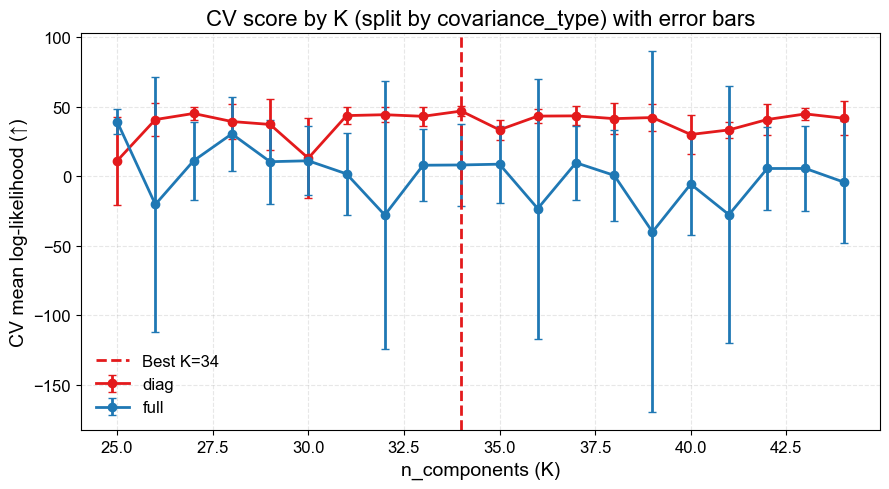

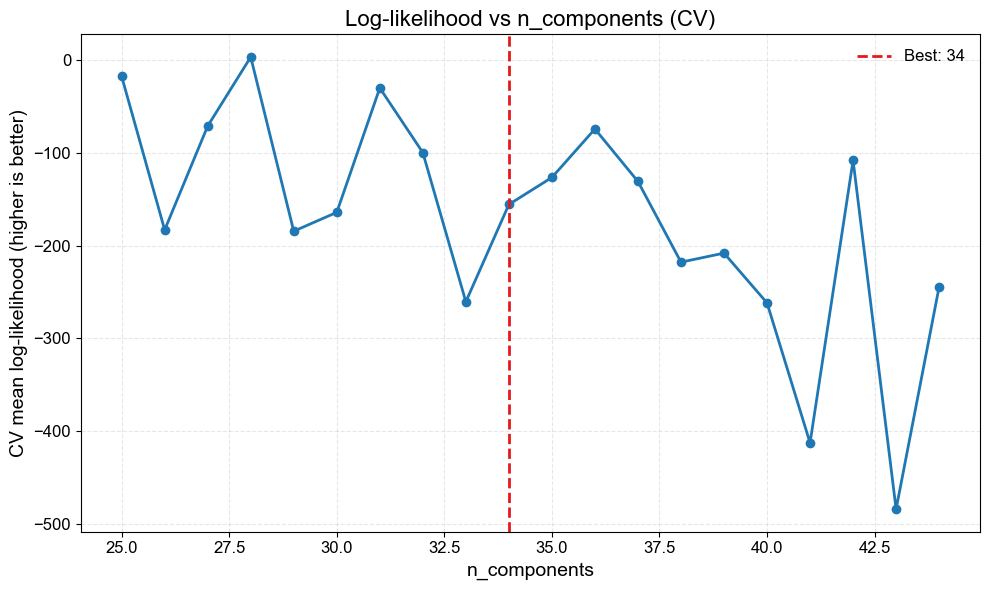


‚úÖ ÂÆåÊï¥PipelineÂ∑≤‰øùÂ≠òÂà∞: gmm_model_34c_fixed.pkl
‚úÖ ‰øÆÂ§çÁâàÊú¨GMMÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàêÔºÅ

ÂºÄÂßãÁéØÂ¢ÉÁõ∏‰ººÂ∫¶ËØÑÂàÜ...
‚úÖ ÁéØÂ¢ÉÁõ∏‰ººÂ∫¶ÂæóÂàÜËÆ°ÁÆóÂÆåÊàêÔºÅ
ÂØÜÂ∫¶ËåÉÂõ¥: [0.000000, 13741447255518889918622334976.000000]
ÁéØÂ¢ÉÂàÜÊï∞ËåÉÂõ¥: [0.000000, 0.957188]
Ê†áÂÆöÊù•Ê∫ê: Êú™Áü•
‰ΩøÁî®ÁöÑÊ†áÂÆöÂùáÂÄº: 49.254267
‚úÖ Results saved: data/US_data/abandon_filtered_with_gmm_scores.csv
(Use merge_id to join with original data by index, or spatial join with lat/lon)

Running similarity diagnostics (log-density/PIT/PCA/MD¬≤)...


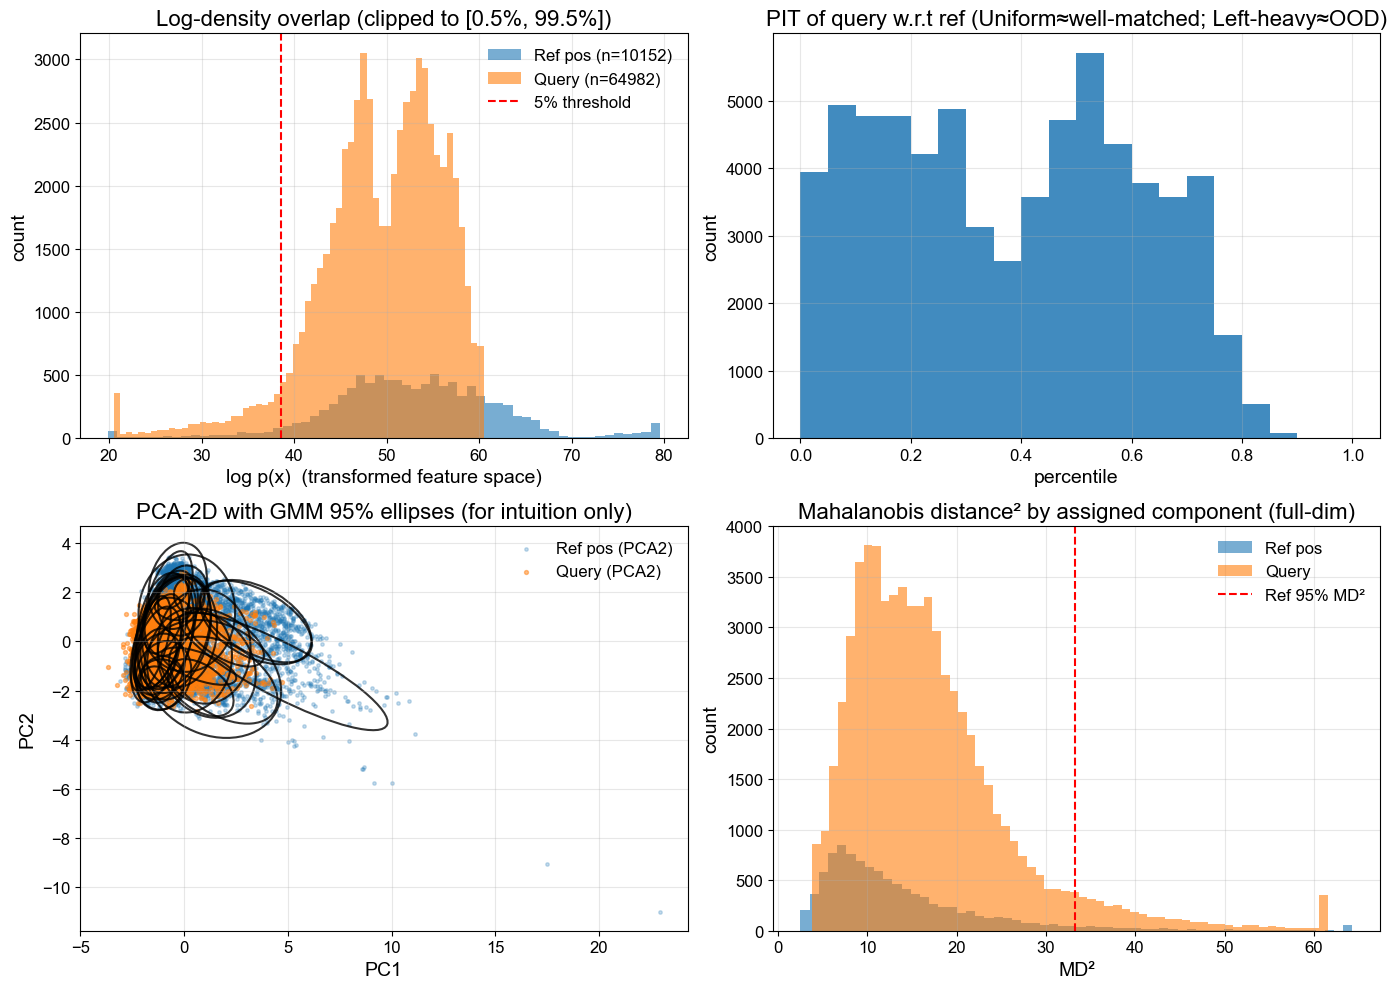


                    Áõ∏‰ººÊÄßËØäÊñ≠ËØ¶ÁªÜÊä•Âëä

üìä Êï∞ÊçÆÊ¶ÇËßà:
  ÂèÇËÄÉÊ≠£Ê†∑Êú¨: 10,152 ‰∏™
  Êü•ËØ¢Ê†∑Êú¨: 64,982 ‰∏™

üéØ Âü∫‰∫éLog-DensityÁöÑÁõ∏‰ººÊÄßÂàÜÂ±Ç:
  üî• ÊûÅÂ∫¶Áõ∏‰ºº (>95%ÂàÜ‰Ωç): 0 ‰∏™ (0.0%)
  ‚ú® È´òÂ∫¶Áõ∏‰ºº (75%-95%): 2,129 ‰∏™ (3.3%)
  üìà ‰∏≠Á≠âÁõ∏‰ºº (25%-75%): 40,216 ‰∏™ (61.9%)
  ‚ö†Ô∏è ‰ΩéÂ∫¶Áõ∏‰ºº (5%-25%): 18,698 ‰∏™ (28.8%)
  ‚ùå ÂºÇÂ∏∏ÂÄº (<5%ÂàÜ‰Ωç): 3,939 ‰∏™ (6.1%)

üé≤ Ê¶ÇÁéáÁßØÂàÜÂèòÊç¢(PIT)ÂàÜÊûê:
  ÂùáÂåÄÊÄßÂÅèÁ¶ªÂ∫¶: 2847.160 (Ë∂äÂ∞èË∂äÂ•Ω, <3249.1‰∏∫ËâØÂ•Ω)
  Â∑¶ÂÅèÈáçÊØî‰æã: 28.3% (È´òÂÄºË°®Á§∫Êü•ËØ¢Ê†∑Êú¨ÂÅèÁ¶ªÂèÇËÄÉÂàÜÂ∏É)
  Âè≥ÂÅèÈáçÊØî‰æã: 0.9%
  PITÂàÜÂ∏É‰∏ä‰∏ãÂõõÂàÜ‰ΩçÊï∞: Q1=0.179 ¬± 0.001 (95%CI: 0.177 ~ 0.181)
                      Q2/‰∏≠‰ΩçÊï∞=0.388 ¬± 0.001 (95%CI: 0.385 ~ 0.390)
                      Q3=0.566 ¬± 0.001 (95%CI: 0.564 ~ 0.569)
  PITÂùáÂÄº: 0.381 ¬± 0.001 (95%CI: 0.379 ~ 0.383)

üìè È©¨Ê∞èË∑ùÁ¶ªÁªüËÆ°:
  ‰∏≠‰ΩçÊï∞‰ª•ÂÜÖ: 28.3%
  90%ÂàÜ‰Ωç‰ª•ÂÜÖ: 87.3%
  95%ÂàÜ‰Ωç‰ª•ÂÜÖ: 94.0%
  ÂºÇÂ∏∏ÂÄº(>99%): 1.0%

üèÜ ÁªºÂê

<Figure size 640x480 with 0 Axes>

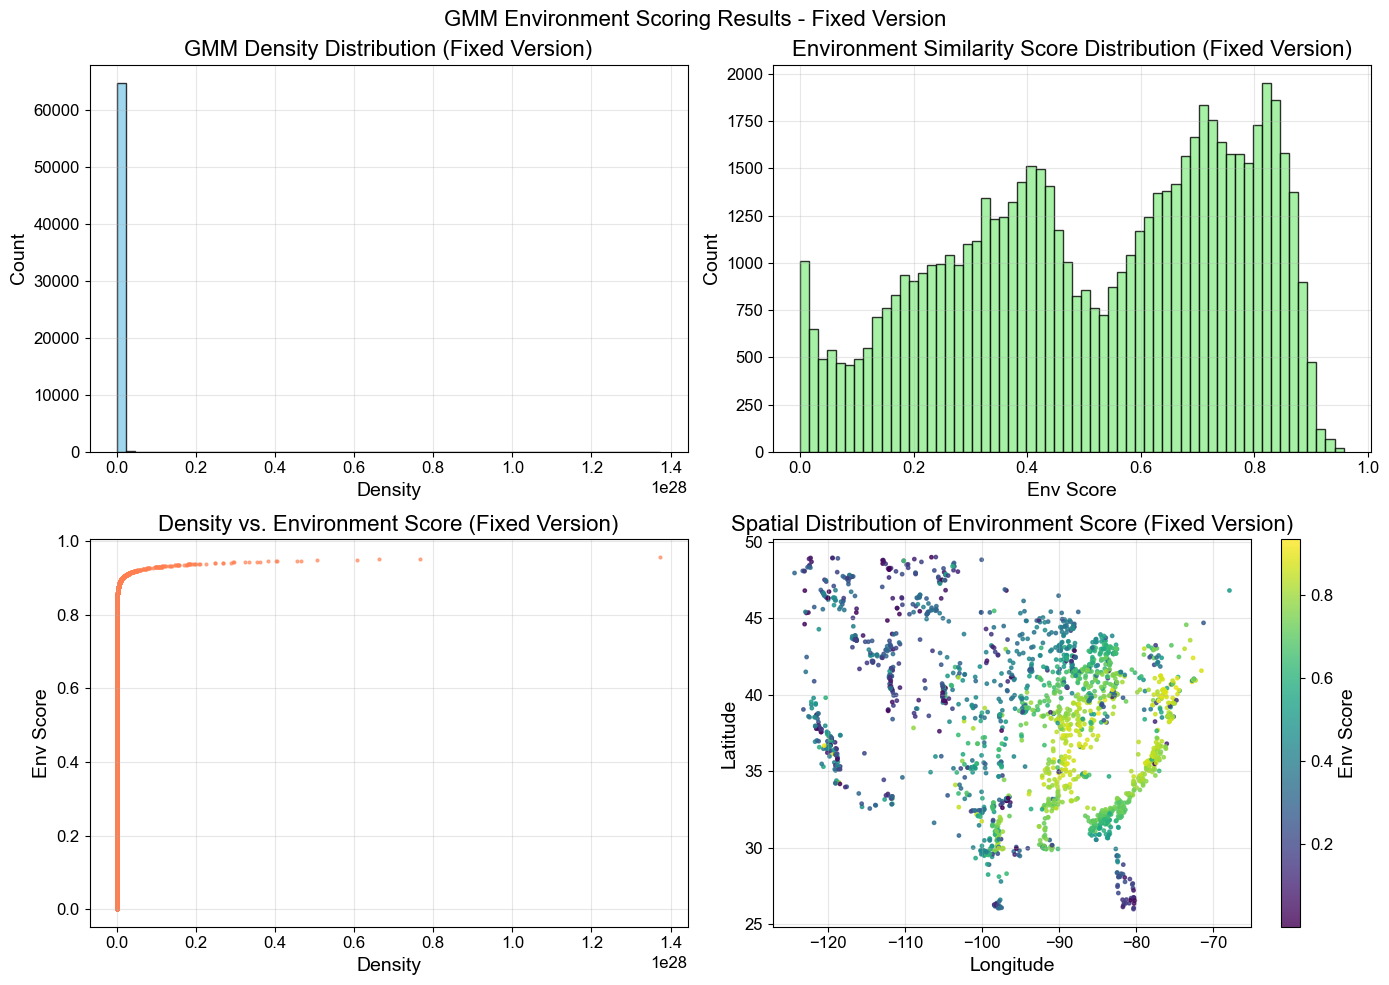

In [8]:
# -*- coding: utf-8 -*-
"""
Run GMM environment scoring on US mainland points.
- ‰ΩøÁî®Á¨¨‰∫åÊ¨°Ë£ÅÂâ™ÂêéÁöÑ df_embedding_fill[features_no_coords] ËÆ≠ÁªÉ
- ÂØπ df_abandon_filtered[features_no_coords] ÊâìÂàÜ
- ‰ªÖ‰øùÂ≠òÊúÄÁªàÁªìÊûúÔºàÂê´ merge_id ÂàóÔºå‰æø‰∫é‰∏éÂéüÊï∞ÊçÆÊãºÊé•Ôºâ
- ËæìÂá∫ÂÖ≥ÈîÆÊÄßËÉΩÂõæË°®ÔºàÂØÜÂ∫¶ÂàÜÂ∏É„ÄÅÂæóÂàÜÂàÜÂ∏É„ÄÅÂØÜÂ∫¶-ÂæóÂàÜÊï£ÁÇπÔºâ
"""

from function import *  # ÈúÄË¶ÅÂåÖÂê´: PATHS, load_abandon, load_embedding, fill_nonpositive_with_nearest,
                        # filter_duplicates, select_and_train_gmm, 
                        # NUMERIC_FEATURES, CAT_COLS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import json
from datetime import datetime


def clip_data_with_us_states(df, us_states_gdf, lon_col='lon', lat_col='lat'):
    """
    ‰ΩøÁî®ÁæéÂõΩÂ∑ûÁïå shapefile Ââ™Ë£ÅÁÇπÊï∞ÊçÆÔºõÂÖºÂÆπ‰∏çÂêåÁâàÊú¨ÁöÑ geopandas ÂèÇÊï∞Âêç
    """
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    us_states_4326 = us_states_gdf.to_crs('EPSG:4326')

    try:
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    except TypeError:
        # ÊóßÁâàÊú¨ geopandas ‰ΩøÁî® op ÂèÇÊï∞
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', op='within')

    # Ê∏ÖÁêÜ shapefile ÈôÑÂä†Â≠óÊÆµ
    clipped = clipped.drop(columns=['geometry', 'index_right'], errors='ignore')
    for col in us_states_gdf.columns:
        if col in clipped.columns:
            clipped = clipped.drop(columns=[col], errors='ignore')
    return clipped


if __name__ == '__main__':
    np.random.seed(42)

    # ---------------------------
    # 0) Âü∫Á°ÄÂú∞ÁêÜËåÉÂõ¥‰∏éÂ∫ïÂõæ
    # ---------------------------
    usa_bounds_main = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
    us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')

    # ---------------------------
    # 1) ËØªÂèñÊï∞ÊçÆ
    # ---------------------------
    df_abandon = load_abandon(PATHS['us_abandon'])
    df_embedding = load_embedding(PATHS['us_pv_embedding'])

    # ÂàùÊ≠•ÁªèÁ∫¨Â∫¶ËåÉÂõ¥ËøáÊª§
    df_embedding = df_embedding[
        (df_embedding['lon'] >= usa_bounds_main['lon_min']) &
        (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
        (df_embedding['lat'] >= usa_bounds_main['lat_min']) &
        (df_embedding['lat'] <= usa_bounds_main['lat_max'])
    ]

    # Á¨¨‰∫åÊ¨°Áî®Â∑ûÁïåÁü¢ÈáèÊõ¥Á≤æÁ°ÆË£ÅÂâ™
    df_abandon = clip_data_with_us_states(df_abandon, us_states)
    df_embedding = clip_data_with_us_states(df_embedding, us_states)

    # ---------------------------
    # 2) Áº∫Â§±ÂÄºÂ°´ÂÖÖ + ÂéªÈáç
    # ---------------------------
    df_abandon_fill   = fill_nonpositive_with_nearest(df_abandon)
    df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)

    df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)

     # ---------------------------
    # 3) ÁâπÂæÅÈÄâÊã©ÔºàÊéíÈô§ÁªèÁ∫¨Â∫¶Ôºâ
    # ---------------------------
    features_no_coords = [f for f in (NUMERIC_FEATURES + CAT_COLS) if f not in ['lat', 'lon']]

    # ‰∏∫Á®≥Â¶•ÔºåÂèñ‰∫§ÈõÜÔºàÈò≤Ê≠¢ÂàóÂêç‰∏çÂú® DataFrame ‰∏≠ÂØºËá¥ KeyErrorÔºâ
    features_no_coords = [c for c in features_no_coords if c in df_embedding_fill.columns]
    print(f"‰ΩøÁî®ÁöÑÁâπÂæÅÊï∞Èáè: {len(features_no_coords)}")
    print(f"ÁâπÂæÅÂàóË°®: {features_no_coords}")

    # ---------------------------
    # 4) ËÆ≠ÁªÉ‰øÆÂ§çÁâàÊú¨ÁöÑGMMÔºàËß£ÂÜ≥Êï∞ÊçÆÊ≥ÑÈú≤Ôºâ
    # ---------------------------
    print("\nÂºÄÂßãËÆ≠ÁªÉ‰øÆÂ§çÁâàÊú¨ÁöÑGMMÊ®°Âûã...")
    gmm_pipeline = select_and_train_gmm(df_embedding_fill[features_no_coords])

    print("‚úÖ ‰øÆÂ§çÁâàÊú¨GMMÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàêÔºÅ")

    # # ËÆ≠ÁªÉÂÆåÊàêÂêéÔºåËÆ°ÁÆóÂπ∂‰øùÂ≠òÊ†áÂÆöÂèÇÊï∞ÔºàÊµãËØï‰∏ÄËá¥ÊÄßÔºåÊÖéÁî®ÔºÅÔºÅÔºÅÔºâ
    # print("\nËÆ°ÁÆóÂπ∂‰øùÂ≠òÊ†áÂÆöÂèÇÊï∞...")

    # X_train_processed = gmm_pipeline.named_steps['preprocessor'].transform(df_embedding_fill[features_no_coords])
    # gmm_trained = gmm_pipeline.named_steps['gmm']
    # logdens_train = gmm_trained.score_samples(X_train_processed)

    # # ‰øùÂ≠òÊ†áÂÆöÂèÇÊï∞Âà∞pipeline
    # calibration_stats = {
    #     'mu': float(logdens_train.mean()),
    #     'mean': float(logdens_train.mean()),
    #     'std': float(logdens_train.std()),
    #     'min': float(logdens_train.min()),
    #     'max': float(logdens_train.max()),
    #     'n_samples': len(logdens_train),
    #     'method': 'sigmoid',
    #     'sigmoid_alpha': 1.0
    # }

    # # Â∞ÜÊ†áÂÆöÂèÇÊï∞ÈôÑÂä†Âà∞pipeline
    # gmm_pipeline.calibration_ = calibration_stats

    # print(f"‚úÖ Ê†áÂÆöÂèÇÊï∞Â∑≤‰øùÂ≠ò:")
    # print(f"   ÂùáÂÄº: {calibration_stats['mu']:.6f}")
    # print(f"   Ê†áÂáÜÂ∑Æ: {calibration_stats['std']:.6f}")
    # print(f"   ËåÉÂõ¥: [{calibration_stats['min']:.6f}, {calibration_stats['max']:.6f}]")

    # ---------------------------
    # 5) ‰ΩøÁî®‰øÆÂ§çÁâàÊú¨ËøõË°åÁéØÂ¢ÉËØÑÂàÜ
    # ---------------------------
    print("\nÂºÄÂßãÁéØÂ¢ÉÁõ∏‰ººÂ∫¶ËØÑÂàÜ...")

    # ‰ΩøÁî®‰Ω†ÁöÑ score_envÂáΩÊï∞
    dens, env_scores, stats = score_env(
        gmm_pipeline, 
        df_abandon_filtered[features_no_coords],
        method='sigmoid',
        sigmoid_alpha=0.2,
        reference_stats=None,  
        return_logdens=False
    )

    print("‚úÖ ÁéØÂ¢ÉÁõ∏‰ººÂ∫¶ÂæóÂàÜËÆ°ÁÆóÂÆåÊàêÔºÅ")
    print(f"ÂØÜÂ∫¶ËåÉÂõ¥: [{dens.min():.6f}, {dens.max():.6f}]")
    print(f"ÁéØÂ¢ÉÂàÜÊï∞ËåÉÂõ¥: [{env_scores.min():.6f}, {env_scores.max():.6f}]")
    print(f"Ê†áÂÆöÊù•Ê∫ê: {stats.get('calibration_source', 'Êú™Áü•')}")
    print(f"‰ΩøÁî®ÁöÑÊ†áÂÆöÂùáÂÄº: {stats['mu']:.6f}")

    # ---------------------------
    # 6) ‰∏ÄËá¥ÊÄßÈ™åËØÅÊµãËØï
    # ---------------------------
    # print("\nËøõË°å‰∏ÄËá¥ÊÄßÈ™åËØÅÊµãËØï...")

    # # ÊµãËØïÊ†∑Êú¨
    # test_sample = df_abandon_filtered[features_no_coords].head(1000)

    # # Á¨¨‰∏ÄÊ¨°È¢ÑÊµã
    # dens1, scores1, stats1 = score_env(
    #     gmm_pipeline, 
    #     test_sample,
    #     method='sigmoid',
    #     sigmoid_alpha=1.0
    # )

    # # Á¨¨‰∫åÊ¨°È¢ÑÊµãÔºàÂ∫îËØ•ÂÆåÂÖ®‰∏ÄËá¥Ôºâ
    # dens2, scores2, stats2 = score_env(
    #     gmm_pipeline, 
    #     test_sample,
    #     method='sigmoid',
    #     sigmoid_alpha=1.0
    # )

    # # # Ê£ÄÊü•‰∏ÄËá¥ÊÄß
    # # dens_consistent = np.allclose(dens1, dens2, rtol=1e-10)
    # # scores_consistent = np.allclose(scores1, scores2, rtol=1e-10)

    # print(f"‚úÖ ÂØÜÂ∫¶È¢ÑÊµã‰∏ÄËá¥ÊÄß: {dens_consistent}")
    # print(f"‚úÖ ÂàÜÊï∞È¢ÑÊµã‰∏ÄËá¥ÊÄß: {scores_consistent}")

    # if dens_consistent and scores_consistent:
    #     print("üéâ ÂÆåÁæéÔºÅÈ¢ÑÊµãÁªìÊûúÂÆåÂÖ®‰∏ÄËá¥")
    # else:
    #     print("‚ö†Ô∏è Ë≠¶ÂëäÔºöÈ¢ÑÊµãÁªìÊûú‰∏ç‰∏ÄËá¥ÔºåËØ∑Ê£ÄÊü•")

    # ---------------------------
    # 6) ‰øùÂ≠òÊúÄÁªàÁªìÊûúÔºàÂê´ merge_id ‰æø‰∫éÂõûÊãºÔºâ
    # ---------------------------
    save_dir = "data/US_data"
    os.makedirs(save_dir, exist_ok=True)
    # Â∞ÜÁéØÂ¢ÉÂàÜÊï∞ÂíåÂØÜÂ∫¶Á≠âÁªìÊûú‰∏éÂéüÂßãÊï∞ÊçÆÈÄöËøá 'lat' Âíå 'lon' ‰∏§ÂàóÁªÑÂêà merge ÂêàÂπ∂ËæìÂá∫
    # ÊûÑÂª∫ÁªìÊûúDataFrame
    results = pd.DataFrame({
        'lon': df_abandon_filtered['lon'].values,
        'lat': df_abandon_filtered['lat'].values,
        'gmm_density': dens,
        'gmm_env_score': env_scores,
    })

    # Â∞Üresults mergeÂà∞df_abandon_filtered
    df_abandon_filtered = pd.merge(
        df_abandon_filtered,
        results[['lat', 'lon', 'gmm_density', 'gmm_env_score']],
        on=['lat', 'lon'],
        how='left'
    )

    # ËæìÂá∫ÂêàÂπ∂ÂêéÁöÑÁªìÊûú
    df_abandon_filtered.to_csv('data/US_data/abandon_filtered_with_gmm_scores.csv', index=False)

    print(f"‚úÖ Results saved: data/US_data/abandon_filtered_with_gmm_scores.csv")
    print("(Use merge_id to join with original data by index, or spatial join with lat/lon)")


    # ---------------------------
    # 7) Áõ∏‰ººÊÄßÂèØËßÜÂåñËØäÊñ≠Ôºàlog-density / PIT / PCA / MahalanobisÔºâ
    # ---------------------------
    print("\nRunning similarity diagnostics (log-density/PIT/PCA/MD¬≤)...")
    try:
        # ‰ª• df_embedding_fill ‰Ωú‰∏∫ÂèÇËÄÉÊ≠£Ê†∑Êú¨Ôºõdf_abandon_filtered ‰Ωú‰∏∫ÂæÖËØÑÊï∞ÊçÆ
        diag_out = visualize_similarity_diagnostics(
            gmm_pipeline,
            df_ref_pos=df_embedding_fill[features_no_coords],
            df_query=df_abandon_filtered[features_no_coords],
            q_cut=0.05,            # ÂèÇËÄÉÈõÜ5%ÂàÜ‰ΩçÈòàÂÄºÔºàÂèØÊîπÊàê0.10Êàñ0.01Ôºâ
            max_points_pca=8000,   # PCAÊäïÂΩ±Áî®‰∫éÂèØËßÜÂåñÁöÑÊúÄÂ§ßÈááÊ†∑Êï∞
            random_state=42
        )

        # Á´ãÂç≥‰øùÂ≠òÂΩìÂâçÁîüÊàêÁöÑËØäÊñ≠Âõæ
        diag_ts = datetime.now().strftime("%Y%m%d_%H%M%S")
        diag_path = os.path.join(save_dir, f"similarity_diagnostics_{diag_ts}.png")
        plt.gcf().savefig(diag_path, dpi=300, bbox_inches='tight')
        print(f"‚úÖ Similarity diagnostics saved: {diag_path}")
        print(f"   5% ÈòàÂÄº(log p): {diag_out['logp_threshold_value']:.6f} | "
              f"ref Œº={diag_out['logp_ref_mean']:.6f}, œÉ={diag_out['logp_ref_std']:.6f}")

        # ÂèØÈÄâÔºöÂ¶ÇÊûú‰Ω†‰∏çÊÉ≥ÈáçÂ§çÊòæÁ§∫Ôºå‰øùÂ≠òÂêéÂèØ‰ª•ÂÖ≥Èó≠ÂΩìÂâçÂõæ
        # plt.close()

    except NameError as e:
        print("‚ö†Ô∏è Êâæ‰∏çÂà∞ visualize_similarity_diagnosticsÔºåËØ∑Á°ÆËÆ§ËØ•ÂáΩÊï∞Â∑≤Âú® function.py ÊàñÊú¨Êñá‰ª∂‰∏≠ÂÆö‰πâ„ÄÇ")
        print(f"   ËØ¶ÁªÜ‰ø°ÊÅØ: {e}")
    except Exception as e:
        print(f"‚ö†Ô∏è Áõ∏‰ººÊÄßËØäÊñ≠ÁªòÂõæÂ§±Ë¥•: {e}")



    # ---------------------------
    # 7) ÊµãËØïÊ®°ÂûãÂä†ËΩΩÂíåÈ¢ÑÊµã
    # ---------------------------
    # print("\nÊµãËØïÊ®°ÂûãÂä†ËΩΩÂíåÈ¢ÑÊµã...")
    
    # # ÂÅáËÆæÊ®°ÂûãÊñá‰ª∂ÂêçÔºàÊ†πÊçÆÂÆûÈôÖËÆ≠ÁªÉÁªìÊûúË∞ÉÊï¥Ôºâ
    # model_files = [f for f in os.listdir('.') if f.startswith('gmm_model_') and f.endswith('_fixed.pkl')]
    
    # if model_files:
    #     model_filename = model_files[0]  # ÈÄâÊã©Á¨¨‰∏Ä‰∏™ÂåπÈÖçÁöÑÊñá‰ª∂
    #     print(f"ÊâæÂà∞‰øùÂ≠òÁöÑÊ®°Âûã: {model_filename}")
        
    #     # ÊµãËØïÊ†∑Êú¨
    #     test_sample = df_abandon_filtered[features_no_coords].head(1000)

    #     print("\nÊñπÊ≥ï1Ôºö‰ΩøÁî® predict_with_saved_pipeline_v2")
    #     dens_loaded, scores_loaded, stats_loaded = predict_with_saved_pipeline_v2(
    #         test_sample, 
    #         model_filename, 
    #         method='sigmoid',
    #         sigmoid_alpha=1.0,
    #         return_stats=True
    #     )
        
    #     if dens_loaded is not None:
    #         print(f"‚úÖ Ê®°ÂûãÂä†ËΩΩÊµãËØïÊàêÂäüÔºÅ")
    #         print(f"ÊµãËØïÊ†∑Êú¨È¢ÑÊµãÂØÜÂ∫¶ËåÉÂõ¥: [{dens_loaded.min():.6f}, {dens_loaded.max():.6f}]")
    #         print(f"ÊµãËØïÊ†∑Êú¨È¢ÑÊµãÂàÜÊï∞ËåÉÂõ¥: [{scores_loaded.min():.6f}, {scores_loaded.max():.6f}]")
    #         print(f"Ê†áÂÆöÊù•Ê∫ê: {stats_loaded.get('calibration_source', 'Êú™Áü•')}")
            
    #         # È™åËØÅ‰∏ÄËá¥ÊÄßÔºàÂâç1000‰∏™Ê†∑Êú¨Ôºâ
    #         original_dens = dens[:1000]
    #         original_scores = env_scores[:1000]
    #         consistency_dens = np.allclose(original_dens, dens_loaded, rtol=1e-6)
    #         consistency_scores = np.allclose(original_scores, scores_loaded, rtol=1e-6)
            
    #         print(f"ÂØÜÂ∫¶È¢ÑÊµã‰∏ÄËá¥ÊÄß: {consistency_dens}")
    #         print(f"ÂàÜÊï∞È¢ÑÊµã‰∏ÄËá¥ÊÄß: {consistency_scores}")
            
    #         if consistency_dens and consistency_scores:
    #             print("üéâ ÂÆåÁæéÔºÅÈ¢ÑÊµãÁªìÊûúÂÆåÂÖ®‰∏ÄËá¥")
    #         else:
    #             print("‚ÑπÔ∏è Ê≥®ÊÑèÔºöÂèØËÉΩÁî±‰∫é‰∏çÂêåÁöÑÊ†áÂÆöÂèÇÊï∞ÂØºËá¥ËΩªÂæÆÂ∑ÆÂºÇ")
    #     else:
    #         print("‚ö†Ô∏è Ê®°ÂûãÂä†ËΩΩÊµãËØïÂ§±Ë¥•")
    

    # ---------------------------
    # 8) ÂÖ≥ÈîÆÊÄßËÉΩÂõæË°®
    # ---------------------------
    print("\nGenerating key performance plots...")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Density distribution
    axes[0, 0].hist(dens, bins=60, alpha=0.8, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('GMM Density Distribution (Fixed Version)')
    axes[0, 0].set_xlabel('Density')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].grid(True, alpha=0.3)

    # Environment score distribution
    axes[0, 1].hist(env_scores, bins=60, alpha=0.8, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Environment Similarity Score Distribution (Fixed Version)')
    axes[0, 1].set_xlabel('Env Score')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].grid(True, alpha=0.3)

    # Density vs. Score
    axes[1, 0].scatter(dens, env_scores, s=4, alpha=0.6, c='coral')
    axes[1, 0].set_title('Density vs. Environment Score (Fixed Version)')
    axes[1, 0].set_xlabel('Density')
    axes[1, 0].set_ylabel('Env Score')
    axes[1, 0].grid(True, alpha=0.3)

    # Spatial sampling visualization
    sample_n = min(2000, len(results))
    idx = np.random.choice(len(results), sample_n, replace=False)
    sc = axes[1, 1].scatter(results.loc[idx, 'lon'], results.loc[idx, 'lat'],
                            c=results.loc[idx, 'gmm_env_score'].values, s=6, alpha=0.8, cmap='viridis')
    axes[1, 1].set_title('Spatial Distribution of Environment Score (Fixed Version)')
    axes[1, 1].set_xlabel('Longitude')
    axes[1, 1].set_ylabel('Latitude')
    axes[1, 1].grid(True, alpha=0.3)
    plt.colorbar(sc, ax=axes[1, 1], label='Env Score')

    plt.suptitle('GMM Environment Scoring Results - Fixed Version', fontsize=16, y=0.98)
    plt.tight_layout()
    
    # ‰øùÂ≠òÂõæË°®
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    fig_path = os.path.join(save_dir, f"gmm_env_key_plots_fixed_{timestamp}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"‚úÖ Plots saved: {fig_path}")
    plt.show()

    # ---------------------------
    # 9) Ê®°Âûã‰ø°ÊÅØÊÄªÁªì
    # ---------------------------
    # print("\n" + "=" * 60)
    # print("Ê®°Âûã‰ø°ÊÅØÊÄªÁªì:")
    # print("=" * 60)
    
    # if gmm_pipeline:
    #     # Ëé∑ÂèñÈ¢ÑÂ§ÑÁêÜÂô®‰ø°ÊÅØ
    #     preprocessor = gmm_pipeline.named_steps['preprocessor']
    #     feature_info = preprocessor.get_feature_info()
        
    #     # Ëé∑ÂèñGMM‰ø°ÊÅØ
    #     gmm = gmm_pipeline.named_steps['gmm']
        
    #     print(f"‚úÖ ‰ΩøÁî®‰øÆÂ§çÁâàÊú¨PipelineÔºåËß£ÂÜ≥Êï∞ÊçÆÊ≥ÑÈú≤ÈóÆÈ¢ò")
    #     print(f"‚úÖ GMMÁªÑ‰ª∂Êï∞: {gmm.n_components}")
    #     print(f"‚úÖ ÂçèÊñπÂ∑ÆÁ±ªÂûã: {gmm.covariance_type}")
    #     print(f"‚úÖ ÂàÜÁ±ªÁâπÂæÅ‰ø°ÊÅØ: {feature_info}")
    #     print(f"‚úÖ ËÆ≠ÁªÉÊ†∑Êú¨Êï∞: {len(df_embedding_fill)}")
    #     print(f"‚úÖ È¢ÑÊµãÊ†∑Êú¨Êï∞: {len(df_abandon_filtered)}")
    #     print(f"‚úÖ ÁâπÂæÅÊï∞Èáè: {len(features_no_coords)}")
        
        # if model_files:
        #     print(f"‚úÖ Ê®°ÂûãÊñá‰ª∂: {model_files[0]}")
        
    print("=" * 60)

In [9]:
df_abandon_filtered.gmm_env_score.describe()

count    6.498200e+04
mean     5.177997e-01
std      2.479391e-01
min      8.108895e-14
25%      3.222062e-01
50%      5.459391e-01
75%      7.353465e-01
max      9.571883e-01
Name: gmm_env_score, dtype: float64

## GMM‰º∞ËÆ°ËæìÂá∫Êï∞ÊçÆÊ£ÄÊü•

In [4]:

import joblib
from function import *  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import json
from datetime import datetime


def clip_data_with_us_states(df, us_states_gdf, lon_col='lon', lat_col='lat'):
    """
    ‰ΩøÁî®ÁæéÂõΩÂ∑ûÁïå shapefile Ââ™Ë£ÅÁÇπÊï∞ÊçÆÔºõÂÖºÂÆπ‰∏çÂêåÁâàÊú¨ÁöÑ geopandas ÂèÇÊï∞Âêç
    """
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    us_states_4326 = us_states_gdf.to_crs('EPSG:4326')

    try:
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    except TypeError:
        # ÊóßÁâàÊú¨ geopandas ‰ΩøÁî® op ÂèÇÊï∞
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', op='within')

    # Ê∏ÖÁêÜ shapefile ÈôÑÂä†Â≠óÊÆµ
    clipped = clipped.drop(columns=['geometry', 'index_right'], errors='ignore')
    for col in us_states_gdf.columns:
        if col in clipped.columns:
            clipped = clipped.drop(columns=[col], errors='ignore')
    return clipped



np.random.seed(42)

# ---------------------------
# 0) Âü∫Á°ÄÂú∞ÁêÜËåÉÂõ¥‰∏éÂ∫ïÂõæ
# ---------------------------
usa_bounds_main = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')

# ---------------------------
# 1) ËØªÂèñÊï∞ÊçÆ
# ---------------------------
df_abandon = load_abandon(PATHS['us_abandon'])
df_embedding = load_embedding(PATHS['us_pv_embedding'])

# ÂàùÊ≠•ÁªèÁ∫¨Â∫¶ËåÉÂõ¥ËøáÊª§
df_embedding = df_embedding[
    (df_embedding['lon'] >= usa_bounds_main['lon_min']) &
    (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
    (df_embedding['lat'] >= usa_bounds_main['lat_min']) &
    (df_embedding['lat'] <= usa_bounds_main['lat_max'])
]

# Á¨¨‰∫åÊ¨°Áî®Â∑ûÁïåÁü¢ÈáèÊõ¥Á≤æÁ°ÆË£ÅÂâ™
df_abandon = clip_data_with_us_states(df_abandon, us_states)
df_embedding = clip_data_with_us_states(df_embedding, us_states)

# ---------------------------
# 2) Áº∫Â§±ÂÄºÂ°´ÂÖÖ + ÂéªÈáç
# ---------------------------
df_abandon_fill   = fill_nonpositive_with_nearest(df_abandon)
df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)

df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)

    # ---------------------------
# 3) ÁâπÂæÅÈÄâÊã©ÔºàÊéíÈô§ÁªèÁ∫¨Â∫¶Ôºâ
# ---------------------------
features_no_coords = [f for f in (NUMERIC_FEATURES + CAT_COLS) if f not in ['lat', 'lon']]

# ‰∏∫Á®≥Â¶•ÔºåÂèñ‰∫§ÈõÜÔºàÈò≤Ê≠¢ÂàóÂêç‰∏çÂú® DataFrame ‰∏≠ÂØºËá¥ KeyErrorÔºâ
features_no_coords = [c for c in features_no_coords if c in df_embedding_fill.columns]
print("\n[ËΩΩÂÖ•Ê®°Âûã] gmm_model_34c_fixed.pkl ...")
try:
    gmm_pipeline = joblib.load("gmm_model_34c_fixed.pkl")
    print("‚úÖ GMM pipeline loaded.")
except Exception as e:
    print(f"‚ùå Âä†ËΩΩÊ®°ÂûãÂ§±Ë¥•: {e}")
    raise

print("Running similarity diagnostics (log-density/PIT/PCA/MD¬≤)...")
try:
    diag_out = visualize_similarity_diagnostics(
        gmm_pipeline,
        df_ref_pos=df_embedding_fill[features_no_coords],
        df_query=df_abandon_filtered[features_no_coords],
        q_cut=0.05,
        max_points_pca=8000,
        random_state=42
    )
    diag_ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    diag_path = os.path.join(save_dir, f"similarity_diagnostics_{diag_ts}.png")
    plt.gcf().savefig(diag_path, dpi=300, bbox_inches='tight')
    print(f"‚úÖ Similarity diagnostics saved: {diag_path}")
    print(f"   5% ÈòàÂÄº(log p): {diag_out['logp_threshold_value']:.6f} | "
          f"ref Œº={diag_out['logp_ref_mean']:.6f}, œÉ={diag_out['logp_ref_std']:.6f}")
except NameError as e:
    print("‚ö†Ô∏è Êâæ‰∏çÂà∞ visualize_similarity_diagnosticsÔºåËØ∑Á°ÆËÆ§ËØ•ÂáΩÊï∞Â∑≤Âú® function.py ÊàñÊú¨Êñá‰ª∂‰∏≠ÂÆö‰πâ„ÄÇ")
    print(f"   ËØ¶ÁªÜ‰ø°ÊÅØ: {e}")
except Exception as e:
    print(f"‚ö†Ô∏è Áõ∏‰ººÊÄßËØäÊñ≠ÁªòÂõæÂ§±Ë¥•: {e}")

NameError: name 'PATHS' is not defined

# Version 2ÔºàÊ∑±Â∫¶Â≠¶‰π†ÁâàÊú¨Ôºâ

You want to predict the year: 2020.0
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Ê≠£Á°ÆÁöÑËÆ≠ÁªÉÁÆ°ÈÅìÔºöÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑ÁöÑÂÆåÊï¥ÊµÅÁ®ã

Ê≠•È™§1: Âä†ËΩΩÊàñËÆ≠ÁªÉGMMÊ®°ÂûãÁî®‰∫éÁéØÂ¢ÉÁõ∏‰ººÂ∫¶ËØÑ‰º∞
üîç ÂèëÁé∞Â∑≤‰øùÂ≠òÁöÑGMMÊ®°ÂûãÊñá‰ª∂: gmm_model_34c_fixed.pkl
üìÇ Â∞ùËØïÂä†ËΩΩÊ®°Âûã...
‚úÖ ÊàêÂäüÂä†ËΩΩGMMÊ®°Âûã: gmm_model_34c_fixed.pkl
   Ê®°ÂûãÁªÑ‰ª∂Êï∞: 34
   ÂçèÊñπÂ∑ÆÁ±ªÂûã: diag

Ê≠•È™§2: ÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑
Âü∫‰∫éÂ∑≤ËÆ≠ÁªÉGMM + ÂèÇËÄÉÂàÜ‰ΩçÊ†°ÂáÜÁöÑË¥üÊ†∑Êú¨ÈááÊ†∑ÔºàPIT ÂàÜÂ±ÇÔºâ
Using trained GMM model: 34 components, diag covariance
Computing log-density for reference set and prediction pool...
Reference set log-density: mean=52.869, std=9.537
Prediction pool log-density: mean=49.254, std=7.102
Building reference empirical distribution and computing PIT...
‚úÖ Robust calibration parameters attached to pipeline
C

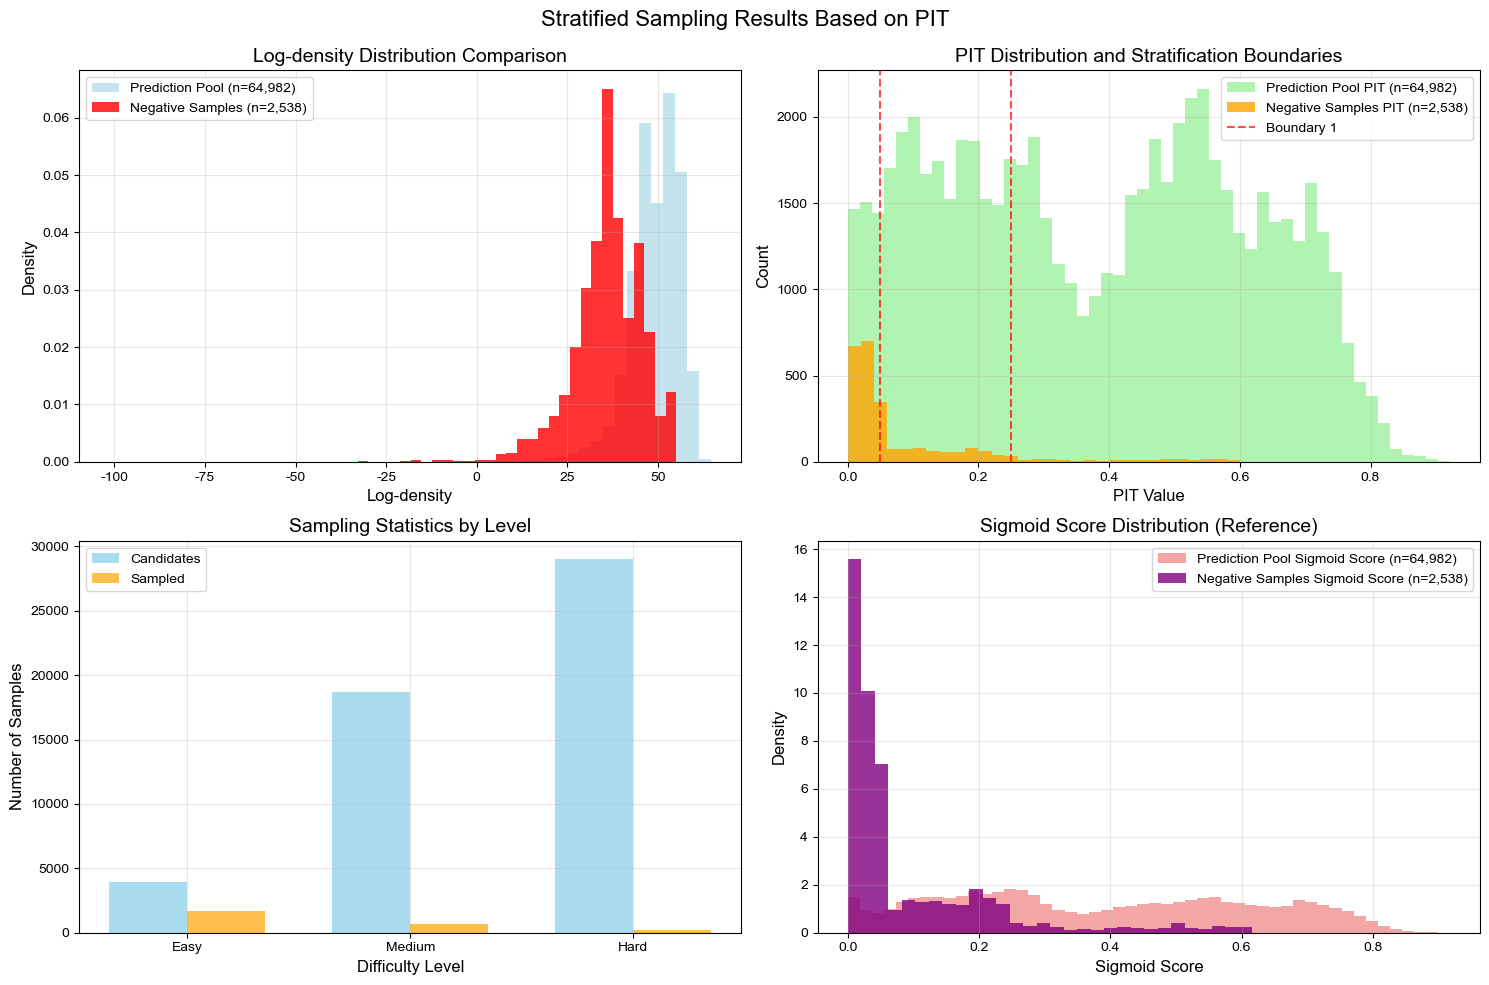


Ê≠•È™§3: ËÆ≠ÁªÉÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÊ®°Âûã
ËÆ≠ÁªÉÊ∑±Â∫¶Â≠¶‰π†ÂàÜÁ±ªÂô®
‚úÖ TensorFlowÁ°ÆÂÆöÊÄßÊ®°ÂºèÂ∑≤ÂêØÁî®
ÂáÜÂ§áÂéüÂßãÊï∞ÊçÆ...
ÂéüÂßãÁâπÂæÅ: (12690, 15)
Ê†áÁ≠æÂàÜÂ∏É: Ê≠£Ê†∑Êú¨=10152, Ë¥üÊ†∑Êú¨=2538, Ê≠£Ê†∑Êú¨ÊØî‰æã=0.800
ÂÖàÂàíÂàÜÂéüÂßãÊï∞ÊçÆ...
ÂéüÂßãÊï∞ÊçÆÂàíÂàÜÂÆåÊàê:
  ËÆ≠ÁªÉÈõÜ: (7614, 15) (Ê≠£Ê†∑Êú¨ÊØî‰æã: 0.800)
  È™åËØÅÈõÜ: (2538, 15) (Ê≠£Ê†∑Êú¨ÊØî‰æã: 0.800)
  ÊµãËØïÈõÜ: (2538, 15) (Ê≠£Ê†∑Êú¨ÊØî‰æã: 0.800)
Âú®ËÆ≠ÁªÉÈõÜ‰∏äÈáçÊñ∞ÊãüÂêàÈ¢ÑÂ§ÑÁêÜÂô®...
‚úÖ È¢ÑÂ§ÑÁêÜÂô®Â∑≤Âú®ËÆ≠ÁªÉÈõÜ‰∏äÈáçÊñ∞ÊãüÂêàÔºàÈÅøÂÖçÊ≠£Ê†∑Êú¨ÂÅèÂ∑ÆÔºâ

ÊâßË°åÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûêÔºà‰ªÖËÆ≠ÁªÉÈõÜÔºåÊó†Ê≥ÑÈú≤Ôºâ...
ÁîüÊàêÁ•ûÁªèÁΩëÁªúÂ≠¶‰π†Êõ≤Á∫øÔºàÂ¢ûÂº∫ÁâàÔºöÂê´ËøáÊãüÂêàÂàÜÊûêÔºâ
Êé®Êñ≠È¢ÑÂ§ÑÁêÜÂêéÁöÑÁâπÂæÅÁª¥Â∫¶...
‚úÖ Êé®Êñ≠ÁöÑËæìÂÖ•Áª¥Â∫¶: 23
‚úÖ È¢ÑÊúüÁâπÂæÅÊûÑÊàê: 14‰∏™Êï∞ÂÄºÁâπÂæÅ + 9‰∏™landcover One-Hot = 23‰∏™ÊÄªÁâπÂæÅ
ÂºÄÂßãÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûê...
  Êï∞ÊçÆÈõÜÂ§ßÂ∞è: 7614
  CVÊäòÊï∞: 5
  ËÆ≠ÁªÉÂ§ßÂ∞è: [0.2 0.4 0.6 0.8 1. ]
  ËæìÂÖ•ÁâπÂæÅÁª¥Â∫¶: 23
Building deep learning model...
Input dim: 23 | Hidden:

C:\Users\zpy10\AppData\Local\Temp\ipykernel_77300\775921488.py:469: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  plt.tight_layout()
C:\Users\zpy10\AppData\Local\Temp\ipykernel_77300\775921488.py:469: UserWarning: Glyph 36807 (\N{CJK UNIFIED IDEOGRAPH-8FC7}) missing from current font.
  plt.tight_layout()
C:\Users\zpy10\AppData\Local\Temp\ipykernel_77300\775921488.py:469: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  plt.tight_layout()
C:\Users\zpy10\AppData\Local\Temp\ipykernel_77300\775921488.py:469: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarni

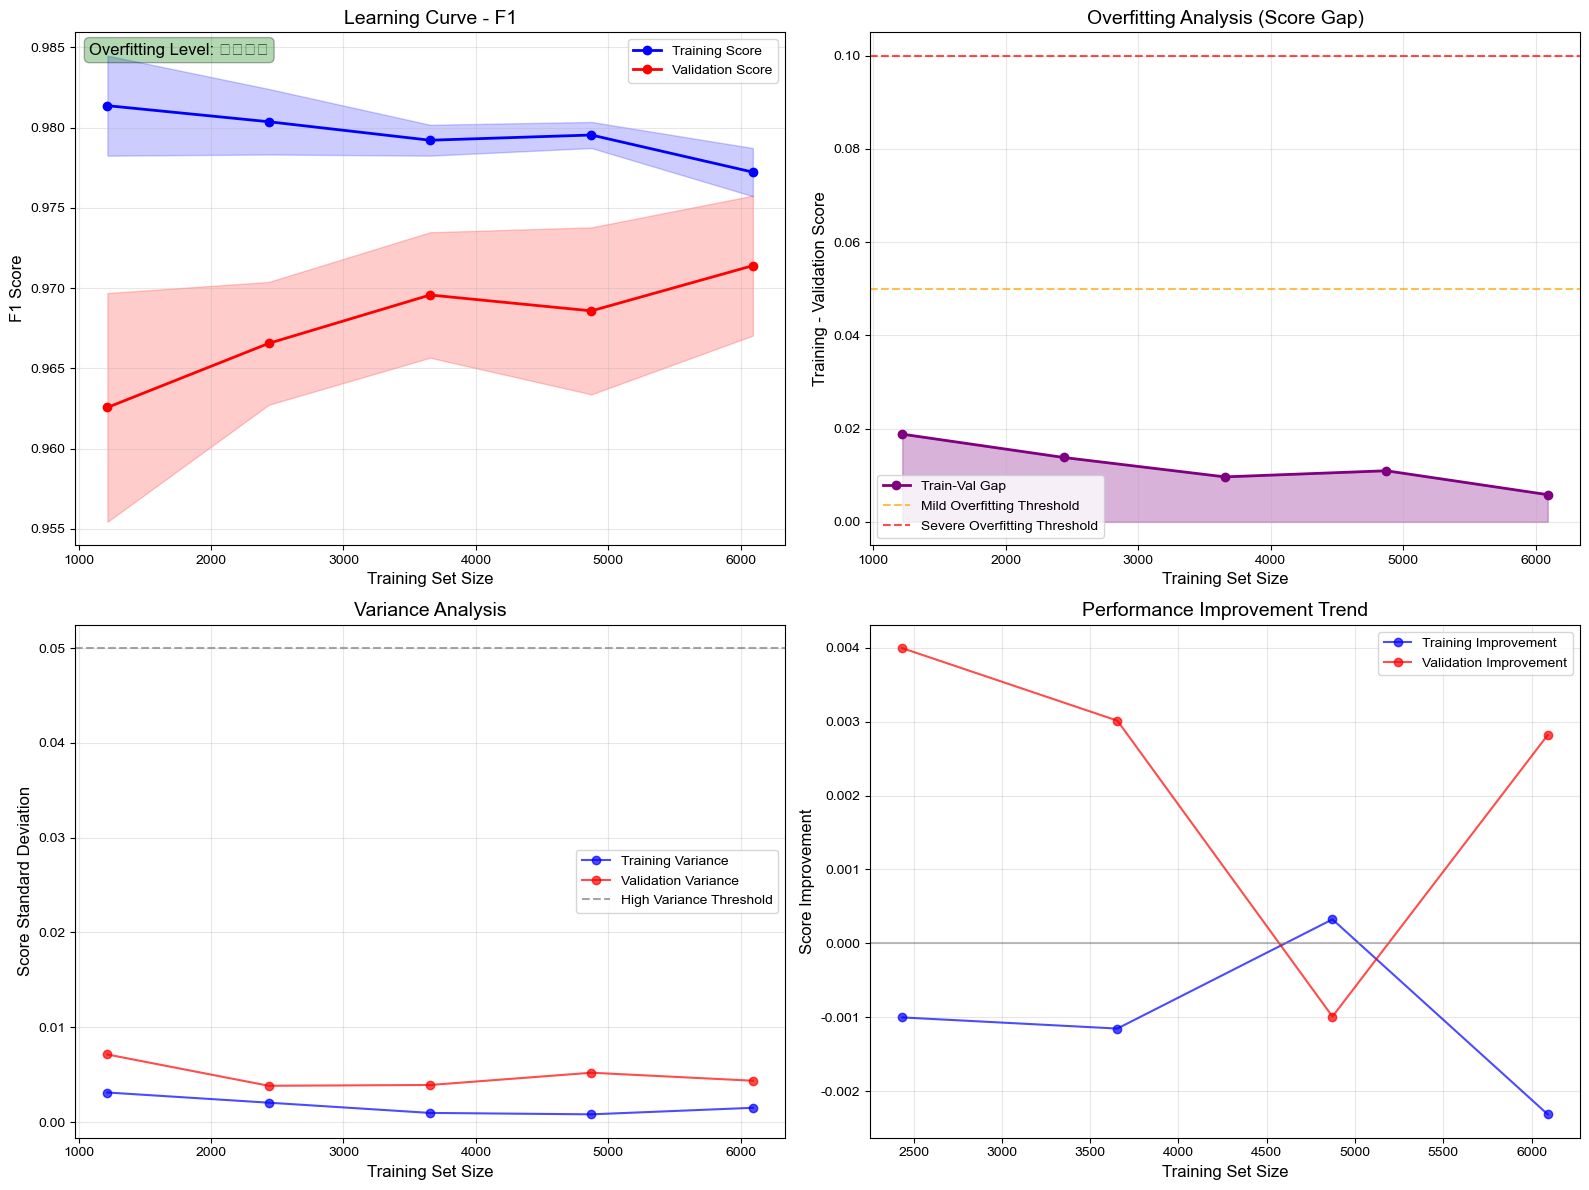


üìä ËØ¶ÁªÜÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûêÊä•Âëä

üéØ Âü∫Êú¨ÊÄßËÉΩÊåáÊ†á:
  ÊúÄÁªàËÆ≠ÁªÉÂàÜÊï∞: 0.9772 (¬±0.0015)
  ÊúÄÁªàÈ™åËØÅÂàÜÊï∞: 0.9714 (¬±0.0044)
  ËÆ≠ÁªÉ-È™åËØÅÂ∑ÆÂºÇ: 0.0058

üîç ËøáÊãüÂêàÂàÜÊûê:
  ËøáÊãüÂêàÁ®ãÂ∫¶: Êó†ËøáÊãüÂêà
  ÊúÄÂ§ßÂàÜÊï∞Â∑ÆÂºÇ: 0.0188
  Â≠¶‰π†ÊïàÁéá: 69.0%

üìà Ë∂ãÂäøÂàÜÊûê:
  ‚úÖ È™åËØÅÊÄßËÉΩÊåÅÁª≠ÊîπÂñÑ
  üìä È™åËØÅÊÄßËÉΩË∂ã‰∫éÁ®≥ÂÆö

üìä ÊñπÂ∑ÆÂàÜÊûê:
  ËÆ≠ÁªÉÊñπÂ∑Æ: 0.0017
  È™åËØÅÊñπÂ∑Æ: 0.0049
  ‚úÖ ÊñπÂ∑ÆÈÄÇ‰∏≠ÔºåÊ®°ÂûãÁõ∏ÂØπÁ®≥ÂÆö

‚úÖ Ê®°ÂûãË°®Áé∞ËâØÂ•ΩÔºåÊó†ÈúÄÁâπÊÆäË∞ÉÊï¥

üìã ÊÄªÁªì:
  ‚úÖ Ê®°ÂûãÊãüÂêàÁ®ãÂ∫¶ËâØÂ•Ω
  ‚úÖ Ê®°ÂûãÊñπÂ∑ÆÈÄÇ‰∏≠

‚úÖ Â¢ûÂº∫ÁâàÂ≠¶‰π†Êõ≤Á∫øÂàÜÊûêÂÆåÊàêÔºÅ
‚úÖ Â≠¶‰π†Êõ≤Á∫øÂàÜÊûêÂÆåÊàê
ÂàÜÂà´È¢ÑÂ§ÑÁêÜ‰∏â‰∏™Êï∞ÊçÆÈõÜ...
È¢ÑÂ§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂:
  ËÆ≠ÁªÉÈõÜ: (7614, 23)
  È™åËØÅÈõÜ: (2538, 23)
  ÊµãËØïÈõÜ: (2538, 23)
ÊûÑÂª∫Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã...
Building deep learning model...
Input dim: 23 | Hidden: [128, 64, 32] | Params: 14,429
ÂºÄÂßãÊ®°ÂûãËÆ≠ÁªÉ...
Epoch 1/50
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

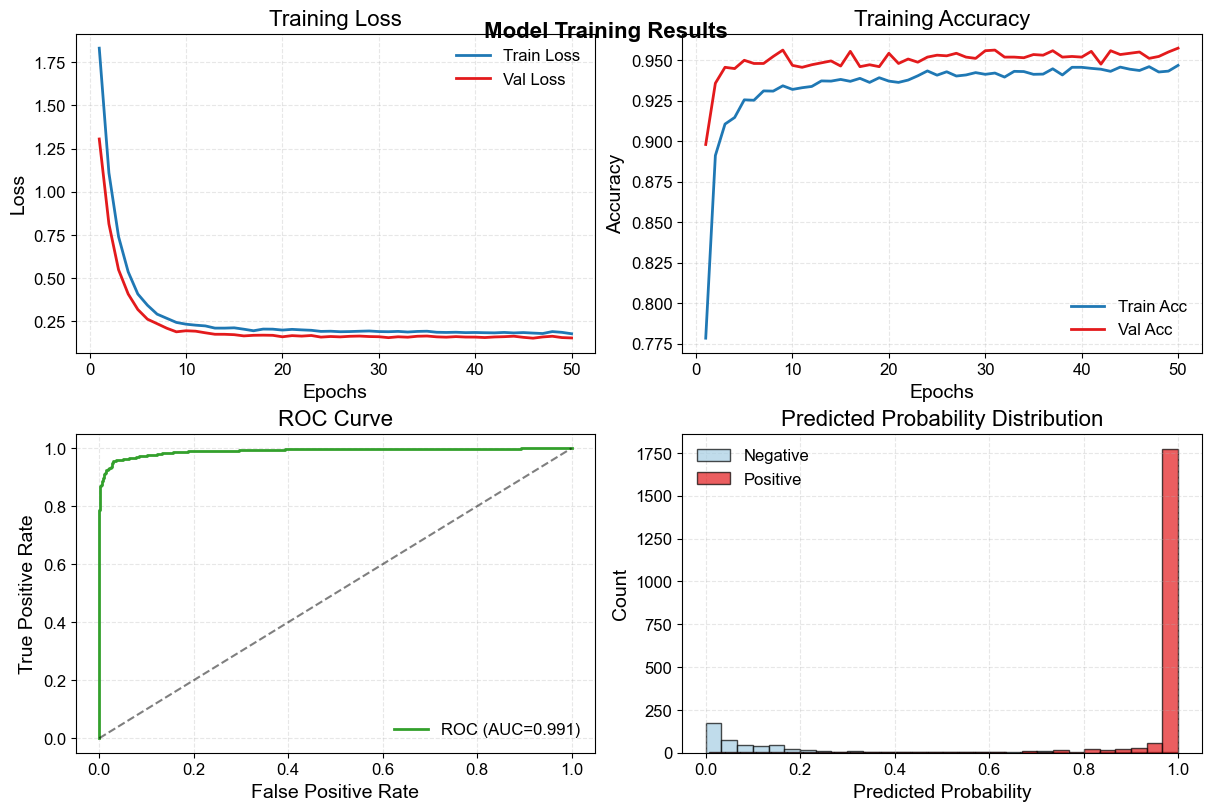

‚úÖ ËÆ≠ÁªÉÂÆåÊàêÔºÅÂ∑≤‰øÆÂ§çÈ¢ÑÂ§ÑÁêÜÂÅèÂ∑ÆÂíåÈöèÊú∫ÁßçÂ≠êÈóÆÈ¢ò

Ê≠•È™§4: ÂØπÂâ©‰ΩôÈ¢ÑÊµãÊ†∑Êú¨ËøõË°åÈ¢ÑÊµã
Ââ©‰ΩôÊ†∑Êú¨È¢ÑÊµãÂÆåÊàê: 62444 ‰∏™Ê†∑Êú¨
È¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊï∞Èáè: 16547
È¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊØî‰æã: 0.265
Âπ≥ÂùáÈ¢ÑÊµãÊ¶ÇÁéá: 0.336

Ê≠•È™§5: ÂêàÂπ∂Ë¥üÊ†∑Êú¨ÂíåÈ¢ÑÊµãÁªìÊûú

Ê£ÄÊü•GMMËØÑÂàÜÂàó:
  negative_resultsÊúâgmm_scoreÂàó: True
  prediction_resultsÊúâgmm_scoreÂàó: True
  final_resultsÊúâgmm_scoreÂàó: True
ÊúÄÁªàÁªìÊûúÂêàÂπ∂ÂÆåÊàê:
  Ë¥üÊ†∑Êú¨Êï∞Èáè: 2538 (Ê†áÁ≠æ=0)
  È¢ÑÊµãÊ†∑Êú¨Êï∞Èáè: 62444
  ÊÄªÊ†∑Êú¨Êï∞Èáè: 64982
  ÊúÄÁªàÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊÄªÊï∞: 16547
  ÊúÄÁªàÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊØî‰æã: 0.255

Ê≠•È™§6: SHAPÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê
Enhanced SHAP Analysis - Â¢ûÂº∫ÁâàÂõ†Â≠êË¥°ÁåÆÂ∫¶ÂàÜÊûê
ÂàÜÊûêÊ†∑Êú¨Êï∞: 2538
ËæìÂÖ•ÁâπÂæÅÊï∞Èáè: 15
ÂÆûÈôÖÁâπÂæÅÊï∞Èáè: 23
üîç ÁâπÂæÅÊò†Â∞ÑÂàÜÊûê:
  - È¢ÑÊúüÊï∞ÂÄºÁâπÂæÅ: 14 ‰∏™
  - È¢ÑÊúüOne-HotÁâπÂæÅ: 9 ‰∏™ (landcover)
  - È¢ÑÊúüÊÄªÁâπÂæÅÊï∞: 23 ‰∏™
  - ÂÆûÈôÖÁâπÂæÅÊï∞: 23 ‰∏™
‚úÖ ÁâπÂæÅÊï∞ÈáèÂÆåÂÖ®ÂåπÈÖçÔºå‰ΩøÁî®Á≤æÁ°ÆÊò†Â∞Ñ
‚úÖ Êô∫ËÉΩÁâπÂæÅ

c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1548
Received: inputs=['Tensor(shape=(50, 23))']
  warnings.warn(msg)
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1548
Received: inputs=['Tensor(shape=(100, 23))']
  warnings.warn(msg)
c:\Users\zpy10\anacond

ÂéüÂßãSHAPÂÄºÂΩ¢Áä∂: (2538, 23, 1)
‰øÆÊ≠£ÂêéSHAPÂÄºÂΩ¢Áä∂: (2538, 23)
‚úÖ SHAPÂÄºËÆ°ÁÆóÂÆåÊàê (‰ΩøÁî® DeepExplainer)

üîç LandcoverÂàÜÁ±ªËØ¶ÁªÜÂàÜÊûê:
--------------------------------------------------
landcover_1 (Á±ªÂà´1):
  Ê†∑Êú¨Êï∞: 390 (15.4%)
  ÊøÄÊ¥ªÊ†∑Êú¨SHAP: 0.0645 ¬± 0.0011
  ÊÄª‰ΩìSHAPÂùáÂÄº: 0.0003
  Ê≠£ÂêëÂΩ±ÂìçÊØî‰æã: 100.0%

landcover_2 (Á±ªÂà´2):
  Ê†∑Êú¨Êï∞: 523 (20.6%)
  ÊøÄÊ¥ªÊ†∑Êú¨SHAP: -0.0687 ¬± 0.0023
  ÊÄª‰ΩìSHAPÂùáÂÄº: -0.0016
  Ê≠£ÂêëÂΩ±ÂìçÊØî‰æã: 0.0%

landcover_3 (Á±ªÂà´3):
  Ê†∑Êú¨Êï∞: 319 (12.6%)
  ÊøÄÊ¥ªÊ†∑Êú¨SHAP: -0.0526 ¬± 0.0030
  ÊÄª‰ΩìSHAPÂùáÂÄº: 0.0019
  Ê≠£ÂêëÂΩ±ÂìçÊØî‰æã: 2.5%

landcover_4 (Á±ªÂà´4):
  Ê†∑Êú¨Êï∞: 417 (16.4%)
  ÊøÄÊ¥ªÊ†∑Êú¨SHAP: 0.0014 ¬± 0.0002
  ÊÄª‰ΩìSHAPÂùáÂÄº: -0.0006
  Ê≠£ÂêëÂΩ±ÂìçÊØî‰æã: 67.9%

landcover_5 (Á±ªÂà´5):
  Ê†∑Êú¨Êï∞: 370 (14.6%)
  ÊøÄÊ¥ªÊ†∑Êú¨SHAP: 0.0045 ¬± 0.0009
  ÊÄª‰ΩìSHAPÂùáÂÄº: -0.0001
  Ê≠£ÂêëÂΩ±ÂìçÊØî‰æã: 68.6%

landcover_6 (Á±ªÂà´6):
  Ê†∑Êú¨Êï∞: 167 (6.6%)
  ÊøÄÊ¥ªÊ†∑Êú¨SHAP: 0.0203 ¬± 0.0016
  ÊÄ

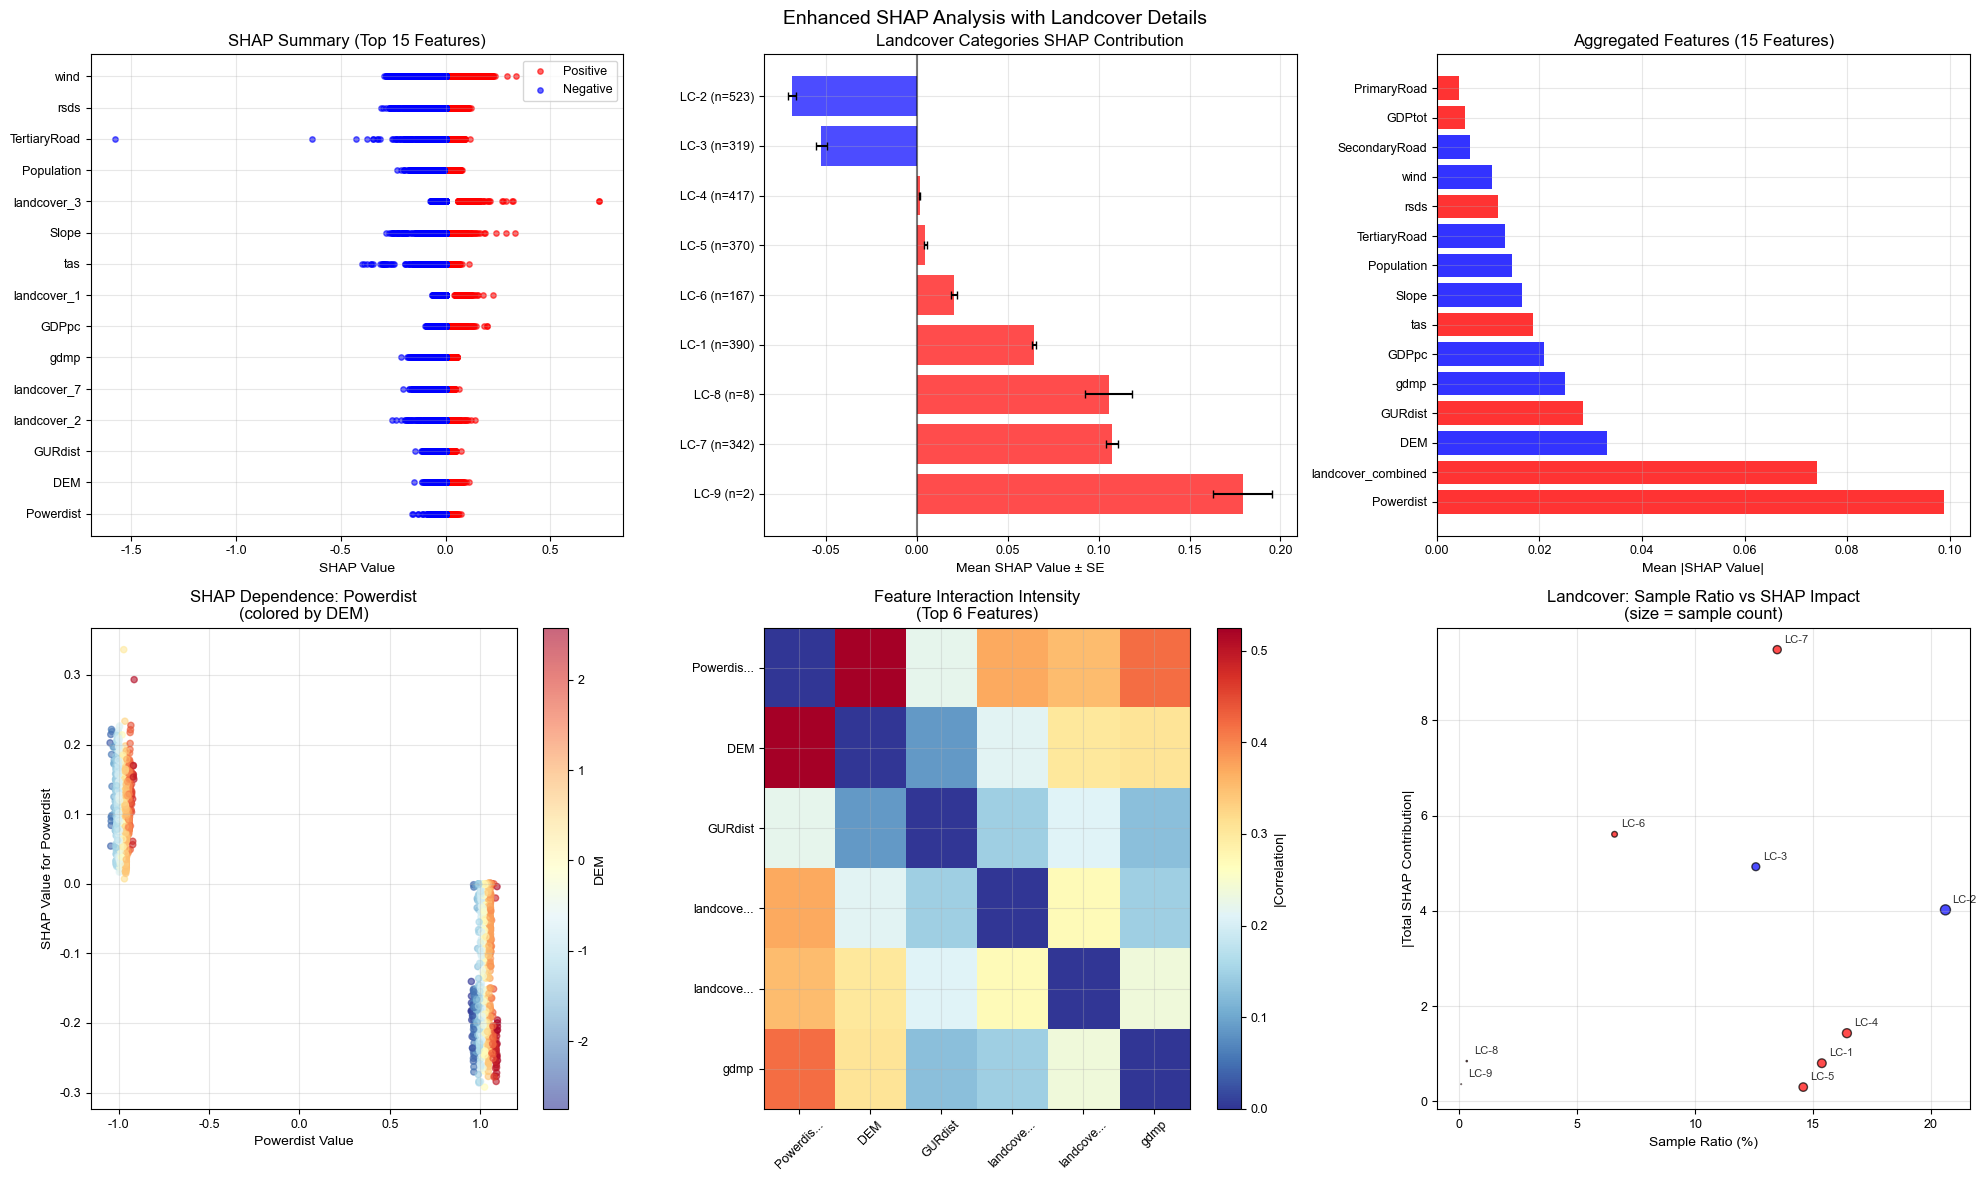


üîç Â¢ûÂº∫ÁâàSHAPÂàÜÊûêËØ¶ÁªÜÊä•Âëä

üìä ÂéüÂßãÁâπÂæÅÁªüËÆ° (23‰∏™ÁâπÂæÅ):
Top 10 ÊúÄÈáçË¶ÅÁâπÂæÅ (ÂéüÂßãÁâπÂæÅ):
    feature  mean_abs_shap  mean_shap  positive_ratio  positive_contribution  negative_contribution
  Powerdist         0.0990     0.0033          0.5284               129.7748              -121.4398
        DEM         0.0333    -0.0095          0.6017                30.0879               -54.3083
    GURdist         0.0284     0.0022          0.7506                38.9360               -33.2615
landcover_2         0.0267    -0.0016          0.7939                31.8989               -35.9198
landcover_7         0.0252     0.0037          0.1348                36.6768               -27.1897
       gdmp         0.0250    -0.0019          0.6939                29.2558               -34.1962
      GDPpc         0.0210    -0.0011          0.7518                25.2623               -27.9392
landcover_1         0.0195     0.0003          0.1537                25.1425       

C:\Users\zpy10\AppData\Local\Temp\ipykernel_77300\502103868.py:962: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


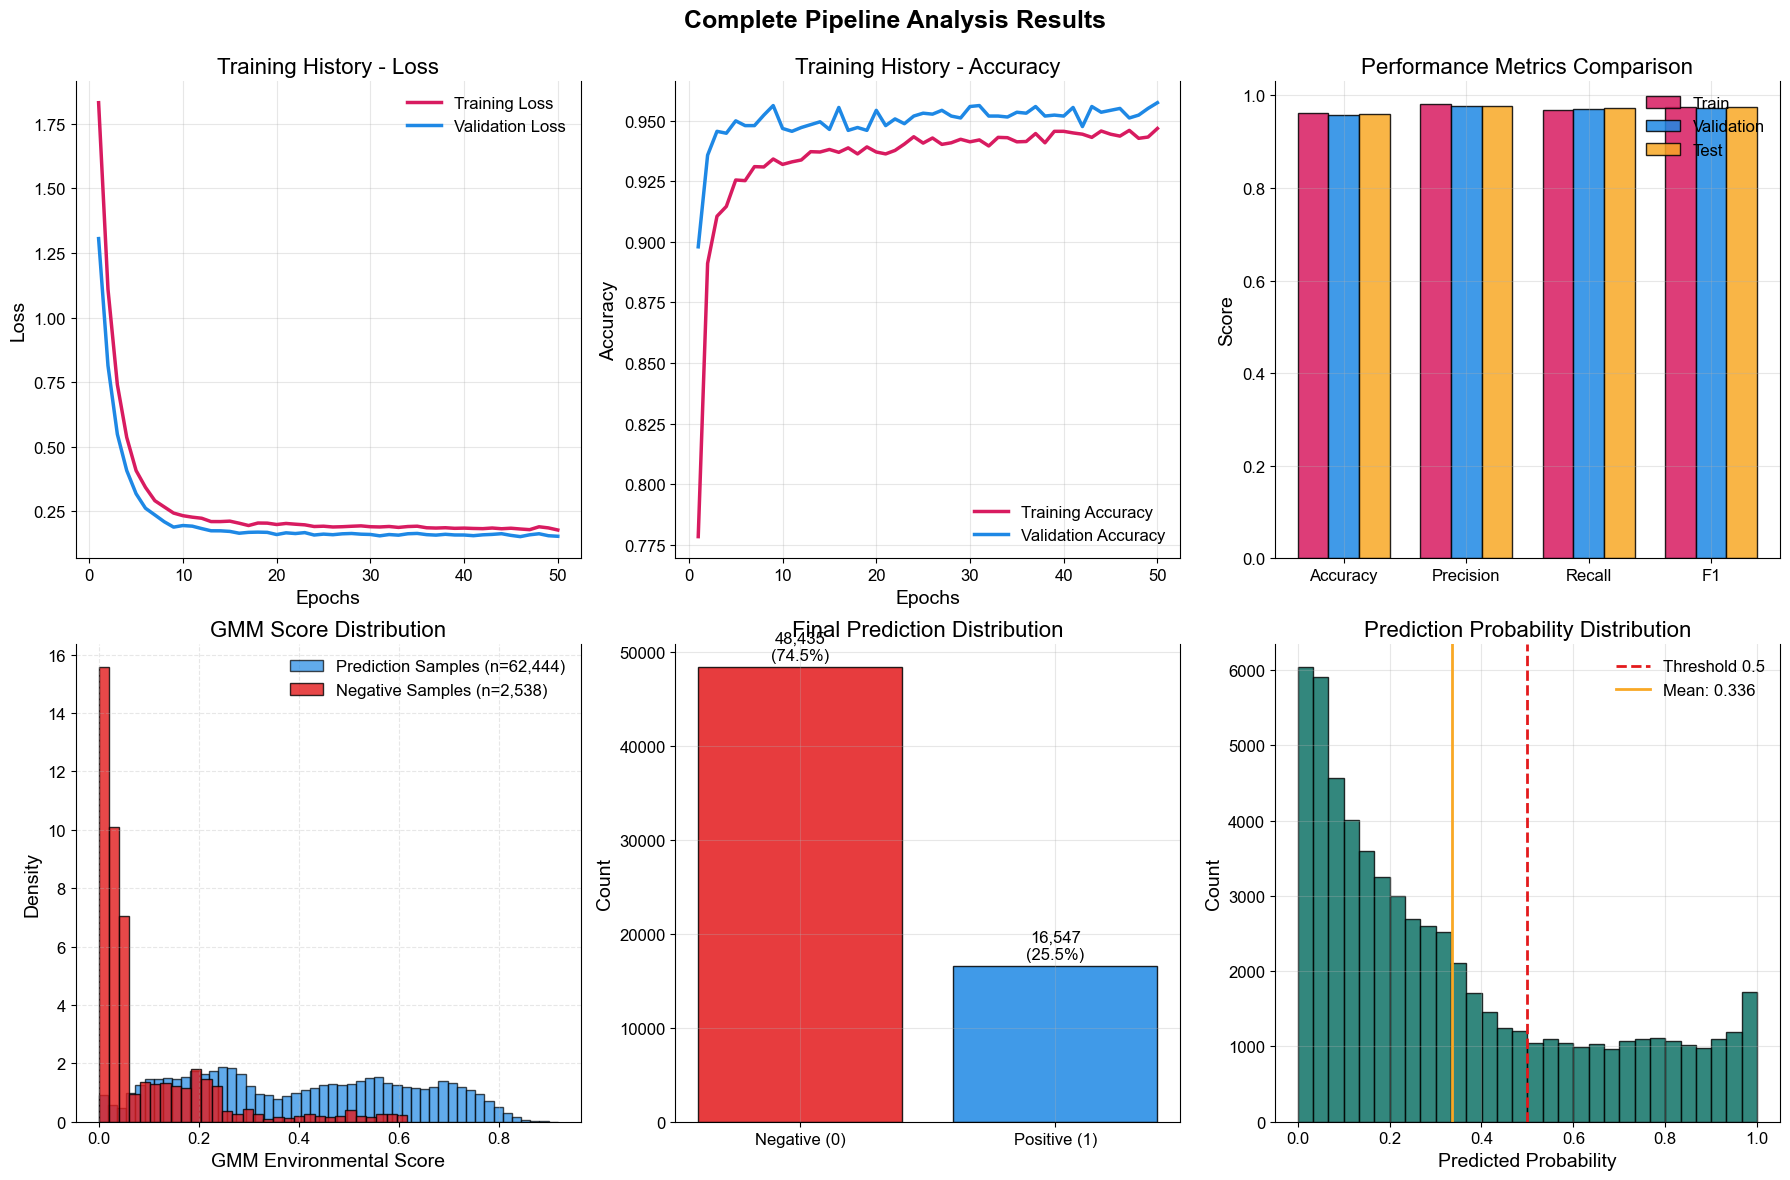


Â≠¶‰π†Êõ≤Á∫øÂàÜÊûêÊÄªÁªì:
‚úÖ Ê®°ÂûãÊãüÂêàÁ®ãÂ∫¶ËâØÂ•Ω
‚úÖ Ê®°ÂûãÊñπÂ∑ÆÈÄÇ‰∏≠
ÊúÄÁªàÊÄßËÉΩ: 0.9714

‚úÖ ÂàÜÂ±ÇË¥üÊ†∑Êú¨ÈááÊ†∑ÁöÑËÆ≠ÁªÉÁÆ°ÈÅìÊâßË°åÂÆåÊàêÔºÅ
üìä Â¢ûÂº∫PUËØÑ‰º∞ - ËÄÉËôëÈááÊ†∑ÂÅèÂ∑ÆÂíåÈîôÂàÜÁ±ª‰ª£‰ª∑:
   - ËÆ≠ÁªÉÊó∂Ë¥üÊ†∑Êú¨ÊØî‰æã: 0.2 (Ê≠£Ê†∑Êú¨ÊØî‰æã: 80.0%)
   - ÊµãËØïÈõÜÊ≠£Ê†∑Êú¨: 2030
   - ÊµãËØïÈõÜË¥üÊ†∑Êú¨: 508
   - Êú™Ê†áÊ≥®Ê†∑Êú¨: 62444
   - ÈîôÂàÜÁ±ª‰ª£‰ª∑ÊØî (FP:FN): 2.0:1.0
‚úÖ Âü∫‰∫éÊª°Ë∂≥Á∫¶ÊùüÁöÑPU-F1ÈÄâÊã©ÊúÄ‰Ω≥ÈòàÂÄº


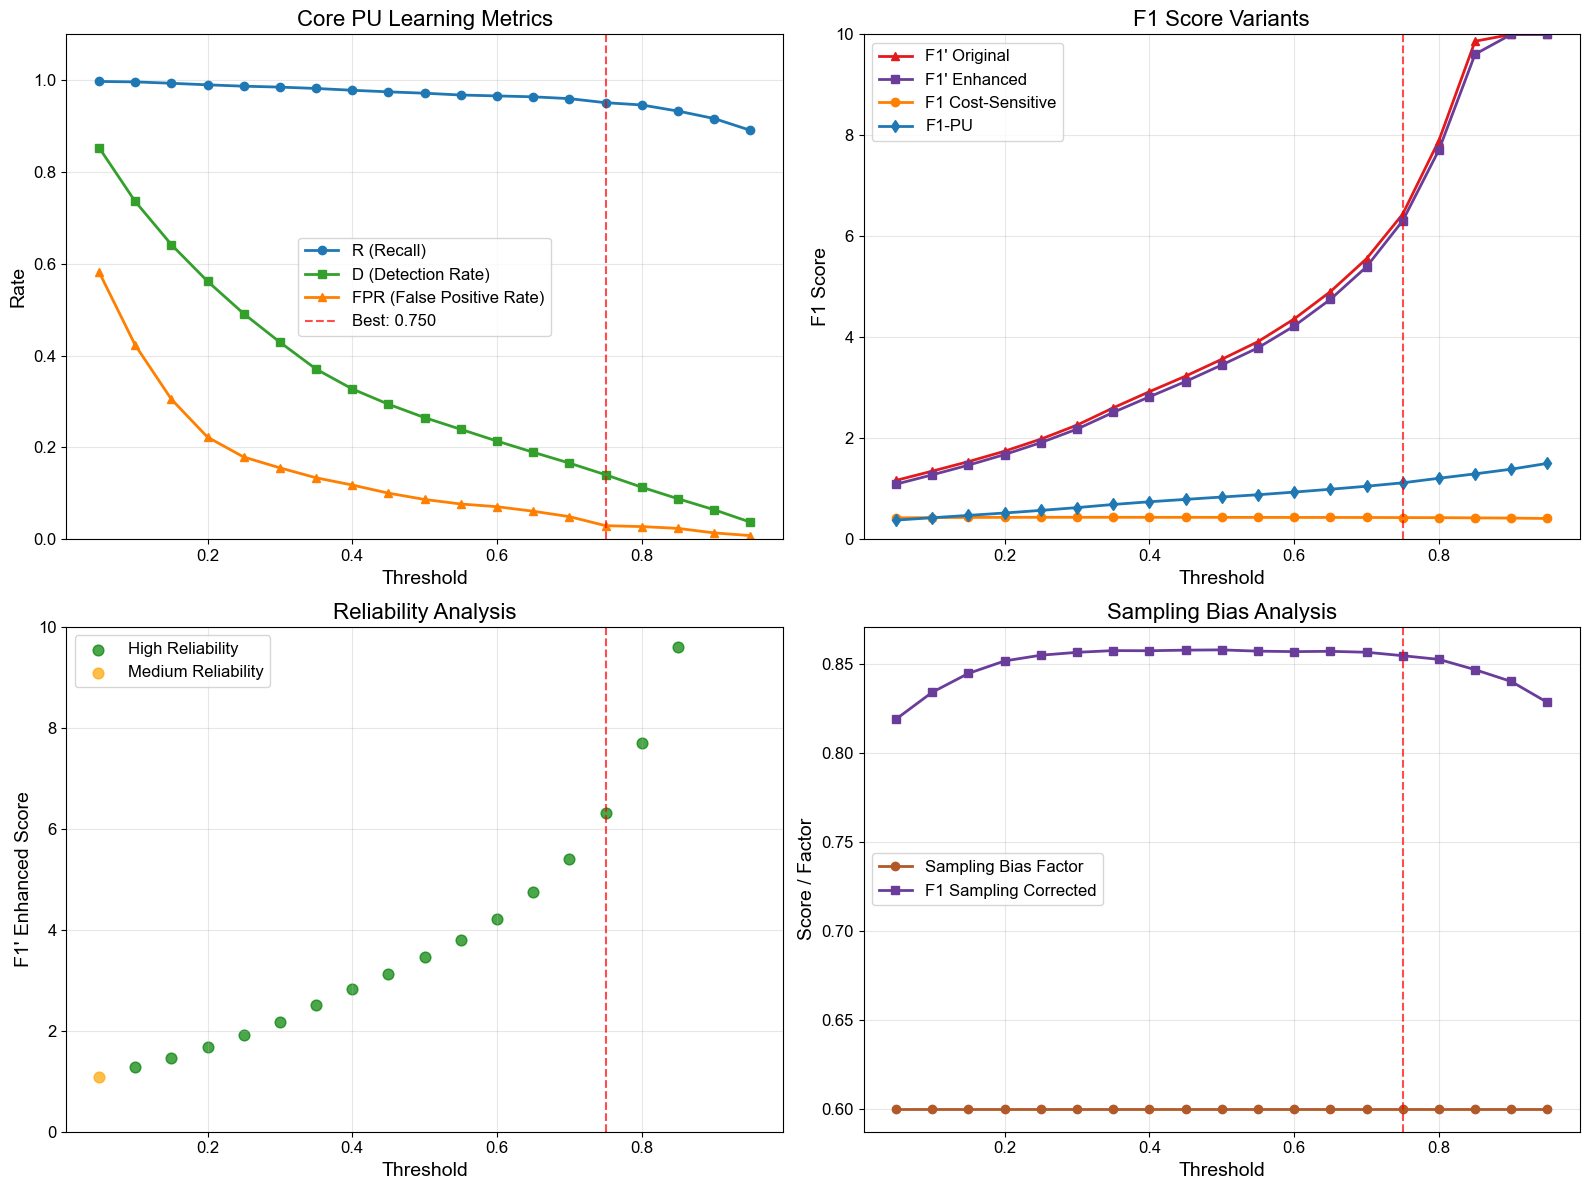


Â¢ûÂº∫PU LearningËØÑ‰º∞ÊëòË¶Å
ÊúÄ‰Ω≥ÈòàÂÄº: 0.750
Âè¨ÂõûÁéá (R): 0.951
Ê£ÄÊµãÁéá (D): 0.140
ËØØÊä•Áéá (FPR): 0.030
F1' ÂéüÁâà: 6.440
F1' Â¢ûÂº∫Áâà: 6.308
F1 ‰ª£‰ª∑ÊïèÊÑü: 0.429
F1-PU: 1.117

ÈÖçÁΩÆ‰ø°ÊÅØ:
Ë¥üÊ†∑Êú¨ÊØî‰æã: 0.2
ËÆ≠ÁªÉÊ≠£Ê†∑Êú¨ÊØî‰æã: 80.0%
ÈááÊ†∑ÂÅèÂ∑ÆÂõ†Â≠ê: 0.600
ÈîôÂàÜÁ±ª‰ª£‰ª∑ÊØî (FP:FN): 2.0:1.0

ÂèØÈù†ÊÄß: High
Âª∫ËÆÆ: ‚úÖ Êé®ËçêÈòàÂÄº 0.750 (Ë¶ÜÁõñÁéá 14.0%ÔºåÂè¨ÂõûÁéá 95.1%) | ‚úÖ ËØØÊä•ÁéáËæÉ‰Ωé (3.0%) | ‚ö†Ô∏è ËÆ≠ÁªÉÊ†∑Êú¨ÊØî‰æãÂÅèÂ∑ÆËæÉÂ§ß (Ê≠£Ê†∑Êú¨80.0%)

üéØ ÊúÄÁªàÊé®Ëçê:
   ÊúÄ‰Ω≥ÈòàÂÄº: 0.750
   È¢ÑÊúüË¶ÜÁõñÁéá: 14.0%
   È¢ÑÊúüËØØÊä•Áéá: 3.0%
   ÈááÊ†∑ÂÅèÂ∑ÆÁ®ãÂ∫¶: 0.600
‚úÖ ÂÆåÊï¥Ê®°Âûã‰øùÂ≠òÊàêÂäü:
  - ‰∏ªÊñá‰ª∂: data/US_data\landuse_model_20250813_083633.pkl
  - GMMÊ®°Âûã: data/US_data\landuse_model_20250813_083633_gmm.pkl
  - Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã: data/US_data\landuse_model_20250813_083633_dl.h5
  - È¢ÑÂ§ÑÁêÜÂô®: data/US_data\landuse_model_20250813_083633_preprocessor.pkl
  - ÊµãËØïÊï∞ÊçÆ: data/US_data\landuse_model_20250813_083633_test_data.npz
  - È

In [25]:
from function import *  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import json
from datetime import datetime


def clip_data_with_us_states(df, us_states_gdf, lon_col='lon', lat_col='lat'):
    """
    ‰ΩøÁî®ÁæéÂõΩÂ∑ûÁïå shapefile Ââ™Ë£ÅÁÇπÊï∞ÊçÆÔºõÂÖºÂÆπ‰∏çÂêåÁâàÊú¨ÁöÑ geopandas ÂèÇÊï∞Âêç
    """
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    us_states_4326 = us_states_gdf.to_crs('EPSG:4326')

    try:
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    except TypeError:
        # ÊóßÁâàÊú¨ geopandas ‰ΩøÁî® op ÂèÇÊï∞
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', op='within')

    # Ê∏ÖÁêÜ shapefile ÈôÑÂä†Â≠óÊÆµ
    clipped = clipped.drop(columns=['geometry', 'index_right'], errors='ignore')
    for col in us_states_gdf.columns:
        if col in clipped.columns:
            clipped = clipped.drop(columns=[col], errors='ignore')
    return clipped


if __name__ == '__main__':

    # ---------------------------
    # 0) Âü∫Á°ÄÂú∞ÁêÜËåÉÂõ¥‰∏éÂ∫ïÂõæ
    # ---------------------------
    usa_bounds_main = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
    us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')

    # ---------------------------
    # 1) ËØªÂèñÊï∞ÊçÆ
    # ---------------------------
    df_abandon = load_abandon(PATHS['us_abandon'])
    df_embedding = load_embedding(PATHS['us_pv_embedding'])

    # ÂàùÊ≠•ÁªèÁ∫¨Â∫¶ËåÉÂõ¥ËøáÊª§
    df_embedding = df_embedding[
        (df_embedding['lon'] >= usa_bounds_main['lon_min']) &
        (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
        (df_embedding['lat'] >= usa_bounds_main['lat_min']) &
        (df_embedding['lat'] <= usa_bounds_main['lat_max'])
    ]

    # Á¨¨‰∫åÊ¨°Áî®Â∑ûÁïåÁü¢ÈáèÊõ¥Á≤æÁ°ÆË£ÅÂâ™
    df_abandon = clip_data_with_us_states(df_abandon, us_states)
    df_embedding = clip_data_with_us_states(df_embedding, us_states)

    # ---------------------------
    # 2) Áº∫Â§±ÂÄºÂ°´ÂÖÖ + ÂéªÈáç
    # ---------------------------
    df_abandon_fill   = fill_nonpositive_with_nearest(df_abandon)
    df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)

    df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)

    # ---------------------------
    # 3) ÁâπÂæÅÈÄâÊã©ÔºàÊéíÈô§ÁªèÁ∫¨Â∫¶Ôºâ
    # ---------------------------
    features_no_coords = [f for f in (NUMERIC_FEATURES + CAT_COLS) if f not in ['lat', 'lon']]
    # Âè™‰øùÁïôÂú® df_embedding_fill Âàó‰∏≠ÂÆûÈôÖÂ≠òÂú®ÁöÑÁâπÂæÅÔºàÈò≤Ê≠¢Êúâ‰∫õÁâπÂæÅÂêçÂú®Êï∞ÊçÆ‰∏≠‰∏çÂ≠òÔºâ
    features_no_coords = [c for c in features_no_coords if c in df_embedding_fill.columns]

    
    complete_results = run_correct_training_pipeline(
            df_positive=df_embedding_fill,          # Ê≠£Ê†∑Êú¨
            df_prediction_pool=df_abandon_filtered,  # È¢ÑÊµãÊ†∑Êú¨Ê±†
            features_no_coords=features_no_coords,
            negative_ratio=0.25,
            sampling_strategy="simple",
            difficulty_levels=3,
            test_size=0.2,
            val_size=0.2,
            epochs=50,
            batch_size=32,
            random_state=42,
            hidden_layers=[128, 64, 32],
            dropout_rate=0.3,
            learning_rate=0.001,
            run_shap=True
    )
    
    if complete_results is not None:

        evaluation_results = enhanced_model_evaluation_with_pu(
            complete_results, 
            pi_estimate=0.2,              
            traditional_metrics=True,       
            pu_metrics=True,              
            cost_fp=2.0,                   
            cost_fn=1.0                    
        )

        # ËæìÂá∫ÂÖ≥ÈîÆ‰ø°ÊÅØ
        pu_summary = evaluation_results["pu_learning"]["summary"]
        print(f"\nüéØ ÊúÄÁªàÊé®Ëçê:")
        print(f"   ÊúÄ‰Ω≥ÈòàÂÄº: {pu_summary['best_threshold']:.3f}")
        print(f"   È¢ÑÊúüË¶ÜÁõñÁéá: {pu_summary['best_detection_rate']:.1%}")
        print(f"   È¢ÑÊúüËØØÊä•Áéá: {pu_summary['best_fpr']:.1%}")
        print(f"   ÈááÊ†∑ÂÅèÂ∑ÆÁ®ãÂ∫¶: {pu_summary.get('sampling_bias_factor', 0):.3f}")

        # ‰øùÂ≠òÁªìÊûú
        save_dir = "data/US_data"
        os.makedirs(save_dir, exist_ok=True)
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # ‰øùÂ≠òÊúÄÁªàÈ¢ÑÊµãÁªìÊûú

        saved_model_path = save_complete_model_pipeline(
        gmm_pipeline=complete_results['gmm_pipeline'],
        dl_model=complete_results['training_results']['model'],
        features=features_no_coords,
        config=complete_results['config'],
        retrained_preprocessor=complete_results['training_results']['preprocessor'],
        training_results=complete_results['training_results'],  
        save_dir="data/US_data",
        model_name=f"landuse_model_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
        )

        final_results = complete_results['final_results']
        output_file = os.path.join(save_dir, f"correct_pipeline_results_{timestamp}.csv")
        final_results.to_csv(output_file, index=False)
        

        
        print(f"\n‚úÖ ÁªìÊûúÂ∑≤‰øùÂ≠ò:")
        print(f"\nÊúÄÁªàÁªüËÆ°:")
        print(f"  - ÊÄªÊ†∑Êú¨Êï∞: {len(final_results):,}")
        print(f"  - Ë¥üÊ†∑Êú¨Êï∞: {len(complete_results['negative_samples']):,}")
        print(f"  - È¢ÑÊµãÊ†∑Êú¨Êï∞: {len(complete_results['prediction_results']):,}")
        print(f"  - È¢ÑÊµã‰∏∫Ê≠£Á±ª: {final_results['predicted_label'].sum():,}")
        print(f"  - Ê≠£Á±ªÊØî‰æã: {final_results['predicted_label'].mean():.3%}")
    
    else:
        print("‚ùå ËÆ≠ÁªÉÁÆ°ÈÅìÊâßË°åÂ§±Ë¥•")

In [26]:
# # Â∞Üenv_scoresÂåπÈÖçÂà∞ÂéüÂßãÊ†∑Êú¨ÁöÑÁªèÁ∫¨Â∫¶‰∏äÂπ∂‰øùÂ≠ò
# df_abandon_filtered['env_scores'] = env_scores
# # Try saving with different encoding
# df_abandon_filtered.to_csv('./data/abandon_filtered_with_scores.csv', index=False)# ÁªòÂà∂Âú∞Âõæ
# plt.figure(figsize=(10,6))

# # ÁªòÂà∂ÂæÖÈ¢ÑÊµãÁÇπ
# plt.scatter(df_abandon_filtered['lon'], df_abandon_filtered['lat'], 
#            c=df_abandon_filtered['env_scores'], cmap='viridis',
#            alpha=0.5, label='Prediction Points')

# # Âè†Âä†ËÆ≠ÁªÉÊ†∑Êú¨ÁÇπ
# plt.scatter(df_embedding_fill['lon'], df_embedding_fill['lat'],
#            color='red', alpha=0.5, s=20, label='Training Points')

# plt.colorbar(label='Environmental Scores')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Spatial Distribution of Environmental Scores')
# plt.legend()
# plt.show()

In [27]:
df_abandon

Unnamed: 0       time        lat         lon  abandonment_year  \
805       1897288 2020-01-01  31.320833 -105.929170            2014.0   
807       1899788 2020-01-01  31.329166 -105.929170            2014.0   
808       1902287 2020-01-01  31.337500 -105.937500            2014.0   
809       1902288 2020-01-01  31.337500 -105.929170            2014.0   
810       1904787 2020-01-01  31.345833 -105.937500            2014.0   
...           ...        ...        ...         ...               ...   
70592    20192249 2020-01-01  46.937500  -67.920830            1998.0   
70601    20247244 2020-01-01  47.145832  -67.962500            2000.0   
70607    20271365 2020-01-01  47.237500  -68.620834            2000.0   
70608    20275797 2020-01-01  47.254166  -68.354164            2000.0   
70609    20277994 2020-01-01  47.262500  -68.379166            1997.0   

       abandonment_duration  current_abandonment  landcover        DEM  \
805                    10.0                    1        2.0  1074.1250   
807                    10.0                    1        3.0  1074.8125   
808                    10.0                    1        3.0  1075.3750   
809                    10.0                    1        2.0  1074.9375   
810                    10.0                    1        2.0  1075.9375   
...                     ...                  ...        ...        ...   
70592                  26.0                    1        2.0   199.3750   
70601                  24.0                    1        2.0   223.0000   
70607                  24.0                    1        2.0   181.2500   
70608                  24.0                    1        2.0   244.9375   
70609                  27.0                    1        2.0   269.7500   

         GDPpc  ...  Population  Powerdist  PrimaryRoad  SecondaryRoad  \
805    19547.0  ...    1.104119  622567.20    22.570979       0.000000   
807    19547.0  ...    1.104119  622567.20    22.570979       0.000000   
808    32645.0  ...    0.399327  622567.20    22.570979       0.000000   
809    32645.0  ...    3.593287  622567.20    22.570979       0.000000   
810    32645.0  ...    5.603361  622567.20    22.570979       0.000000   
...        ...  ...         ...        ...          ...            ...   
70592  33949.0  ...  218.050890  622564.50     4.273278      14.490743   
70601  33949.0  ...    9.665760  622564.30    32.119901       0.000000   
70607  33949.0  ...  141.555110  622564.00     3.471587      33.915221   
70608  33949.0  ...   17.156588  622564.06     8.030265       0.061349   
70609  33949.0  ...    5.105907  622564.06    49.859261       1.558921   

          Slope  TertiaryRoad       gdmp       rsds          tas      wind  
805    0.161280    109.755022  60.677334  21.335989  2934.915273  2.750262  
807    0.142680    109.755022  45.031578  21.334290  2934.829175  2.751782  
808    0.151240    109.755022  38.084999  21.337654  2934.583333  2.752204  
809    0.134330    109.755022  26.303532  21.336290  2934.584702  2.758872  
810    0.182301    109.755022  39.406666  21.343910  2934.581940  2.771071  
...         ...           ...        ...        ...          ...       ...  
70592  1.000655    129.836817  74.197998  12.735363  2768.901404  3.429452  
70601  3.852393     92.798418  73.082001  12.262959  2766.375025  3.813229  
70607  1.910013     80.651057  54.858932  12.550031  2768.493367  3.047965  
70608  1.939035     91.262543  74.170227  12.486876  2765.084545  4.128394  
70609  4.100901    150.075090  69.684128  12.318412  2763.957254  3.005180  

[65294 rows x 22 columns]

# 1„ÄÅÂèØËßÜÂåñ

You want to predict the year: 2020.0
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GDPpc Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº
Âàó GURdist Ê≤°ÊúâÈúÄË¶ÅÂ°´ÂÖÖÁöÑÈùûÊ≠£ÂÄºÊàñNaNÂÄº

[ËΩΩÂÖ•Ê®°Âûã] gmm_model_34c_fixed.pkl ...
‚úÖ GMM pipeline loaded.
Running similarity diagnostics (log-density/PIT/PCA/MD¬≤)...


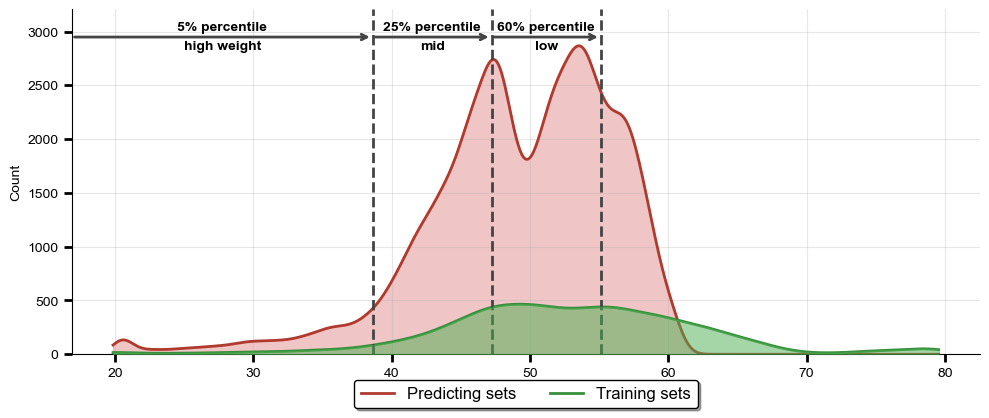


‚úÖ Áõ∏‰ººÊÄßÂàÜÂ∏ÉÂõæÂ∑≤‰øùÂ≠òÂà∞: figure\US_figure\similarity.png

Log-Density Áõ∏‰ººÊÄßÂàÜÊûê
üìä Êï∞ÊçÆÊ¶ÇËßà:
  ÂèÇËÄÉÊ≠£Ê†∑Êú¨: 10,152 ‰∏™
  Êü•ËØ¢Ê†∑Êú¨: 64,982 ‰∏™

üéØ ÂèÇËÄÉÈõÜÂÖ≥ÈîÆÂàÜ‰ΩçÊï∞:
  5%ÂàÜ‰ΩçÊï∞: 38.634
  25%ÂàÜ‰ΩçÊï∞: 47.225
  60%ÂàÜ‰ΩçÊï∞: 55.123

Ë¥üÈááÊ†∑Âª∫ËÆÆ:
  5%ÂàÜ‰ΩçÊï∞‰ª•‰∏ã: 61,043 ‰∏™ (93.9%)
  25%ÂàÜ‰ΩçÊï∞‰ª•‰∏ã: 42,345 ‰∏™ (65.2%)
  60%ÂàÜ‰ΩçÊï∞‰ª•‰∏ã: 13,365 ‰∏™ (20.6%)


In [37]:

import joblib
from function import *  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from scipy import stats

def visualize_similarity(gmm_pipeline: Pipeline,
                         df_ref_pos: pd.DataFrame,
                         df_query: pd.DataFrame,
                         q_cut: float = 0.05,
                         random_state: int = 42,
                         save_path: str = r'figure\US_figure\similarity.png'):
    """
    ÊûÅÁÆÄÁõ∏‰ººÊÄßËØäÊñ≠ÂáΩÊï∞ - ‰ªÖÊòæÁ§∫log-densityÈáçÂè†Áõ¥ÊñπÂõæÂíå3‰∏™ÂàÜ‰ΩçÊï∞Ôºà5%, 25%, 60%Ôºâ
    Â¢ûÂä†ÊãüÂêàÊõ≤Á∫øÂèä‰∏éXËΩ¥Âõ¥ÊàêÁöÑÈò¥ÂΩ±Ôºåref‰∏∫ÁªøËâ≤Ôºåquery‰∏∫#E28D8DÔºåÁõ¥ÊñπÂõæÊó†Ê°ÜÁ∫ø„ÄÇ
    ÂàÜ‰ΩçÊï∞Á∫øÂ∏¶ÁÆ≠Â§¥Ê∞¥Âπ≥Á∫ø‰ªéYËΩ¥ÊåáÂêëÂàÜ‰ΩçÊï∞Á∫øÔºåÊ†áÁ≠æÂ±Ö‰∏≠‰∫é‰∏§ÂàÜ‰ΩçÊï∞Á∫ø‰πãÈó¥„ÄÇ
    ÊîØÊåÅÂõæÁâá‰øùÂ≠òÂà∞ save_path„ÄÇ
    """
    # refÁªøËâ≤
    ref_color = '#4CAF50'  # ÁªøËâ≤
    ref_kde_color = '#388E3C'  # Ê∑±Áªø
    query_color = '#E28D8D'
    query_kde_color = '#B03A2E'

    pre = gmm_pipeline.named_steps['preprocessor']
    gmm: GaussianMixture = gmm_pipeline.named_steps['gmm']

    Xr = pre.transform(df_ref_pos)
    Xq = pre.transform(df_query)
    logp_ref = gmm.score_samples(Xr)
    logp_q = gmm.score_samples(Xq)

    quantiles = [0.05, 0.25, 0.60]
    quantile_vals = [float(np.quantile(logp_ref, q)) for q in quantiles]
    mu, std = float(np.mean(logp_ref)), float(np.std(logp_ref) + 1e-12)
    z_q = (logp_q - mu) / std

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.labelcolor'] = 'black'
    plt.rcParams['ytick.labelcolor'] = 'black'

    ref_clip, bins_ref, _ = _hist_bins_clip(logp_ref)
    q_clip,   bins_q,   _ = _hist_bins_clip(logp_q)
    bins = max(bins_ref, bins_q)

    # ‰∏çÊòæÁ§∫Ê†∑Êú¨Êï∞Èáè
    n_ref, bins_ref_edges, _ = ax.hist(ref_clip, bins=bins, alpha=0.0, label=None, 
            color=ref_color, edgecolor='none', linewidth=0.0)
    n_q, bins_q_edges, _ = ax.hist(q_clip, bins=bins, alpha=0.0, label=None, 
            color=query_color, edgecolor='none', linewidth=0.0)

    x_min = min(np.min(ref_clip), np.min(q_clip))
    x_max = max(np.max(ref_clip), np.max(q_clip))
    x = np.linspace(x_min, x_max, 500)

    # refÁªøËâ≤ÊîæÂú®Êõ¥‰∏ä‰∏ÄÂ±ÇÔºåÂÖàÁîªqueryÂÜçÁîªref
    kde_q = stats.gaussian_kde(q_clip)
    y_q = kde_q(x)
    ax.plot(x, y_q * len(q_clip) * (bins_q_edges[1] - bins_q_edges[0]), color=query_kde_color, lw=2, label='Predicting sets')
    ax.fill_between(x, 0, y_q * len(q_clip) * (bins_q_edges[1] - bins_q_edges[0]), color=query_color, alpha=0.5)

    kde_ref = stats.gaussian_kde(ref_clip)
    y_ref = kde_ref(x)
    ax.plot(x, y_ref * len(ref_clip) * (bins_ref_edges[1] - bins_ref_edges[0]), color=ref_kde_color, lw=2, label='Training sets')
    ax.fill_between(x, 0, y_ref * len(ref_clip) * (bins_ref_edges[1] - bins_ref_edges[0]), color=ref_color, alpha=0.5, zorder=10)

    color = '#444444'
    labels = ['5%', '25%', '60%']
    y_max = ax.get_ylim()[1]
    y_arrow = y_max * 0.92

    for qv, label in zip(quantile_vals, labels):
        ax.axvline(qv, color=color, linestyle="--", linewidth=2, label=f"{label} quantile")

    prev_x = ax.get_xlim()[0]
    for i, qv in enumerate(quantile_vals):
        ax.annotate(
            '', 
            xy=(qv, y_arrow), 
            xytext=(prev_x, y_arrow), 
            arrowprops=dict(arrowstyle="->", color=color, lw=2),
            annotation_clip=False
        )
        prev_x = qv

    x0 = ax.get_xlim()[0]
    x_positions = []
    x_positions.append((x0 + quantile_vals[0]) / 2)
    for i in range(1, len(quantile_vals)):
        x_positions.append((quantile_vals[i-1] + quantile_vals[i]) / 2)
    for xpos, label in zip(x_positions, labels):
        ax.text(
            xpos, y_arrow*1.01, 
            f"{label} percentile", 
            color='black', fontsize=10, ha='center', va='bottom', fontweight='bold'
        )
    text_labels = ['high weight', 'mid', 'low']
    for xpos, label in zip(x_positions, text_labels):
        ax.text(
            xpos, y_arrow*0.95, 
            f"{label}", 
            color='black', fontsize=10, ha='center', va='bottom', fontweight='bold'
        )

    # ax.set_xlabel("log p(x) (transformed feature space)", fontsize=10, color='black')
    ax.set_ylabel("Count", fontsize=10, color='black')
    ax.grid(True, alpha=0.3, linestyle='-')
    ax.tick_params(axis='both', which='major', width=2, length=6, labelsize=10, color='black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    # Ê®™ÂêëÂ∏ÉÂ±ÄÔºåÂõæ‰æã12Âè∑Â≠ó‰ΩìÔºåÈªëËâ≤
    handles, labels_ = ax.get_legend_handles_labels()
    # Âè™‰øùÁïôKDEÊõ≤Á∫øÁöÑÂõæ‰æã
    legend_labels = []
    legend_handles = []
    for h, l in zip(handles, labels_):
        if l in ['Training sets', 'Predicting sets']:
            legend_labels.append(l)
            legend_handles.append(h)
    plt.legend(
        legend_handles, legend_labels,
        frameon=True, fancybox=True, shadow=True, fontsize=12,
        loc='lower center', bbox_to_anchor=(0.5, -0.18), ncol=2,
        facecolor='white', edgecolor='black', labelcolor='black'
    )
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n‚úÖ Áõ∏‰ººÊÄßÂàÜÂ∏ÉÂõæÂ∑≤‰øùÂ≠òÂà∞: {save_path}")

    print("\n" + "="*60)
    print("Log-Density Áõ∏‰ººÊÄßÂàÜÊûê")
    print("="*60)
    print(f"üìä Êï∞ÊçÆÊ¶ÇËßà:")
    print(f"  ÂèÇËÄÉÊ≠£Ê†∑Êú¨: {len(logp_ref):,} ‰∏™")
    print(f"  Êü•ËØ¢Ê†∑Êú¨: {len(logp_q):,} ‰∏™")
    print(f"\nüéØ ÂèÇËÄÉÈõÜÂÖ≥ÈîÆÂàÜ‰ΩçÊï∞:")
    print(f"  5%ÂàÜ‰ΩçÊï∞: {quantile_vals[0]:.3f}")
    print(f"  25%ÂàÜ‰ΩçÊï∞: {quantile_vals[1]:.3f}")
    print(f"  60%ÂàÜ‰ΩçÊï∞: {quantile_vals[2]:.3f}")

    below_5pct = np.sum(logp_q >= quantile_vals[0])
    below_25pct = np.sum(logp_q >= quantile_vals[1])
    below_60pct = np.sum(logp_q >= quantile_vals[2])
    print(f"\nË¥üÈááÊ†∑Âª∫ËÆÆ:")
    print(f"  5%ÂàÜ‰ΩçÊï∞‰ª•‰∏ã: {below_5pct:,} ‰∏™ ({100*below_5pct/len(logp_q):.1f}%)")
    print(f"  25%ÂàÜ‰ΩçÊï∞‰ª•‰∏ã: {below_25pct:,} ‰∏™ ({100*below_25pct/len(logp_q):.1f}%)")
    print(f"  60%ÂàÜ‰ΩçÊï∞‰ª•‰∏ã: {below_60pct:,} ‰∏™ ({100*below_60pct/len(logp_q):.1f}%)")
    print("="*60)

    return {
        "logp_ref_mean": mu, 
        "logp_ref_std": std,
        "logp_thresholds": dict(zip(labels, quantile_vals)),
        "z_query": z_q,
        "below_5pct_count": below_5pct,
        "below_25pct_count": below_25pct,
        "below_60pct_count": below_60pct
    }

def clip_data_with_us_states(df, us_states_gdf, lon_col='lon', lat_col='lat'):
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    us_states_4326 = us_states_gdf.to_crs('EPSG:4326')
    try:
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    except TypeError:
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', op='within')
    clipped = clipped.drop(columns=['geometry', 'index_right'], errors='ignore')
    for col in us_states_gdf.columns:
        if col in clipped.columns:
            clipped = clipped.drop(columns=[col], errors='ignore')
    return clipped

np.random.seed(42)

usa_bounds_main = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')

df_abandon = load_abandon(PATHS['us_abandon'])
df_embedding = load_embedding(PATHS['us_pv_embedding'])

df_embedding = df_embedding[
    (df_embedding['lon'] >= usa_bounds_main['lon_min']) &
    (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
    (df_embedding['lat'] >= usa_bounds_main['lat_min']) &
    (df_embedding['lat'] <= usa_bounds_main['lat_max'])
]

df_abandon = clip_data_with_us_states(df_abandon, us_states)
df_embedding = clip_data_with_us_states(df_embedding, us_states)

df_abandon_fill   = fill_nonpositive_with_nearest(df_abandon)
df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)
df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)

features_no_coords = [f for f in (NUMERIC_FEATURES + CAT_COLS) if f not in ['lat', 'lon']]
features_no_coords = [c for c in features_no_coords if c in df_embedding_fill.columns]
print("\n[ËΩΩÂÖ•Ê®°Âûã] gmm_model_34c_fixed.pkl ...")
try:
    gmm_pipeline = joblib.load("gmm_model_34c_fixed.pkl")
    print("‚úÖ GMM pipeline loaded.")
except Exception as e:
    print(f"‚ùå Âä†ËΩΩÊ®°ÂûãÂ§±Ë¥•: {e}")
    raise

print("Running similarity diagnostics (log-density/PIT/PCA/MD¬≤)...")
try:
    diag_out = visualize_similarity(
        gmm_pipeline,
        df_ref_pos=df_embedding_fill[features_no_coords],
        df_query=df_abandon_filtered[features_no_coords],
        q_cut=0.05,
        random_state=42,
        save_path=r'figure\US_figure\similarity.png'
    )
except NameError as e:
    print("‚ö†Ô∏è Êâæ‰∏çÂà∞ visualize_similarityÔºåËØ∑Á°ÆËÆ§ËØ•ÂáΩÊï∞Â∑≤Âú® function.py ÊàñÊú¨Êñá‰ª∂‰∏≠ÂÆö‰πâ„ÄÇ")
    print(f"   ËØ¶ÁªÜ‰ø°ÊÅØ: {e}")
except Exception as e:
    print(f"‚ö†Ô∏è Áõ∏‰ººÊÄßËØäÊñ≠ÁªòÂõæÂ§±Ë¥•: {e}")

# 2„ÄÅSHAPÂèØËßÜÂåñ

‚úÖ Êñá‰ª∂Ê£ÄÊü•ÈÄöËøáÔºåÂºÄÂßãSHAPÂàÜÊûê...
Á≤æÁÆÄÁâàSHAPÂàÜÊûê - TOP8ÁâπÂæÅÁõ¥ÊñπÂõæÔºàÂ∏¶ËØØÂ∑ÆÊ£íÔºåÂÖ∂‰ΩôËÅöÂêàÊàêOthersÔºâ
üì• Âä†ËΩΩÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÂíåÊµãËØïÊï∞ÊçÆ...
‚úÖ ÊàêÂäüÂä†ËΩΩH5Ê†ºÂºèÁöÑKerasÊ®°Âûã
‚úÖ ÊµãËØïÊï∞ÊçÆÂä†ËΩΩÊàêÂäü: (2538, 23)
üîç ËÆ°ÁÆóSHAPÂÄº...


c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_129
Received: inputs=['Tensor(shape=(50, 23))']
  warnings.warn(msg)
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_129
Received: inputs=['Tensor(shape=(100, 23))']
  warnings.warn(msg)
c:\Users\zpy10\anaconda3\e

‚úÖ SHAPÂÄºËÆ°ÁÆóÂÆåÊàê: (2538, 23, 1)
‚úÖ ÁâπÂæÅËÅöÂêàÂÆåÊàê: 23 ‚Üí 15
 ÁªòÂà∂TOP 8ÁâπÂæÅÁõ¥ÊñπÂõæ...


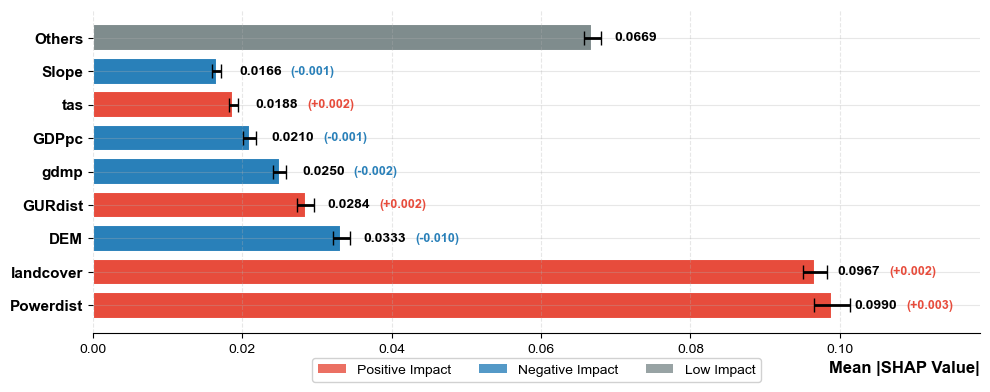


 TOP 8ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è (SHAPË¥°ÁåÆÂÄº):
----------------------------------------------------------------------
 1. Powerdist       |   0.0990 ¬± 0.0025 | (+0.003) | üü¢
 2. landcover       |   0.0967 ¬± 0.0016 | (+0.002) | üü¢
 3. DEM             |   0.0333 ¬± 0.0011 | (-0.010) | üî¥
 4. GURdist         |   0.0284 ¬± 0.0011 | (+0.002) | üü¢
 5. gdmp            |   0.0250 ¬± 0.0009 | (-0.002) | üî¥
 6. GDPpc           |   0.0210 ¬± 0.0008 | (-0.001) | üî¥
 7. tas             |   0.0188 ¬± 0.0006 | (+0.002) | üü¢
 8. Slope           |   0.0166 ¬± 0.0006 | (-0.001) | üî¥
 9. Others          |   0.0669 ¬± 0.0011 | (0.000) | ‚ö™

‚úÖ Á≤æÁÆÄÁâàSHAPÂàÜÊûêÂÆåÊàê!
 ÂàÜÊûê‰∫Ü 2538 ‰∏™Ê†∑Êú¨ÁöÑ 9 ‰∏™ÁâπÂæÅ
 ÊòæÁ§∫TOP 8 ÁâπÂæÅ + Others
 ‰ΩøÁî® DeepExplainer ËÆ°ÁÆóSHAPÂÄº

üìã ÂàÜÊûêÁªìÊûúÊëòË¶Å:
  ÁâπÂæÅÊï∞Èáè: 9
  ÊúÄÈáçË¶ÅÁâπÂæÅ: Powerdist
  Âπ≥ÂùáSHAPÂÄºËåÉÂõ¥: 0.0166 - 0.0990
  ÔøΩÔøΩ Áõ¥ÊñπÂõæÊòæÁ§∫TOP 8 ÁâπÂæÅ + Others


In [71]:
def simple_shap_analysis_bar(model_path, test_data_path, sample_size=1000, top_n=8):
    """
    Á≤æÁÆÄÁâàSHAPÂàÜÊûê - ‰ªÖ‰øùÁïôÁõ¥ÊñπÂõæÔºåÂä†‰∏äËØØÂ∑ÆÊ£íÔºå‰ªÖ‰øùÁïôTOP8ÔºåÂÖ∂‰ΩôËÅöÂêàÊàêOthers
    ÂõæÂπÖÈÄÇÂêàÈ´ò4ÔºåÈïø10ËøôÊ†∑ÁöÑÂ∏ÉÂ±Ä
    """
    try:
        print("=" * 60)
        print("Á≤æÁÆÄÁâàSHAPÂàÜÊûê - TOP8ÁâπÂæÅÁõ¥ÊñπÂõæÔºàÂ∏¶ËØØÂ∑ÆÊ£íÔºåÂÖ∂‰ΩôËÅöÂêàÊàêOthersÔºâ")
        print("=" * 60)
        
        # 1. Âä†ËΩΩÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÂíåÊµãËØïÊï∞ÊçÆ
        print("üì• Âä†ËΩΩÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÂíåÊµãËØïÊï∞ÊçÆ...")
        if model_path.endswith('.h5'):
            from tensorflow import keras
            model = keras.models.load_model(model_path)
            print("‚úÖ ÊàêÂäüÂä†ËΩΩH5Ê†ºÂºèÁöÑKerasÊ®°Âûã")
        else:
            raise ValueError("‰ªÖÊîØÊåÅH5Ê†ºÂºèÊ®°Âûã")
        
        test_data = np.load(test_data_path)
        X_test = test_data['X_test'] if 'X_test' in test_data else test_data[list(test_data.keys())[0]]
        print(f"‚úÖ ÊµãËØïÊï∞ÊçÆÂä†ËΩΩÊàêÂäü: {X_test.shape}")
        
        # 2. ËÆ°ÁÆóSHAPÂÄº
        print("üîç ËÆ°ÁÆóSHAPÂÄº...")
        try:
            explainer = shap.DeepExplainer(model, X_test[:50])
            shap_values = explainer.shap_values(X_test[:sample_size])
            if isinstance(shap_values, list): 
                shap_values = shap_values[0]
            explainer_type = "DeepExplainer"
        except Exception as e:
            print(f"DeepExplainerÂ§±Ë¥•: {e}; ‰ΩøÁî®GradientExplainer")
            try:
                explainer = shap.GradientExplainer(model, X_test[:50])
                shap_values = explainer.shap_values(X_test[:sample_size])
                if isinstance(shap_values, list): 
                    shap_values = shap_values[0]
                explainer_type = "GradientExplainer"
            except Exception as e2:
                print(f"GradientExplainer‰πüÂ§±Ë¥•: {e2}")
                raise ValueError("Êó†Ê≥ï‰ΩøÁî®SHAPËß£ÈáäÂô®ÔºåËØ∑Ê£ÄÊü•Ê®°ÂûãÂÖºÂÆπÊÄß")
        
        print(f"‚úÖ SHAPÂÄºËÆ°ÁÆóÂÆåÊàê: {shap_values.shape}")
        
        # 3. ËÆ°ÁÆóÁâπÂæÅÈáçË¶ÅÊÄßÔºàÂπ≥ÂùáÁªùÂØπSHAPÂÄºÔºâ„ÄÅÊñπÂêëÊÄßÔºàÂπ≥ÂùáSHAPÂÄºÔºâ„ÄÅËØØÂ∑ÆÊ£íÔºàÊ†áÂáÜËØØÔºâ
        if len(shap_values.shape) > 2:
            shap_values = shap_values.reshape(shap_values.shape[0], -1)
        
        feature_importance = np.abs(shap_values).mean(axis=0)
        feature_direction = shap_values.mean(axis=0)
        feature_se = shap_values.std(axis=0) / np.sqrt(shap_values.shape[0])  # Ê†áÂáÜËØØ
        
        # 4. ÁâπÂæÅËÅöÂêàÂ§ÑÁêÜ - Âº∫Âà∂ËÅöÂêà‰∏∫15‰∏™ÁâπÂæÅ
        if len(feature_importance) == 23:
            # ËÅöÂêàÂêéÁöÑ15‰∏™ÁâπÂæÅÂêçÁß∞
            aggregated_feature_names = [
                'GDPpc', 'GDPtot', 'GURdist', 'DEM', 'Slope', 
                'Population', 'Powerdist', 'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad',
                'gdmp', 'rsds', 'tas', 'wind', 'landcover'
            ]
            
            # ÊâßË°åÁâπÂæÅËÅöÂêà
            # Ââç14‰∏™ÁâπÂæÅ‰øùÊåÅ‰∏çÂèò
            aggregated_importance = feature_importance[:14].copy()
            aggregated_direction = feature_direction[:14].copy()
            aggregated_se = feature_se[:14].copy()
            
            # ËÅöÂêàlandcoverÁâπÂæÅÔºàÊúÄÂêé9‰∏™ÁâπÂæÅÔºâ
            landcover_importance = feature_importance[14:23].sum()
            landcover_direction = feature_direction[14:23].sum()
            # ÂØπ‰∫éËØØÂ∑ÆÊ£íÔºå‰ΩøÁî®ÊñπÂ∑ÆÁöÑÂèØÂä†ÊÄß
            landcover_se = np.sqrt(np.sum(feature_se[14:23]**2))
            
            aggregated_importance = np.append(aggregated_importance, landcover_importance)
            aggregated_direction = np.append(aggregated_direction, landcover_direction)
            aggregated_se = np.append(aggregated_se, landcover_se)
            
            print(f"‚úÖ ÁâπÂæÅËÅöÂêàÂÆåÊàê: {len(feature_importance)} ‚Üí {len(aggregated_importance)}")
            
            # ‰ΩøÁî®ËÅöÂêàÂêéÁöÑÁâπÂæÅ
            feature_importance = aggregated_importance
            feature_direction = aggregated_direction
            feature_se = aggregated_se
            feature_names = aggregated_feature_names
            
        else:
            print(f"‚ö†Ô∏è ÁâπÂæÅÊï∞Èáè‰∏çÊòØ23‰∏™ÔºåÊó†Ê≥ïËøõË°åÊ†áÂáÜËÅöÂêà")
            feature_names = [f'Feature_{i+1}' for i in range(len(feature_importance))]
        
        # 5. ÁªòÂà∂Ê∞¥Âπ≥Êù°ÂΩ¢ÂõæÔºà‰ªÖTOP8 + OthersÔºâ
        print(f" ÁªòÂà∂TOP {top_n}ÁâπÂæÅÁõ¥ÊñπÂõæ...")
        
        # ÊåâÈáçË¶ÅÊÄßÊéíÂ∫è
        sorted_indices = np.argsort(feature_importance)[::-1]
        sorted_names = [feature_names[i] for i in sorted_indices]
        sorted_importance = feature_importance[sorted_indices]
        sorted_direction = feature_direction[sorted_indices]
        sorted_se = feature_se[sorted_indices]
        
        # Ëé∑ÂèñTOP XÁâπÂæÅ
        top_importance = sorted_importance[:top_n]
        top_names = sorted_names[:top_n]
        top_direction = sorted_direction[:top_n]
        top_se = sorted_se[:top_n]
        
        # ËÆ°ÁÆóÂÖ∂‰ªñÁâπÂæÅÁöÑÊÄªÂíåÔºàOthersÔºâ
        other_importance = sorted_importance[top_n:].sum()
        other_se = np.sqrt(np.sum(sorted_se[top_n:]**2))  # ËØØÂ∑ÆÊ£íËÅöÂêà
        
        # ÂêàÂπ∂TOPÁâπÂæÅÂíåOthers
        final_importance = np.append(top_importance, other_importance)
        final_names = top_names + ['Others']
        final_direction = np.append(top_direction, 0)  # OthersÊó†ÊñπÂêëÊÄß
        final_se = np.append(top_se, other_se)
        
        # ÂàõÂª∫È¢úËâ≤Êò†Â∞ÑÔºöÊ†πÊçÆÊñπÂêëÊÄßÔºàÊ≠£Ë¥üÔºâÈÄâÊã©È¢úËâ≤
        colors = []
        for direction in final_direction:
            if direction > 0:
                colors.append('#E74C3C')  # Ê∑±Á∫¢Ëâ≤ - Ê≠£ÂêëÂΩ±Âìç
            elif direction < 0:
                colors.append('#2980B9')  # Ê∑±ËìùËâ≤ - Ë¥üÂêëÂΩ±Âìç
            else:
                colors.append('#7F8C8D')  # Ê∑±ÁÅ∞Ëâ≤ - Êó†ÂΩ±Âìç
        
        # ÂàõÂª∫ÂõæÂΩ¢ÔºåÈÄÇÂêàÈ´ò4ÔºåÈïø10ÁöÑÂ∏ÉÂ±Ä
        fig, ax = plt.subplots(1, 1, figsize=(10, 4))
        
        # ÁªòÂà∂Ê∞¥Âπ≥Êù°ÂΩ¢ÂõæÔºàÂ∏¶ËØØÂ∑ÆÊ£íÔºâ- ‰øÆÂ§çÂèÇÊï∞ÈóÆÈ¢ò
        y_pos = np.arange(len(final_names))
        bars = ax.barh(y_pos, final_importance, color=colors, alpha=1, 
                      edgecolor='white', linewidth=1.5, xerr=final_se, 
                      capsize=5, error_kw=dict(elinewidth=2, capsize=5))
        
        # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æ
        ax.set_yticks(y_pos)
        ax.set_yticklabels(final_names, fontsize=11, fontweight='bold')
        
        # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÂíåÊ†áÈ¢ò
        ax.set_xlabel('Mean |SHAP Value|', fontsize=12, fontweight='bold', loc='right')
        # ax.set_title(f'Top {top_n} Features + Others (SHAP Contribution)', fontsize=14, fontweight='bold')
        
        # Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æÔºàÈáçË¶ÅÊÄßÂÄº + SHAPÁõ∏ÂØπÂÄºÔºâ
        for i, (bar, importance, direction) in enumerate(zip(bars, final_importance, final_direction)):
            # ‰∏ªË¶ÅÊ†áÁ≠æÔºöÈáçË¶ÅÊÄßÂÄº
            ax.text(importance + max(final_importance) * 0.03, i, f'{importance:.4f}', 
                    va='center', ha='left', fontsize=10, fontweight='bold', color='black')
            
            # Âè≥‰æßÊ†áÁ≠æÔºöSHAPÁõ∏ÂØπÂÄºÔºàÊñπÂêëÊÄßÔºâ
            if direction != 0:  # ‰∏çÊòØOthers
                direction_text = f"({direction:+.3f})"
                direction_color = '#E74C3C' if direction > 0 else '#2980B9'
                ax.text(importance + max(final_importance) * 0.1, i, direction_text, 
                        va='center', ha='left', fontsize=9, color=direction_color, fontweight='bold')
        
        # Ê∑ªÂä†ÁΩëÊ†º
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        # Ê∑ªÂä†Âõæ‰æãËØ¥ÊòéÊ≠£Ë¥üÊÄßÔºåÂ∫ïÈÉ®Â±Ö‰∏≠‰∏ÄË°åÊëÜÊîæ
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#E74C3C', alpha=0.8, label='Positive Impact'),
            Patch(facecolor='#2980B9', alpha=0.8, label='Negative Impact'),
            Patch(facecolor='#7F8C8D', alpha=0.8, label='Low Impact')
        ]
        ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.15), 
                  ncol=3, fontsize=10, framealpha=0.9, borderaxespad=0.)
        # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
        ax.set_xlim(0, max(final_importance) * 1.2)
        # ‰øùÂ≠òÂõæÂÉèÂà∞ÊåáÂÆöÊñá‰ª∂Â§π
        save_dir = 'figure/US_figure'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        fig.savefig(os.path.join(save_dir, 'shap_bar.png'), dpi=300, bbox_inches='tight')
        plt.tight_layout()
        plt.show()
        
        # 6. ÊâìÂç∞ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è
        print(f"\n TOP {top_n}ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è (SHAPË¥°ÁåÆÂÄº):")
        print("-" * 70)
        
        for i, (name, importance, direction, se) in enumerate(zip(final_names, final_importance, final_direction, final_se)):
            direction_symbol = "üü¢" if direction > 0 else "üî¥" if direction < 0 else "‚ö™"
            direction_text = f"({direction:+.3f})" if direction != 0 else "(0.000)"
            print(f"{i+1:2d}. {name:<15} | {importance:8.4f} ¬± {se:6.4f} | {direction_text} | {direction_symbol}")
        
        # 7. ËøîÂõûÂàÜÊûêÁªìÊûú
        analysis_result = {
            'feature_names': final_names,
            'feature_importance': final_importance,
            'feature_direction': final_direction,
            'feature_se': final_se,
            'top_n': top_n,
            'explainer_type': explainer_type,
            'sample_size': sample_size
        }
        
        print("\n" + "=" * 60)
        print("‚úÖ Á≤æÁÆÄÁâàSHAPÂàÜÊûêÂÆåÊàê!")
        print(f" ÂàÜÊûê‰∫Ü {sample_size} ‰∏™Ê†∑Êú¨ÁöÑ {len(final_names)} ‰∏™ÁâπÂæÅ")
        print(f" ÊòæÁ§∫TOP {top_n} ÁâπÂæÅ + Others")
        print(f" ‰ΩøÁî® {explainer_type} ËÆ°ÁÆóSHAPÂÄº")
        print("=" * 60)
        
        return analysis_result
        
    except Exception as e:
        print(f"‚ùå SHAPÂàÜÊûêÂ§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
        return None

# ‰ΩøÁî®Á§∫‰æã
if __name__ == "__main__":
    # ÂÆö‰πâÊñá‰ª∂Ë∑ØÂæÑ
    model_path = r"data\US_data\landuse_model_20250813_083633_dl.h5"
    test_data_path = r"data\US_data\landuse_model_20250813_083633_test_data.npz"
    
    # Ê£ÄÊü•Êñá‰ª∂ÊòØÂê¶Â≠òÂú®
    if not os.path.exists(model_path):
        print(f"‚ùå Ê∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÊñá‰ª∂‰∏çÂ≠òÂú®: {model_path}")
    elif not os.path.exists(test_data_path):
        print(f"‚ùå ÊµãËØïÊï∞ÊçÆÊñá‰ª∂‰∏çÂ≠òÂú®: {test_data_path}")
    else:
        print("‚úÖ Êñá‰ª∂Ê£ÄÊü•ÈÄöËøáÔºåÂºÄÂßãSHAPÂàÜÊûê...")
        
        # ÊâßË°åÁ≤æÁÆÄÁâàSHAPÂàÜÊûê - ‰ªÖÊòæÁ§∫TOP8ÁâπÂæÅ + Others
        result = simple_shap_analysis_bar(
            model_path=model_path,
            test_data_path=test_data_path,
            sample_size=2538,
            top_n=8  # Ëá™ÂÆö‰πâTOP 8ÁâπÂæÅ
        )
        
        if result:
            print(f"\nüìã ÂàÜÊûêÁªìÊûúÊëòË¶Å:")
            print(f"  ÁâπÂæÅÊï∞Èáè: {len(result['feature_names'])}")
            print(f"  ÊúÄÈáçË¶ÅÁâπÂæÅ: {result['feature_names'][0]}")
            print(f"  Âπ≥ÂùáSHAPÂÄºËåÉÂõ¥: {result['feature_importance'].min():.4f} - {result['feature_importance'].max():.4f}")
            print(f"  ÔøΩÔøΩ Áõ¥ÊñπÂõæÊòæÁ§∫TOP {result['top_n']} ÁâπÂæÅ + Others")

‚úÖ Êñá‰ª∂Ê£ÄÊü•ÈÄöËøáÔºåÂºÄÂßãSHAPÂàÜÊûê...
Á≤æÁÆÄÁâàSHAPÂàÜÊûê - 15‰∏™ËÅöÂêàÁâπÂæÅÈ•ºÂõæ
üì• Âä†ËΩΩÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÂíåÊµãËØïÊï∞ÊçÆ...
‚úÖ Êï∞ÊçÆÂä†ËΩΩÊàêÂäü: (2538, 23)
üîç ËÆ°ÁÆóSHAPÂÄº...
‚úÖ SHAPÂÄºËÆ°ÁÆóÂÆåÊàê: (2538, 23)
‚úÖ ÁâπÂæÅËÅöÂêàÂÆåÊàê: 23 ‚Üí 15
 ÁªòÂà∂TOP 6ÁâπÂæÅÈ•ºÂõæ...


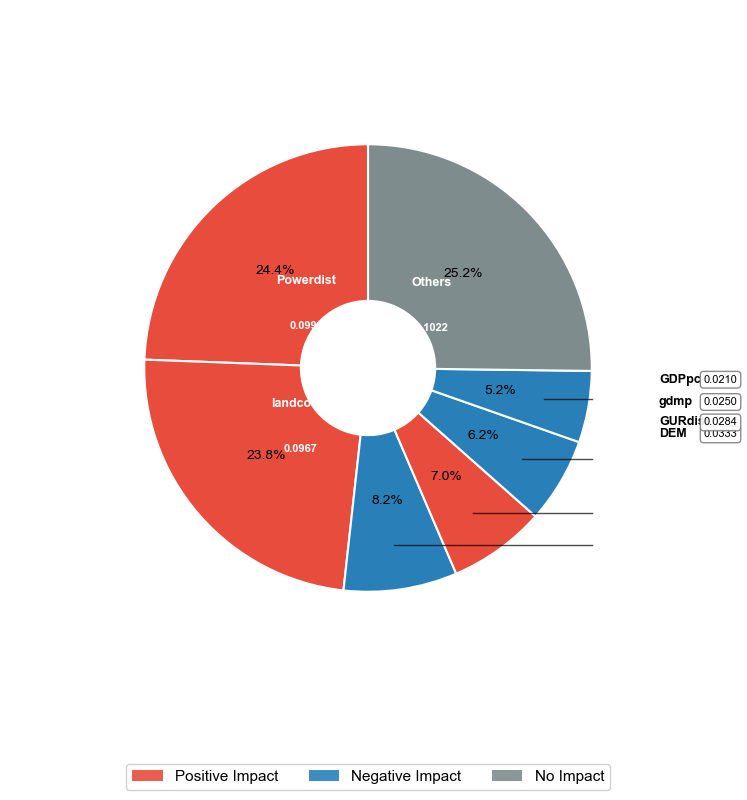


 ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è (TOP 6):
--------------------------------------------------
 1. Powerdist       |   0.0990 |  +0.0033 |  24.4% | ÂÜÖÈÉ®Ê†áÁ≠æ
 2. landcover       |   0.0967 |  +0.0020 |  23.8% | ÂÜÖÈÉ®Ê†áÁ≠æ
 3. DEM             |   0.0333 |  -0.0095 |   8.2% | ÂºïÁ∫øÊ†áÁ≠æ
 4. GURdist         |   0.0284 |  +0.0022 |   7.0% | ÂºïÁ∫øÊ†áÁ≠æ
 5. gdmp            |   0.0250 |  -0.0019 |   6.2% | ÂºïÁ∫øÊ†áÁ≠æ
 6. GDPpc           |   0.0210 |  -0.0011 |   5.2% | ÂºïÁ∫øÊ†áÁ≠æ
 7. Others          |   0.1022 |  +0.0000 |  25.2% | ÂÜÖÈÉ®Ê†áÁ≠æ

üìã ÂàÜÊûêÁªìÊûúÊëòË¶Å:
  È•ºÂõæÊòæÁ§∫TOP 6 ÁâπÂæÅ
  ÊúÄÈáçË¶ÅÁâπÂæÅ: Powerdist


In [54]:
def simple_shap_analysis_pie(model_path, test_data_path, sample_size=1000, top_n=5):
    """
    Á≤æÁÆÄÁâàSHAPÂàÜÊûê - ‰ªÖÊòæÁ§∫15‰∏™ËÅöÂêàÁâπÂæÅÁöÑÈ•ºÂõæ
    """
    try:
        print("=" * 60)
        print("Á≤æÁÆÄÁâàSHAPÂàÜÊûê - 15‰∏™ËÅöÂêàÁâπÂæÅÈ•ºÂõæ")
        print("=" * 60)
        
        # 1. Âä†ËΩΩÊ®°ÂûãÂíåÊï∞ÊçÆ
        print("üì• Âä†ËΩΩÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÂíåÊµãËØïÊï∞ÊçÆ...")
        
        if model_path.endswith('.h5'):
            from tensorflow import keras
            model = keras.models.load_model(model_path)
        else:
            raise ValueError("‰ªÖÊîØÊåÅH5Ê†ºÂºèÊ®°Âûã")
        
        test_data = np.load(test_data_path)
        X_test = test_data['X_test'] if 'X_test' in test_data else test_data[list(test_data.keys())[0]]
        print(f"‚úÖ Êï∞ÊçÆÂä†ËΩΩÊàêÂäü: {X_test.shape}")
        
        # 2. ËÆ°ÁÆóSHAPÂÄº
        print("üîç ËÆ°ÁÆóSHAPÂÄº...")
        explainer = shap.DeepExplainer(model, X_test[:50])
        shap_values = explainer.shap_values(X_test[:sample_size])
        if isinstance(shap_values, list): 
            shap_values = shap_values[0]
        
        if len(shap_values.shape) > 2:
            shap_values = shap_values.reshape(shap_values.shape[0], -1)
        
        print(f"‚úÖ SHAPÂÄºËÆ°ÁÆóÂÆåÊàê: {shap_values.shape}")
        
        # 3. ÁâπÂæÅËÅöÂêà‰∏∫15‰∏™
        feature_importance = np.abs(shap_values).mean(axis=0)
        feature_direction = shap_values.mean(axis=0)
        
        if len(feature_importance) == 23:
            # ËÅöÂêàlandcoverÁâπÂæÅ
            aggregated_importance = np.append(feature_importance[:14], feature_importance[14:23].sum())
            aggregated_direction = np.append(feature_direction[:14], feature_direction[14:23].sum())
            feature_names = ['GDPpc', 'GDPtot', 'GURdist', 'DEM', 'Slope', 'Population', 'Powerdist', 
                           'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 'gdmp', 'rsds', 'tas', 'wind', 'landcover']
            print("‚úÖ ÁâπÂæÅËÅöÂêàÂÆåÊàê: 23 ‚Üí 15")
        else:
            aggregated_importance = feature_importance
            aggregated_direction = feature_direction
            feature_names = [f'Feature_{i+1}' for i in range(len(feature_importance))]
        
        # 4. ÁªòÂà∂È•ºÂõæ
        print(f" ÁªòÂà∂TOP {top_n}ÁâπÂæÅÈ•ºÂõæ...")
        
        # ÊåâÈáçË¶ÅÊÄßÊéíÂ∫è
        sorted_indices = np.argsort(aggregated_importance)[::-1]
        sorted_names = [feature_names[i] for i in sorted_indices]
        sorted_importance = aggregated_importance[sorted_indices]
        sorted_direction = aggregated_direction[sorted_indices]
        
        # Ëé∑ÂèñTOP XÁâπÂæÅ
        top_importance = sorted_importance[:top_n]
        top_names = sorted_names[:top_n]
        top_direction = sorted_direction[:top_n]
        
        # ËÆ°ÁÆóÂÖ∂‰ªñÁâπÂæÅÁöÑÊÄªÂíå
        other_importance = sorted_importance[top_n:].sum()
        if other_importance > 0:
            top_importance = np.append(top_importance, other_importance)
            top_names.append('Others')
            top_direction = np.append(top_direction, 0)
        
        # ËÆ°ÁÆóÁôæÂàÜÊØî
        total = top_importance.sum()
        percentages = (top_importance / total) * 100
        
        # ‰ΩøÁî®Êõ¥Ê∑±ÁöÑ‰∏âÁßçÈ¢úËâ≤
        colors = {
            'positive': '#E74C3C',  # Ê∑±Á∫¢Ëâ≤
            'negative': '#2980B9',  # Ê∑±ËìùËâ≤
            'neutral': '#7F8C8D'    # Ê∑±ÁÅ∞Ëâ≤
        }
        
        # Ê†πÊçÆÊñπÂêëÊÄßÂàÜÈÖçÈ¢úËâ≤
        pie_colors = []
        for direction in top_direction:
            if direction > 0:
                pie_colors.append(colors['positive'])
            elif direction < 0:
                pie_colors.append(colors['negative'])
            else:
                pie_colors.append(colors['neutral'])
        
        # ÂàõÂª∫ÂõæÂΩ¢
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        
        # ÁªòÂà∂È•ºÂõæ
        wedges, texts, autotexts = ax.pie(top_importance, labels=None, autopct='%1.1f%%',
                                         colors=pie_colors, startangle=90,
                                         wedgeprops=dict(edgecolor='white', linewidth=1.5, width=0.7))
        
        # Êô∫ËÉΩÊîæÁΩÆÊ†áÁ≠æÂíåSHAPÂÄº
        for i, (wedge, name, importance, percentage) in enumerate(zip(wedges, top_names, top_importance, percentages)):
            center_angle = (wedge.theta2 + wedge.theta1) / 2
            
            if percentage >= 20:  # Â§ß‰∫é20%ÁöÑÊîæÂú®ÂÜÖÈÉ®
                # ËÆ°ÁÆóÂÜÖÈÉ®Ê†áÁ≠æ‰ΩçÁΩÆ
                inner_x = 0.4 * np.cos(np.radians(center_angle))
                inner_y = 0.4 * np.sin(np.radians(center_angle))
                
                # ÁâπÂæÅÂêç
                ax.text(inner_x, inner_y + 0.1, name, ha='center', va='center', 
                       fontsize=9, fontweight='bold', color='white')
                
                # SHAPÂÄº
                ax.text(inner_x, inner_y - 0.1, f'{importance:.4f}', ha='center', va='center', 
                       fontsize=8, fontweight='bold', color='white')
                
            else:  # Â∞è‰∫é20%ÁöÑ‰ΩøÁî®ÂºïÁ∫ø
                # Ê†πÊçÆËßíÂ∫¶Á°ÆÂÆöÂ§ñÈÉ®Ê†áÁ≠æ‰ΩçÁΩÆ
                if center_angle <= 90:  # Á¨¨‰∏ÄË±°ÈôêÔºö‰∏äÊñπ
                    label_x = 0.3 * np.cos(np.radians(center_angle))
                    label_y = 1.3
                    line_end_x = 0.8 * np.cos(np.radians(center_angle))
                    line_end_y = 1.0
                    text_ha = 'center'
                    text_va = 'bottom'
                    shap_offset_x = 0
                    shap_offset_y = 0.2
                elif center_angle <= 180:  # Á¨¨‰∫åË±°ÈôêÔºöÂ∑¶‰æß
                    label_x = -1.3
                    label_y = 0.3 * np.sin(np.radians(center_angle))
                    line_end_x = -1.0
                    line_end_y = 0.8 * np.sin(np.radians(center_angle))
                    text_ha = 'right'
                    text_va = 'center'
                    shap_offset_x = -0.2
                    shap_offset_y = 0
                elif center_angle <= 270:  # Á¨¨‰∏âË±°ÈôêÔºö‰∏ãÊñπ
                    label_x = 0.3 * np.cos(np.radians(center_angle))
                    label_y = -1.3
                    line_end_x = 0.8 * np.cos(np.radians(center_angle))
                    line_end_y = -1.0
                    text_ha = 'center'
                    text_va = 'top'
                    shap_offset_x = 0
                    shap_offset_y = -0.2
                else:  # Á¨¨ÂõõË±°ÈôêÔºöÂè≥‰æß
                    label_x = 1.3
                    label_y = 0.3 * np.sin(np.radians(center_angle))
                    line_end_x = 1.0
                    line_end_y = 0.8 * np.sin(np.radians(center_angle))
                    text_ha = 'left'
                    text_va = 'center'
                    shap_offset_x = 0.2
                    shap_offset_y = 0
                
                # ÁªòÂà∂ÂºïÁ∫ø
                ax.plot([0.8 * np.cos(np.radians(center_angle)), line_end_x], 
                       [0.8 * np.sin(np.radians(center_angle)), line_end_y], 
                       'k-', linewidth=1, alpha=0.7)
                
                # ÁâπÂæÅÂêçÊ†áÁ≠æ
                ax.text(label_x, label_y, name, ha=text_ha, va=text_va, fontsize=9, fontweight='bold')
                
                # SHAPÂÄº
                shap_x = label_x + shap_offset_x
                shap_y = label_y + shap_offset_y
                
                ax.text(shap_x, shap_y, f'{importance:.4f}', 
                       ha=text_ha, va=text_va, fontsize=8, 
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, 
                                edgecolor='gray', linewidth=1))
        
        # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
        ax.set_xlim(-1.6, 1.6)
        ax.set_ylim(-1.6, 1.6)
        ax.set_aspect('equal')
        ax.axis('off')
        
        # Âõæ‰æãÊ®™ÁùÄ‰∏ÄË°åÊëÜÊîæÔºå‰Ωç‰∫éÈ•ºÂõæÂ∫ïÈÉ®
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor=colors['positive'], alpha=0.9, label='Positive Impact'),
            Patch(facecolor=colors['negative'], alpha=0.9, label='Negative Impact'),
            Patch(facecolor=colors['neutral'], alpha=0.9, label='No Impact')
        ]
        ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.1), 
                 ncol=3, fontsize=11, framealpha=0.9)
        
        plt.tight_layout()
        plt.show()
        
        # 5. ÊâìÂç∞ÁªìÊûú
        print(f"\n ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è (TOP {top_n}):")
        print("-" * 50)
        for i, (name, importance, direction, percentage) in enumerate(zip(top_names, top_importance, top_direction, percentages)):
            direction_symbol = "üü¢" if direction > 0 else "üî¥" if direction < 0 else "‚ö™"
            label_type = "ÂÜÖÈÉ®Ê†áÁ≠æ" if percentage >= 20 else "ÂºïÁ∫øÊ†áÁ≠æ"
            print(f"{i+1:2d}. {name:<15} | {importance:8.4f} | {direction:+8.4f} | {percentage:5.1f}% | {label_type}")
        
        return {
            'feature_names': top_names,
            'feature_importance': top_importance,
            'feature_direction': top_direction,
            'top_n': top_n
        }
        
    except Exception as e:
        print(f"‚ùå SHAPÂàÜÊûêÂ§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
        return None

# ‰ΩøÁî®Á§∫‰æã
if __name__ == "__main__":
    model_path = r"data\US_data\landuse_model_20250813_083633_dl.h5"
    test_data_path = r"data\US_data\landuse_model_20250813_083633_test_data.npz"
    
    if os.path.exists(model_path) and os.path.exists(test_data_path):
        print("‚úÖ Êñá‰ª∂Ê£ÄÊü•ÈÄöËøáÔºåÂºÄÂßãSHAPÂàÜÊûê...")
        
        # ÊâßË°åÁ≤æÁÆÄÁâàSHAPÂàÜÊûê - ‰ªÖÊòæÁ§∫È•ºÂõæÔºåTOP 6ÁâπÂæÅ
        result = simple_shap_analysis_pie(
            model_path=model_path,
            test_data_path=test_data_path,
            sample_size=2538,
            top_n=6  # Ëá™ÂÆö‰πâTOP 6ÁâπÂæÅ
        )
        
        if result:
            print(f"\nüìã ÂàÜÊûêÁªìÊûúÊëòË¶Å:")
            print(f"  È•ºÂõæÊòæÁ§∫TOP {result['top_n']} ÁâπÂæÅ")
            print(f"  ÊúÄÈáçË¶ÅÁâπÂæÅ: {result['feature_names'][0]}")
    else:
        print("‚ùå Êñá‰ª∂‰∏çÂ≠òÂú®ÔºåËØ∑Ê£ÄÊü•Ë∑ØÂæÑ")